In [74]:
from DataSynthesizer.DataDescriber import DataDescriber
from DataSynthesizer.DataGenerator import DataGenerator
from DataSynthesizer.ModelInspector import ModelInspector
from DataSynthesizer.lib.utils import read_json_file, display_bayesian_network

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



In [52]:
def get_different_rows(source_df, new_df):
    """Returns just the rows from the new dataframe that differ from the source dataframe"""
    merged_df = source_df.merge(new_df, indicator=True, how='outer')
    changed_rows_df = merged_df[merged_df['_merge'] == 'right_only']
    return changed_rows_df.drop('_merge', axis=1)

In [53]:
ds = f'./out/description-test.json'
sd = f'./out/sythetic_data-test.csv'
ds1 = f'./out/description.json'
sd1 = f'./out/sythetic_data.csv'
ds0 = f'./out/description0.json'
sd0 = f'./out/sythetic_data0.csv'
ds01 = f'./out/description01.json'
sd01 = f'./out/sythetic_data01.csv'
ds025 = f'./out/description025.json'
sd025 = f'./out/sythetic_data025.csv'
ds05 = f'./out/description05.json'
sd05 = f'./out/sythetic_data05.csv'
adult='./adult.data'

In [54]:
# adult data cols
adult_cols = ['age', 'workclass', 'fnlwgt', 'education',
        'education-num', 'marital-status', 'occupation',
        'relationship', 'race', 'sex', 'capital-gain',
        'capital-loss', 'hours-per-week', 'native-country', 'y']
bank_cols = ['age', 'job', 'marital', 'education',
        'default', 'housing', 'loan', 'contact',
        'month', 'day_of_week', 'duration',
        'campaign', 'pdays', 'previous', 'poutcome',
        'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
        'nr.employed', 'y']
german_cols = ['existing_checking', 'duration', 'credit_history', 'purpose', 'credit_amount', 
         'savings', 'employment_since', 'installment_rate', 'status_sex', 'other_debtors', 
         'residence_since', 'property', 'age', 'other_installment_plans', 'housing', 
         'existing_credits', 'job', 'people_liable', 'telephone', 'foreign_worker', 'y']


In [93]:
def describe(input_data, dataset, epsilon, description_file, k=2):
    
    if dataset == 'adult':
        df = pd.read_csv(input_data, sep=',', names=adult_cols)

        categorical_columns = ['workclass', 'education', 'marital-status',
                           'occupation', 'relationship', 'race',
                           'sex', 'native-country']

        for category in categorical_columns:
            df[category] = df[category].astype('object')

        categorical_attributes = {'workclass': True,
                                  'education': True,
                                  'marital-status': True,
                                  'occupation': True,
                                  'relationship': True,
                                  'race': True,
                                  'sex': True,
                                  'native-country': True,
                                  'y': True
                                  }
    
    elif dataset == 'bank': #bank
        df = pd.read_csv(input_data, sep=';', names=bank_cols)


        # specify categorical attributes
        categorical_attributes = {'job': True,
                                  'marital': True,
                                  'education': True,
                                  'default': True,
                                  'housing': True,
                                  'loan': True,
                                  'contact': True,
                                  'month': True,
                                  'day_of_week': True,
                                  'poutcome': True,
                                  'y': True
                                  }
    
    elif dataset == 'german':
        df = pd.read_csv(input_data, sep=' ', names=german_cols)
        print(df.head())
        # specify categorical attributes
        categorical_attributes = {'existing_checking': True,
                                  'credit_history': True,
                                  'purpose': True,
                                  'savings': True,
                                  'employment_since': True,
                                  'status_sex': True,
                                  'other_debtors': True,
                                  'property': True,
                                  'other_installment_plans': True,
                                  'housing': True,
                                  'job': True,
                                  'telephone': True,
                                  'foreign_worker': True
                                  }

    df.to_csv('comma_data.csv', sep=',')
    input_data = 'comma_data.csv'
    
    describer = DataDescriber(category_threshold=200)
    describer.describe_dataset_in_correlated_attribute_mode(dataset_file=input_data,
                                                            epsilon=epsilon, 
                                                            k=k,
                                                            attribute_to_is_categorical=categorical_attributes,
                                                            attribute_to_is_candidate_key={})
    describer.save_dataset_description_to_file(description_file)
    display_bayesian_network(describer.bayesian_network)
    print("BAYES NET ENDED")

In [85]:
def generate(dataset, num_tuples_to_generate, description_file, synthetic_data):
    generator = DataGenerator()
    generator.generate_dataset_in_correlated_attribute_mode(num_tuples_to_generate, description_file)
    generator.save_synthetic_data(synthetic_data)

    synth_df = pd.read_csv(synthetic_data, sep=',')
    print(synth_df.head())
    if dataset == 'adult':
        save_df = synth_df.loc[:, 'age':'y']
        save_df.to_csv(synthetic_data, sep=',', index=False, header=None)
    elif dataset == 'bank':
        save_df = synth_df.loc[:, 'age':'y']
        save_df.to_csv(synthetic_data, sep=';', index=False, header=None)
    elif dataset == 'german':
        save_df = synth_df.loc[:, 'existing_checking':'y']
        save_df.to_csv(synthetic_data, sep=' ', index=False, header=None)



In [86]:
def visualize(input_data, dataset, synth_data, description_file):
    

    # Read both datasets using Pandas.
    if dataset == 'adult':
        input_df = pd.read_csv(input_data, skipinitialspace=True, sep=',', names=adult_cols)
        synthetic_df = pd.read_csv(synth_data, sep=',', names=adult_cols)

    elif dataset == 'bank':
        input_df = pd.read_csv(input_data, skipinitialspace=True, sep=';', names=bank_cols)
        synthetic_df = pd.read_csv(synth_data, sep=';', names=bank_cols)

    elif dataset == 'german':
        input_df = pd.read_csv(input_data, skipinitialspace=True, sep=' ', names=german_cols)
        synthetic_df = pd.read_csv(synth_data, sep=' ', names=german_cols)


        # Read attribute description from the dataset description file.
    attribute_description = read_json_file(description_file)['attribute_description']

    inspector = ModelInspector(input_df, synthetic_df, attribute_description)
    for attribute in synthetic_df.columns:
        inspector.compare_histograms(attribute)
    inspector.mutual_information_heatmap()
        

================ Constructing Bayesian Network (BN) ================
Adding ROOT education
Adding attribute education-num
Adding attribute occupation
Adding attribute workclass
Adding attribute age
Adding attribute hours-per-week
Adding attribute marital-status
Adding attribute relationship
Adding attribute sex
Adding attribute capital-gain
Adding attribute fnlwgt
Adding attribute native-country
Adding attribute y
Adding attribute capital-loss
Adding attribute race
========================== BN constructed ==========================
Constructed Bayesian network:
    education-num  has parents ['education'].
    occupation     has parents ['education-num', 'education'].
    workclass      has parents ['occupation', 'education'].
    age            has parents ['occupation', 'education'].
    hours-per-week has parents ['age', 'occupation'].
    marital-status has parents ['hours-per-week', 'age'].
    relationship   has parents ['marital-status', 'age'].
    sex            has parents [

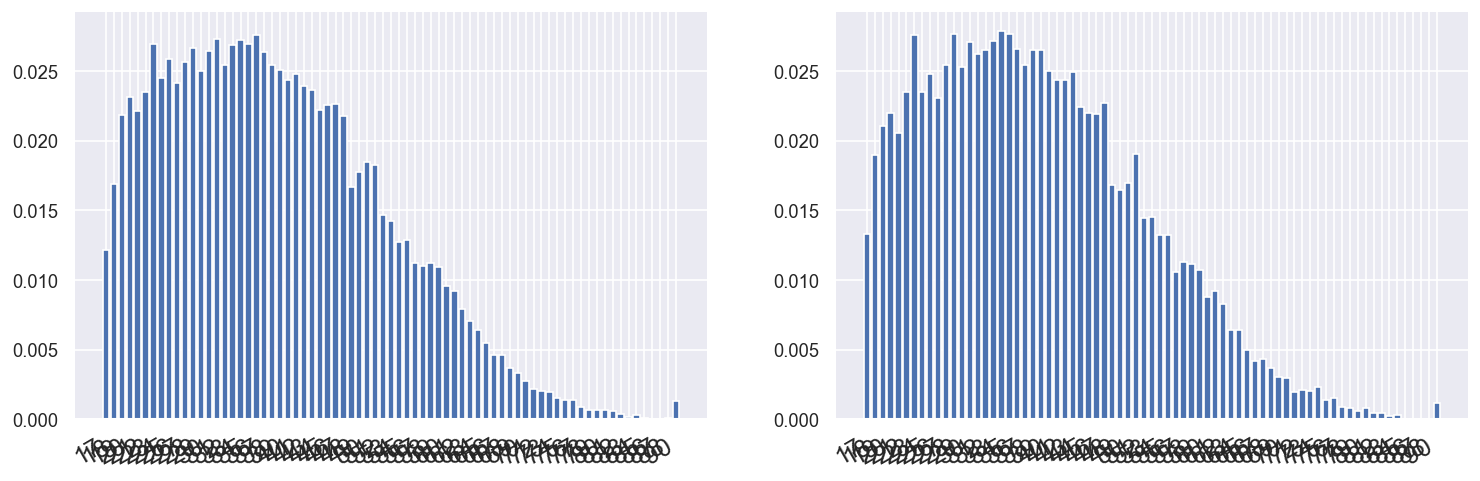

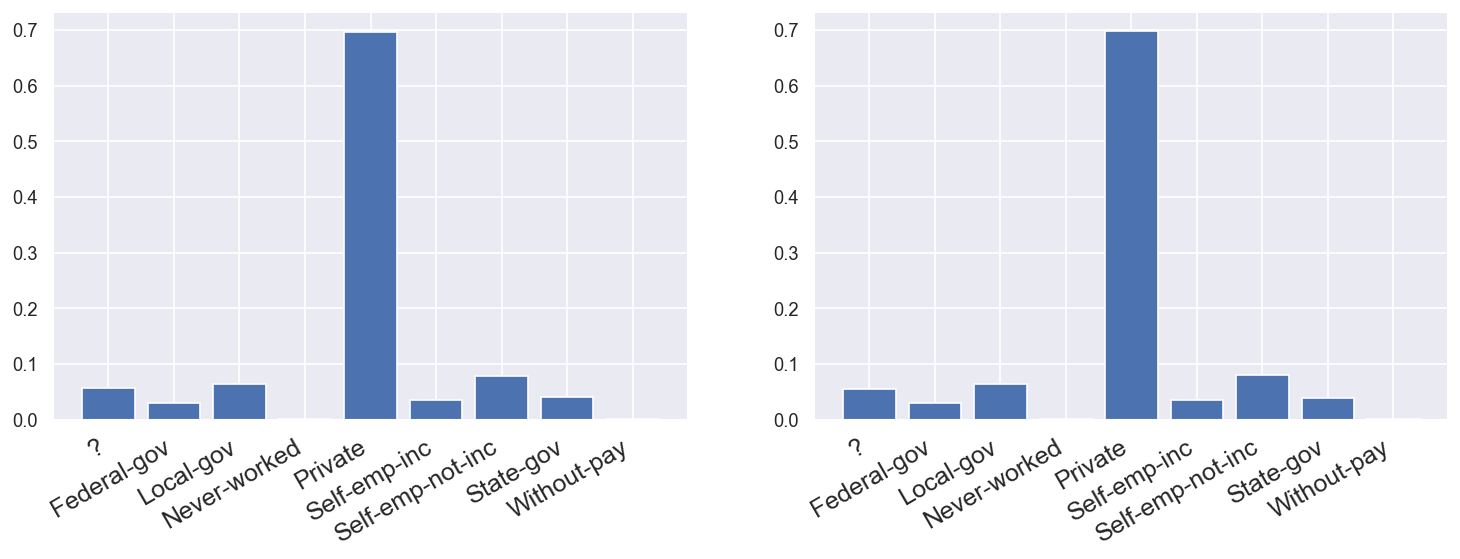

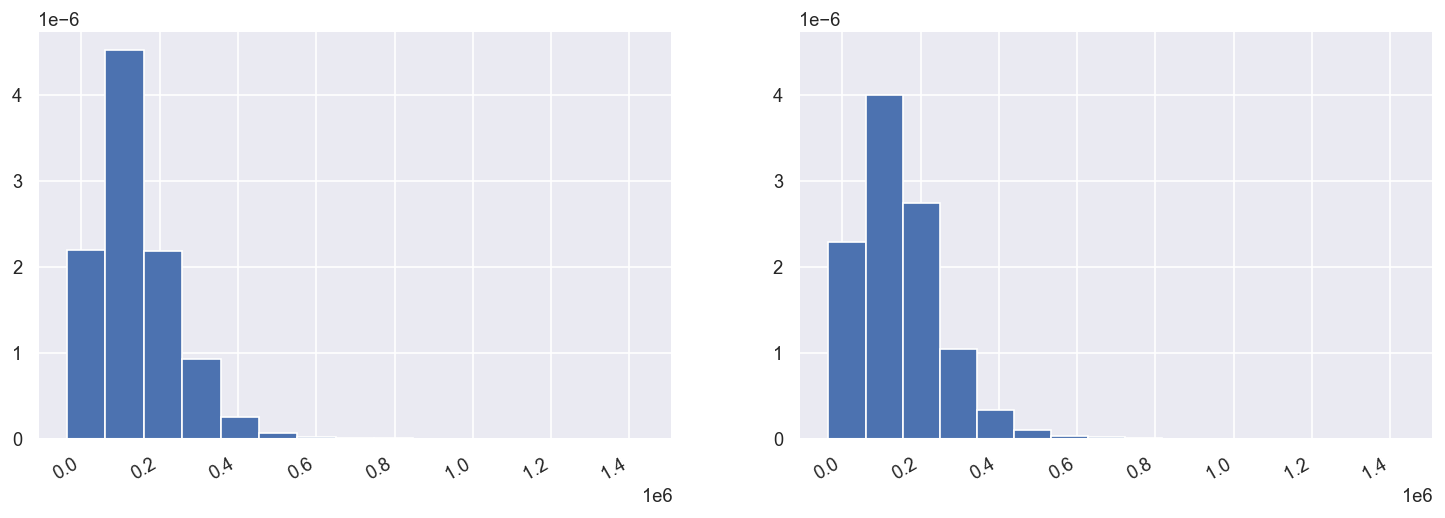

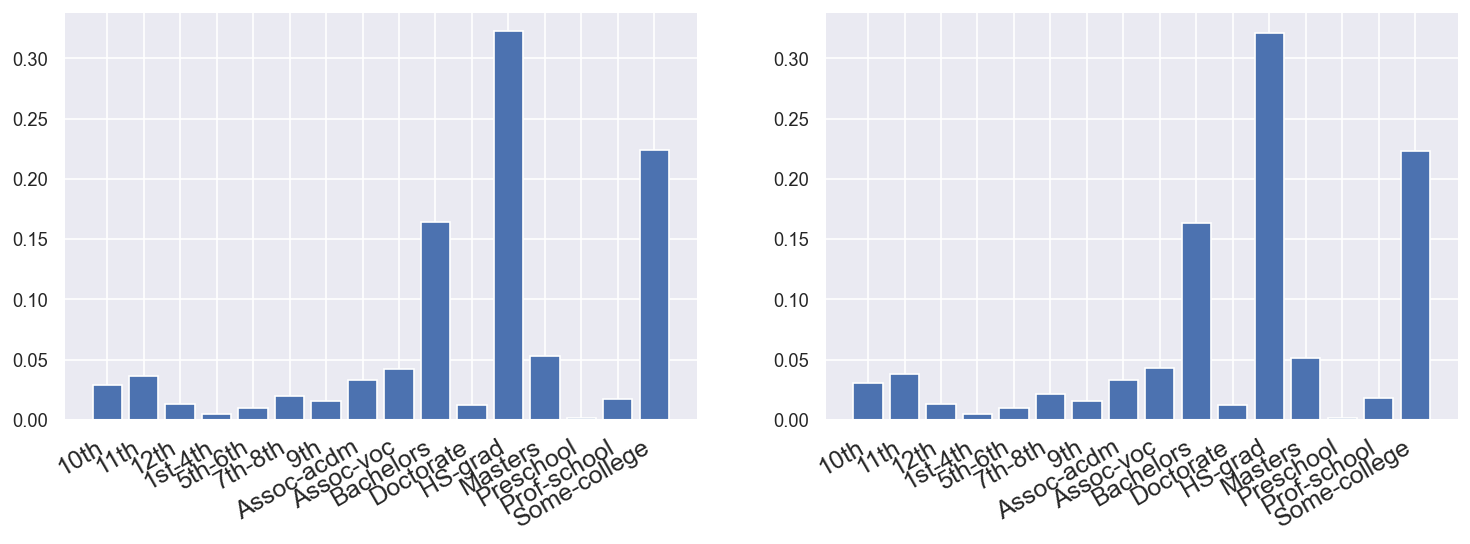

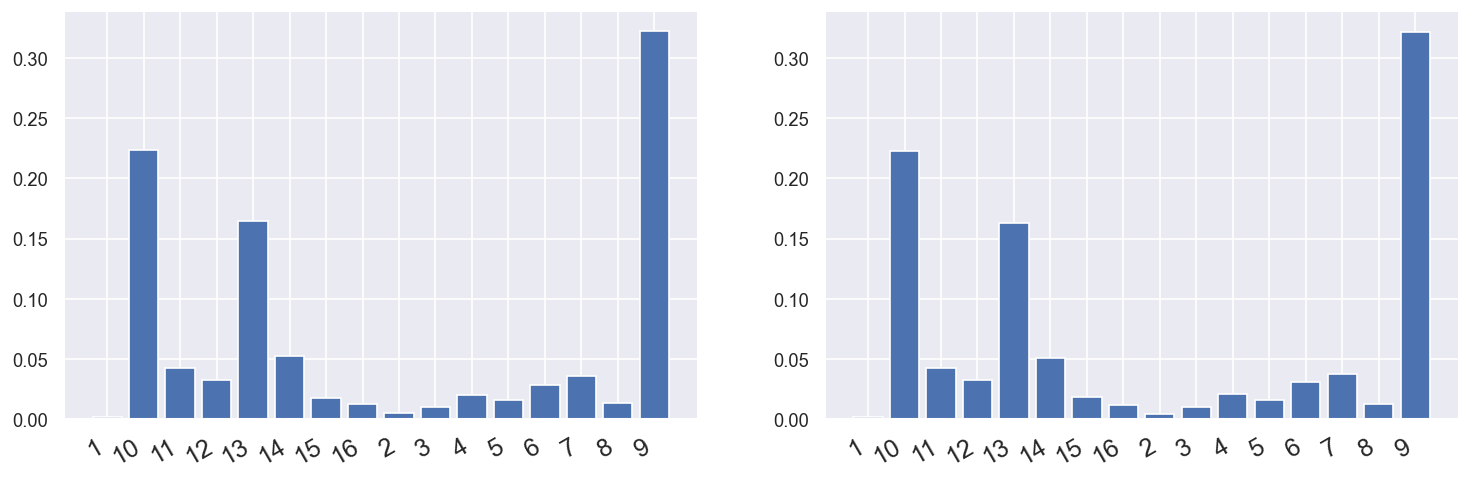

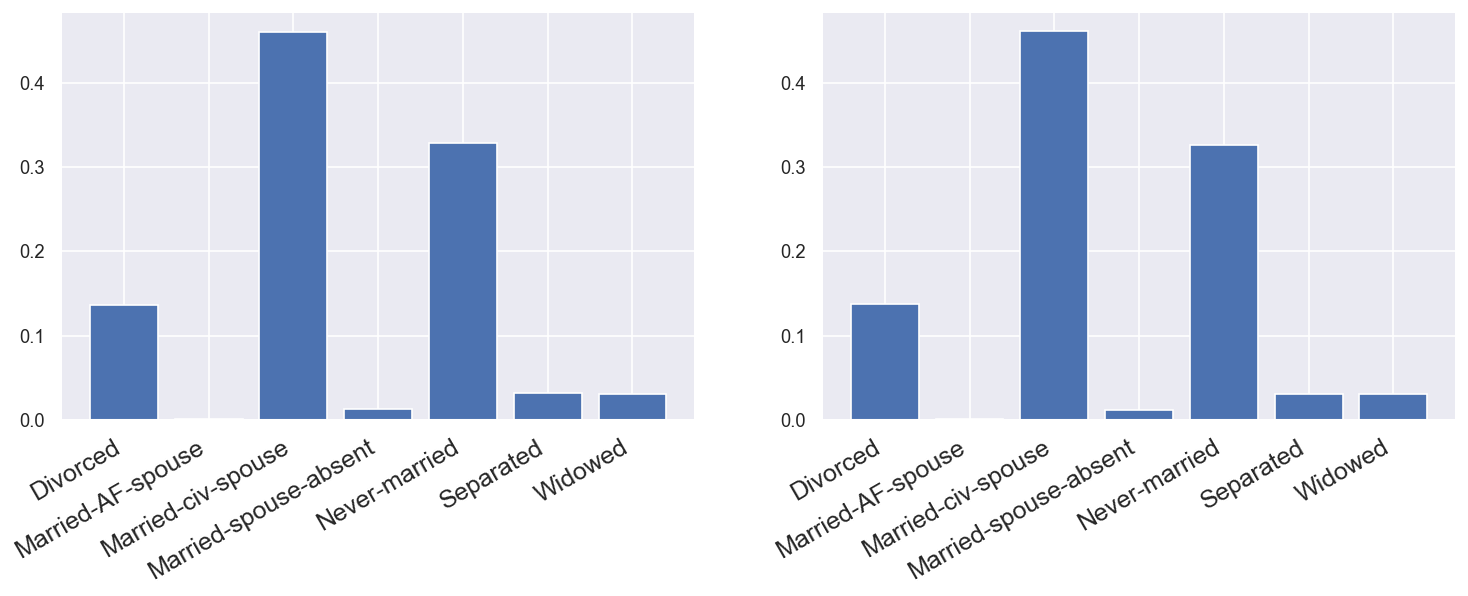

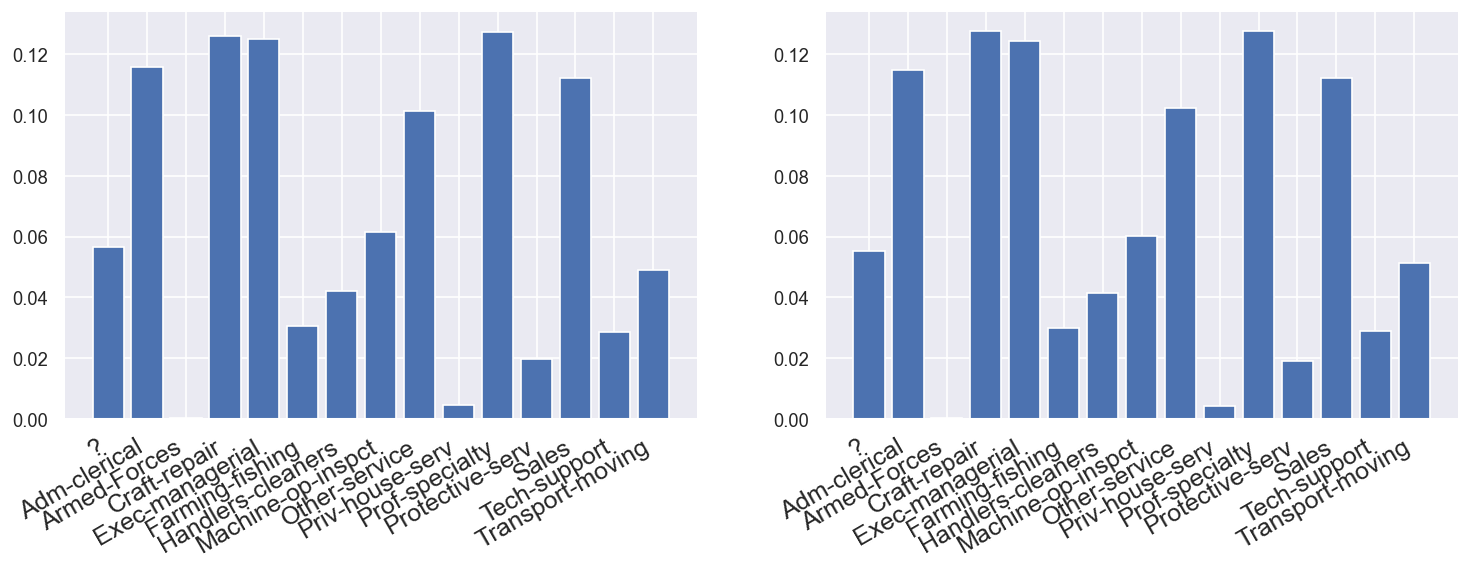

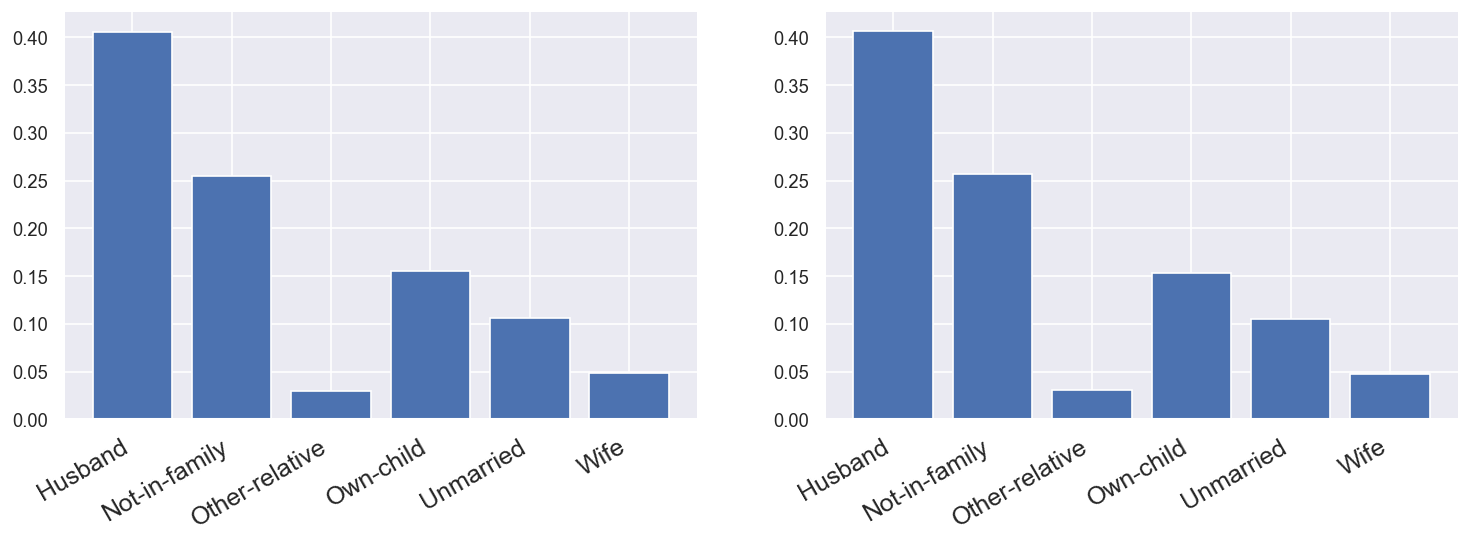

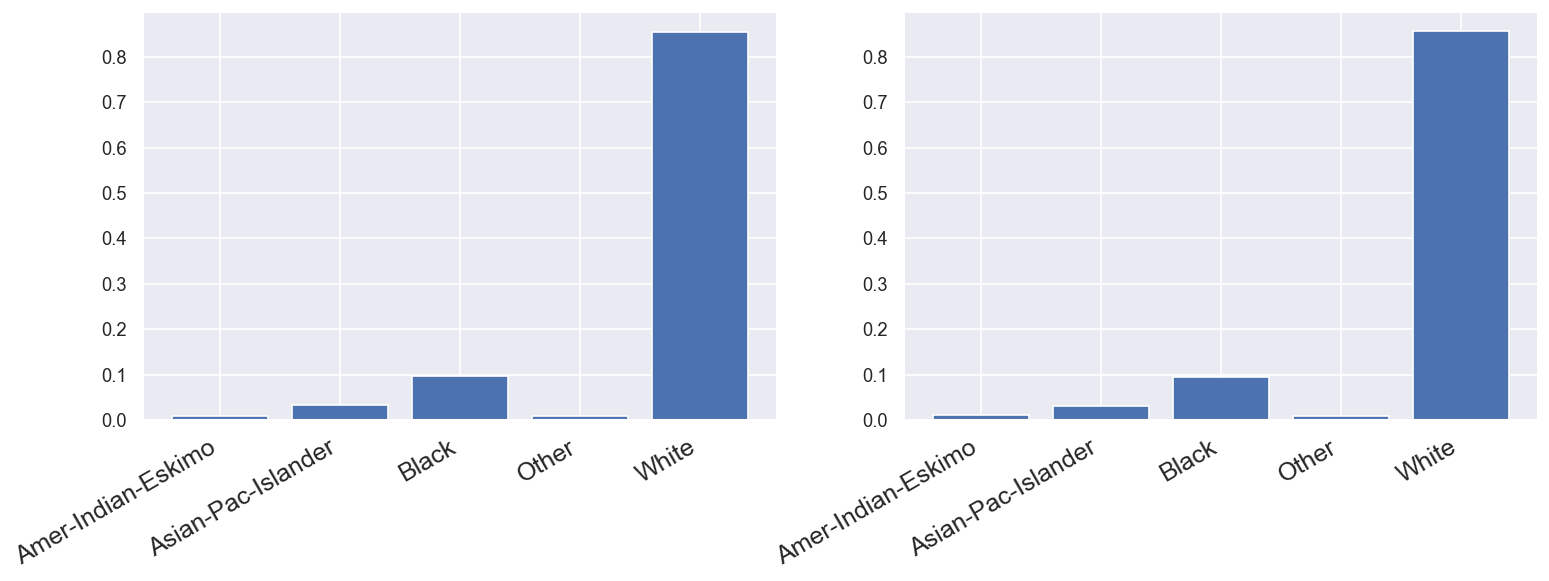

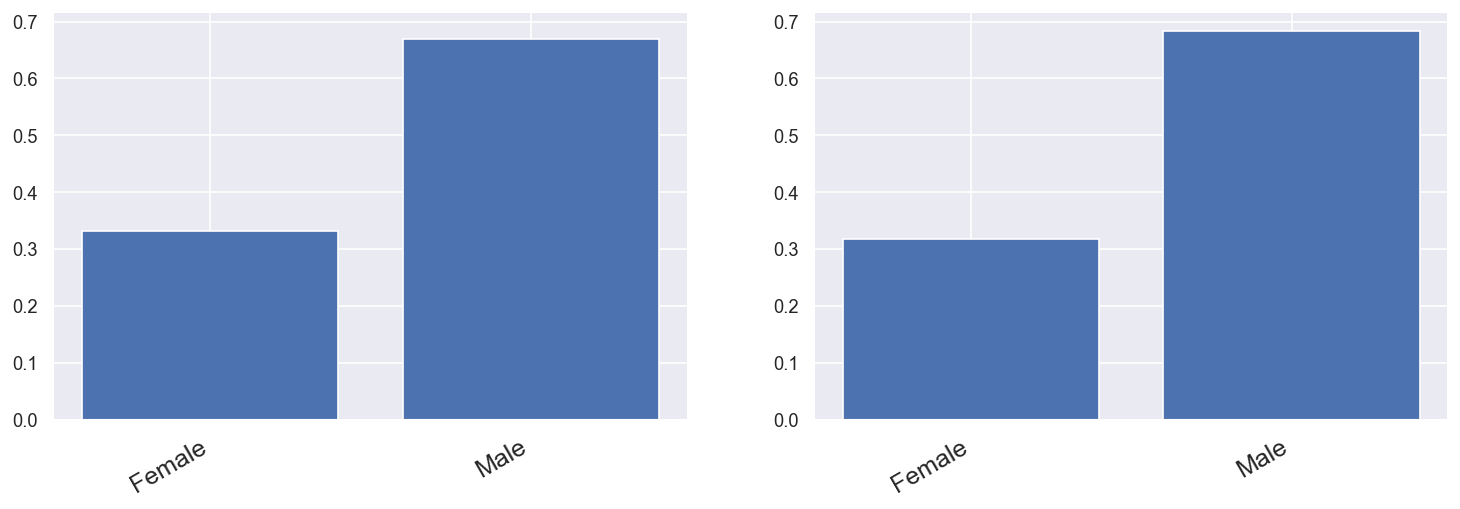

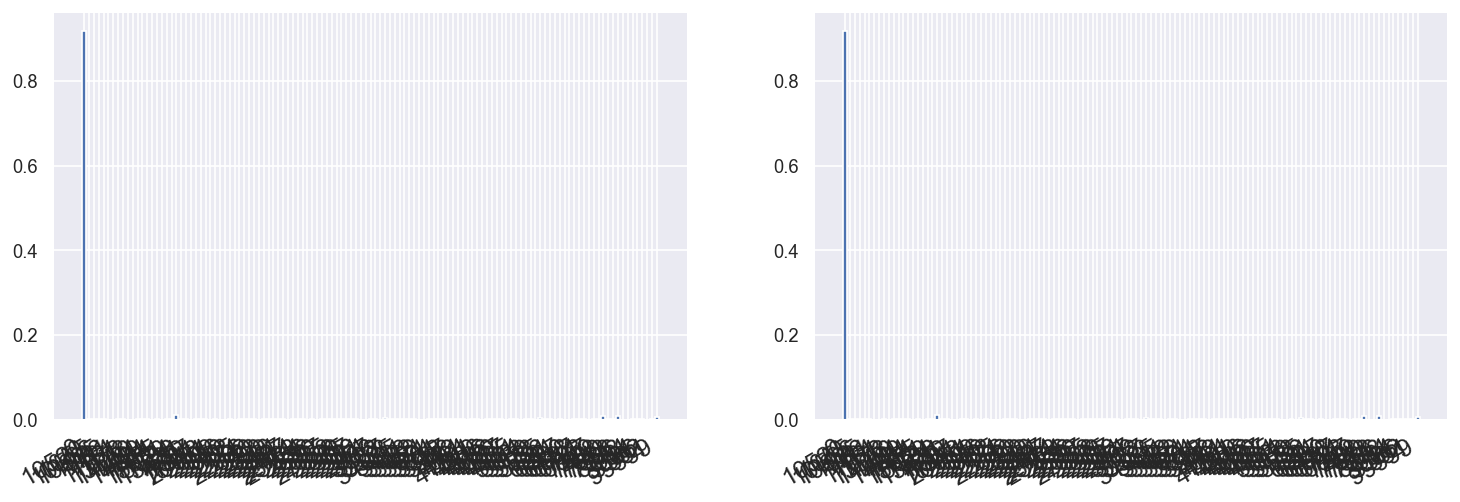

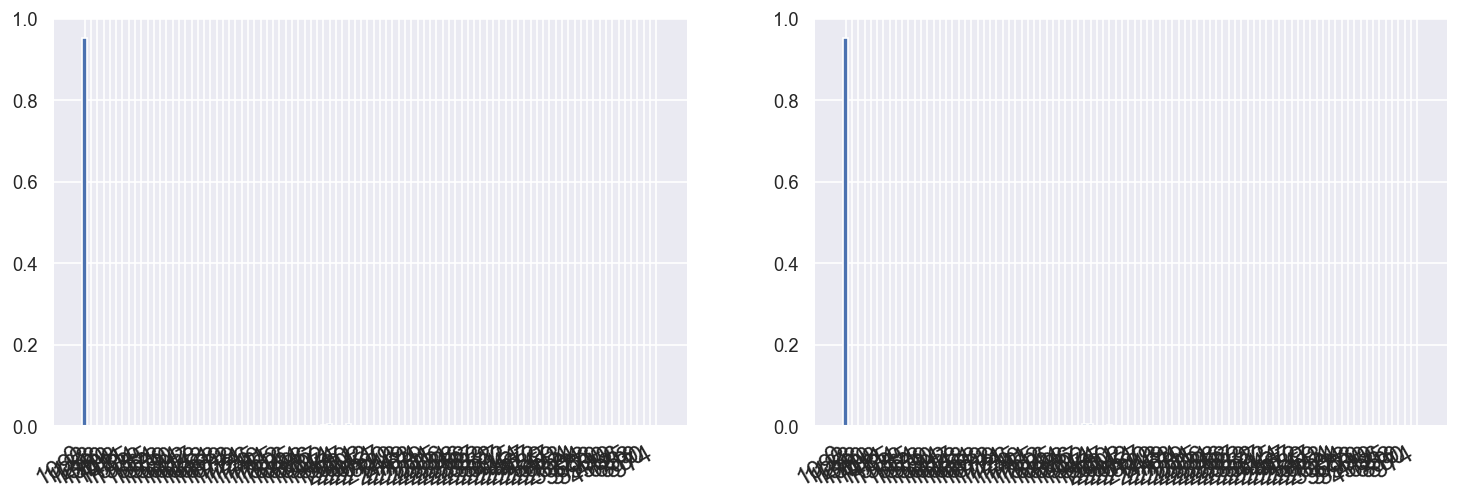

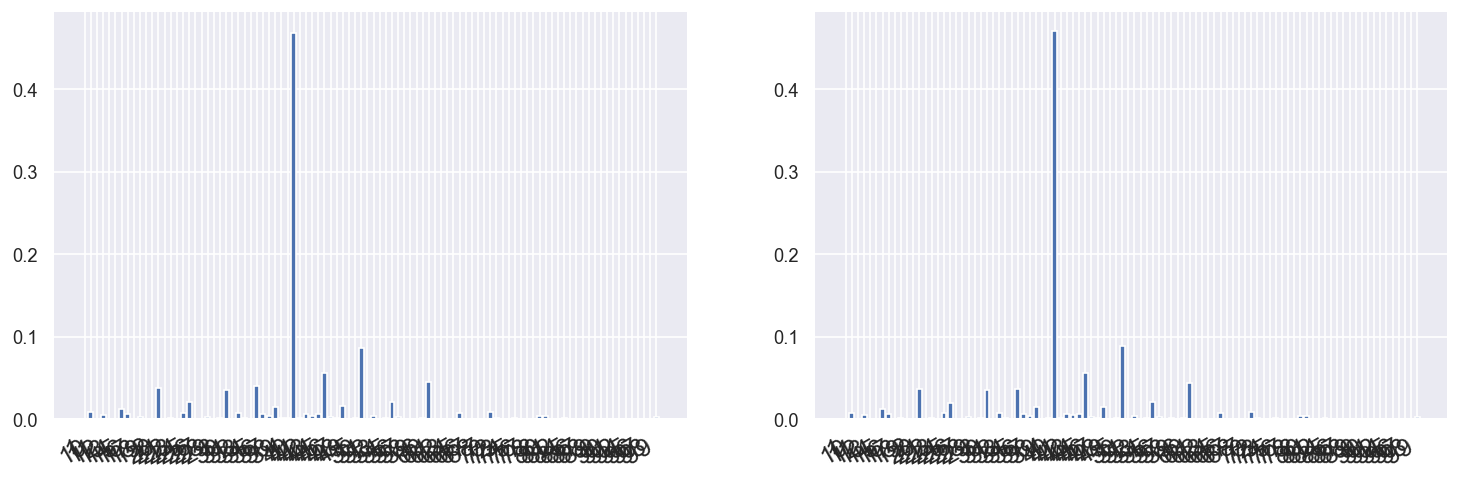

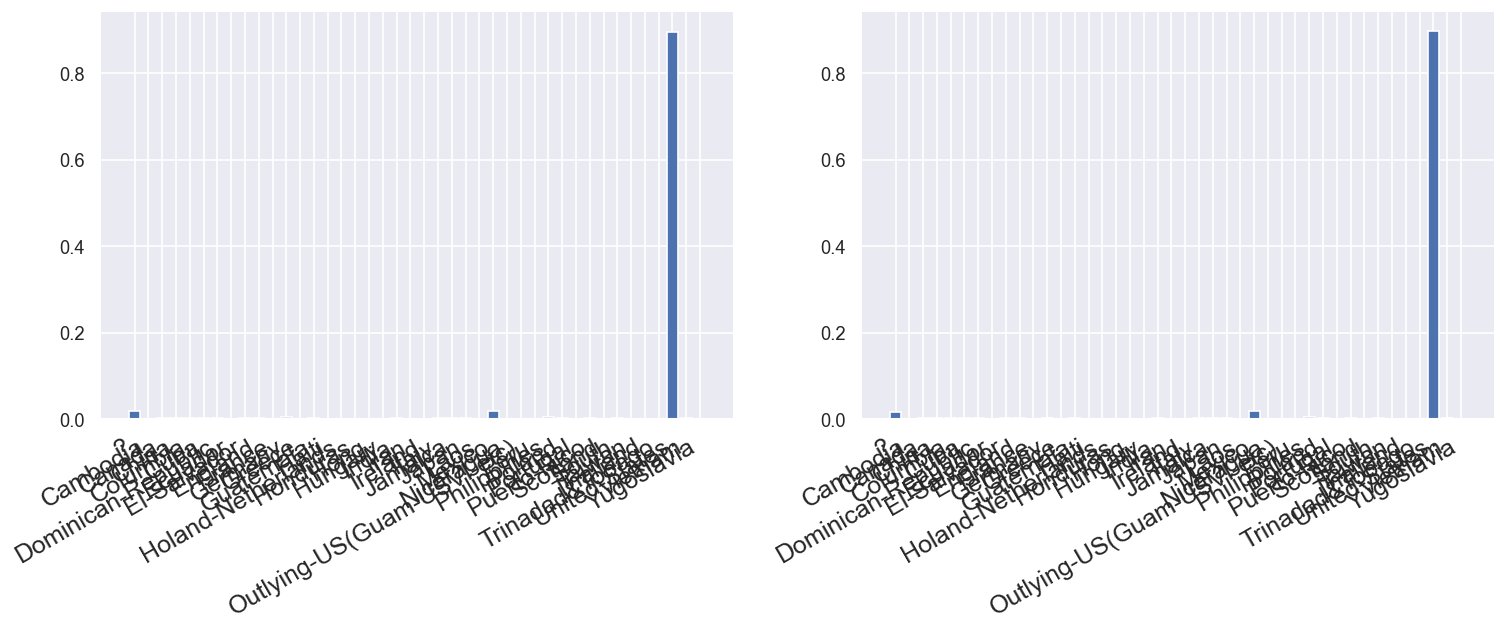

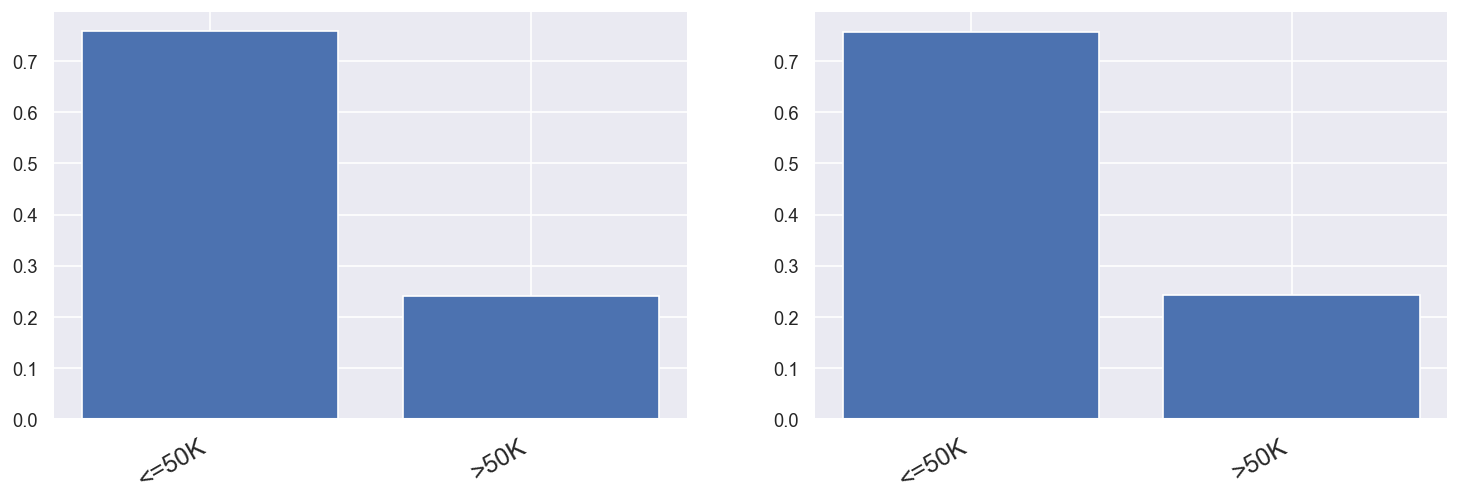

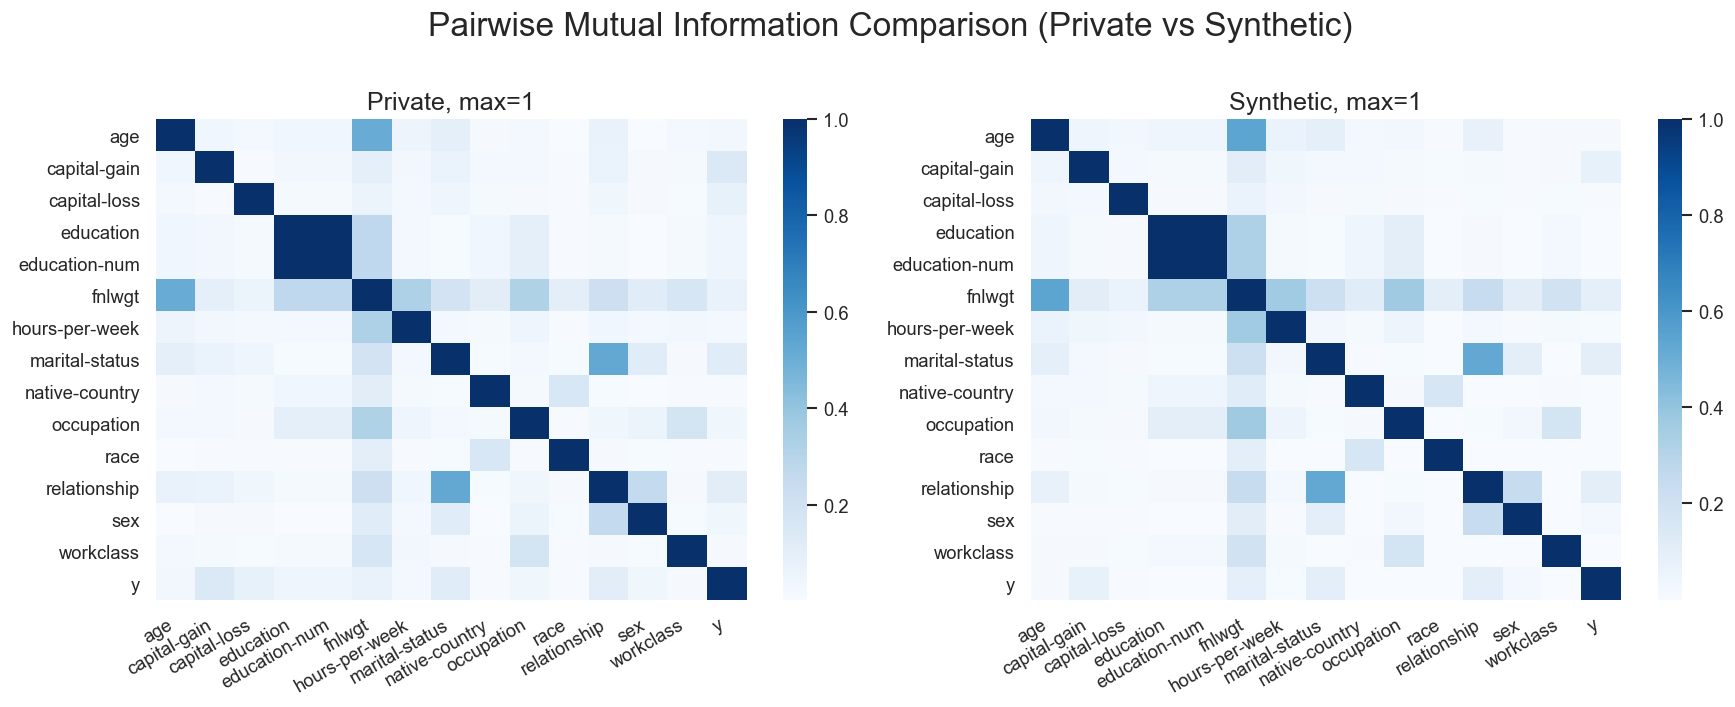

In [43]:
describe(adult, 'adult', 0, ds0, k=2)
generate('adult', 32561, ds0, sd0)
visualize(adult, 'adult', sd0, ds0)

================ Constructing Bayesian Network (BN) ================
Adding ROOT education
Adding attribute education-num
Adding attribute capital-gain
Adding attribute y
Adding attribute race
Adding attribute sex
Adding attribute workclass
Adding attribute relationship
Adding attribute marital-status
Adding attribute occupation
Adding attribute capital-loss
Adding attribute age
Adding attribute native-country
Adding attribute fnlwgt
Adding attribute hours-per-week
========================== BN constructed ==========================
Constructed Bayesian network:
    education-num  has parents ['education'].
    capital-gain   has parents ['education-num', 'education'].
    y              has parents ['capital-gain', 'education'].
    race           has parents ['y', 'education'].
    sex            has parents ['race', 'y'].
    workclass      has parents ['sex', 'education'].
    relationship   has parents ['sex', 'education-num'].
    marital-status has parents ['relationship', 'work

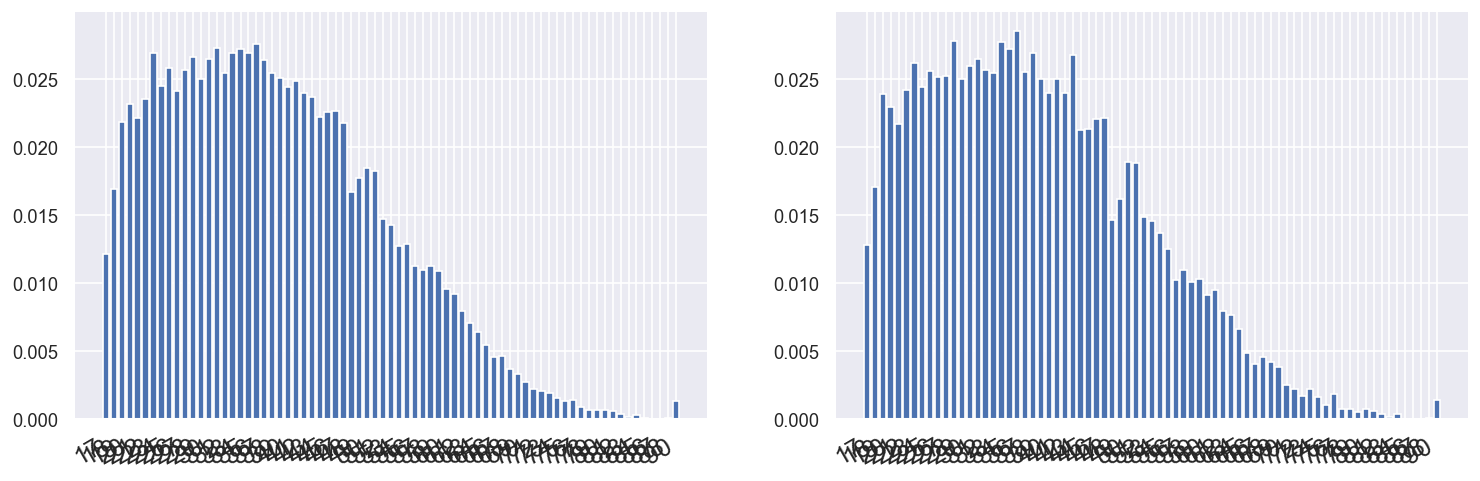

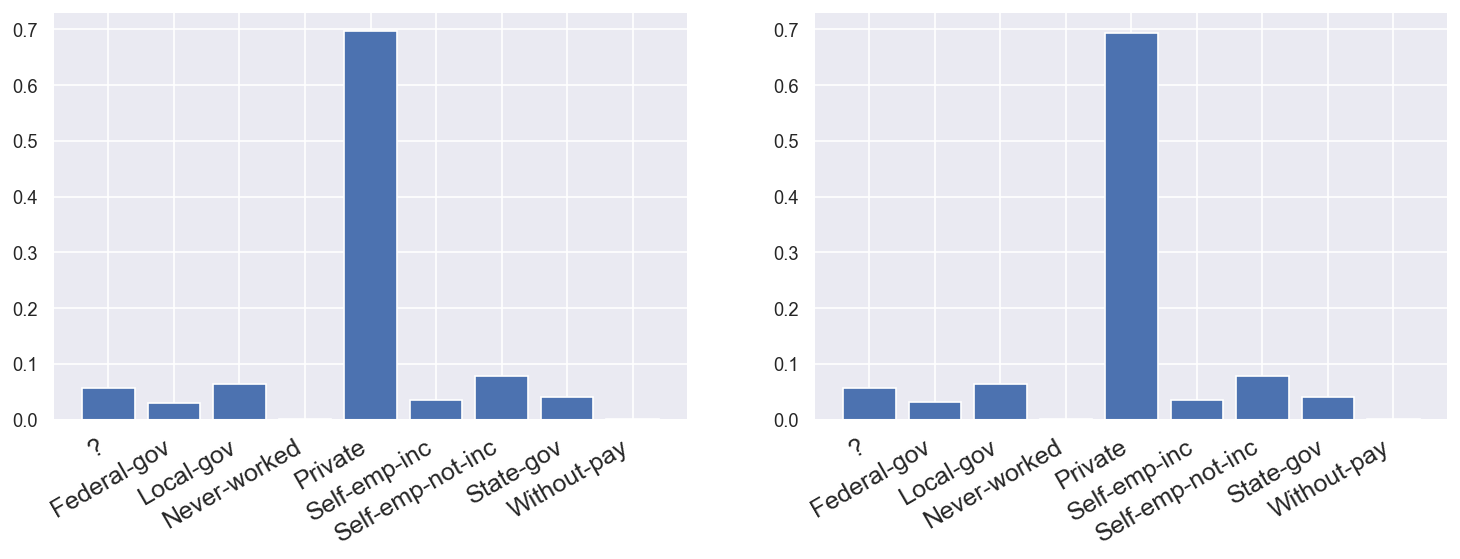

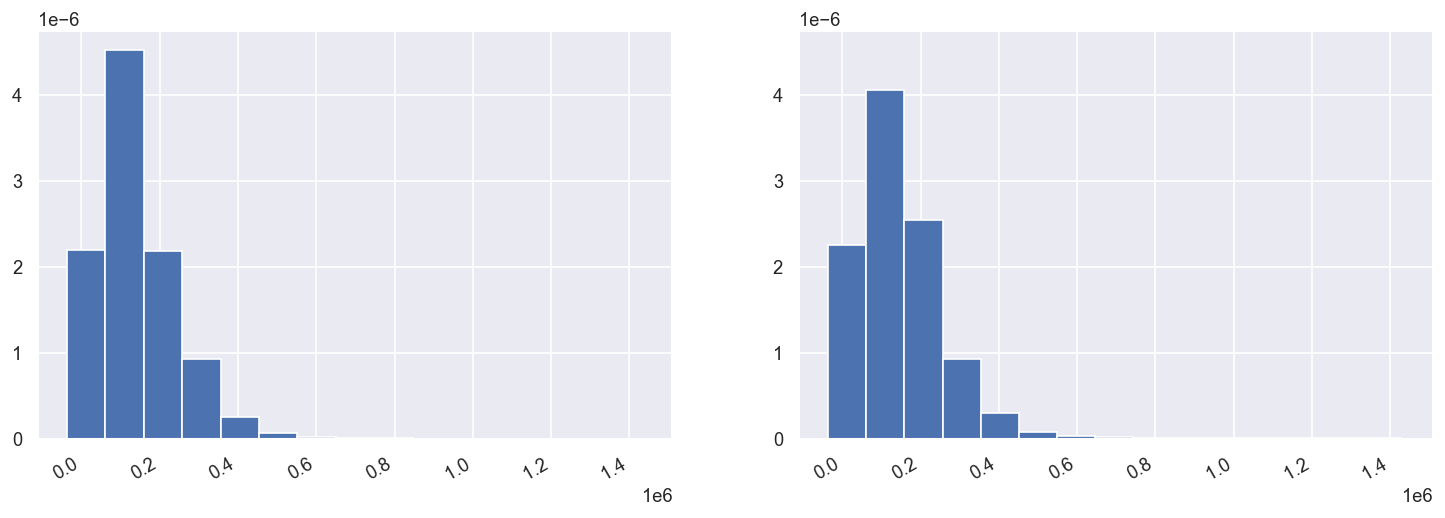

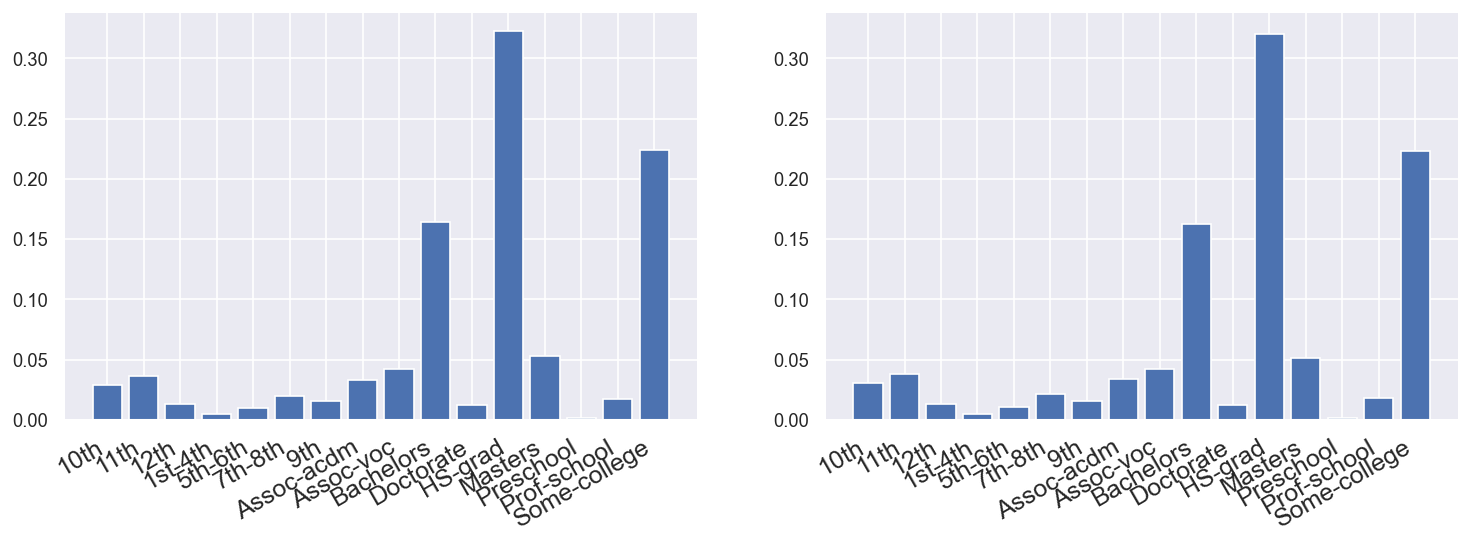

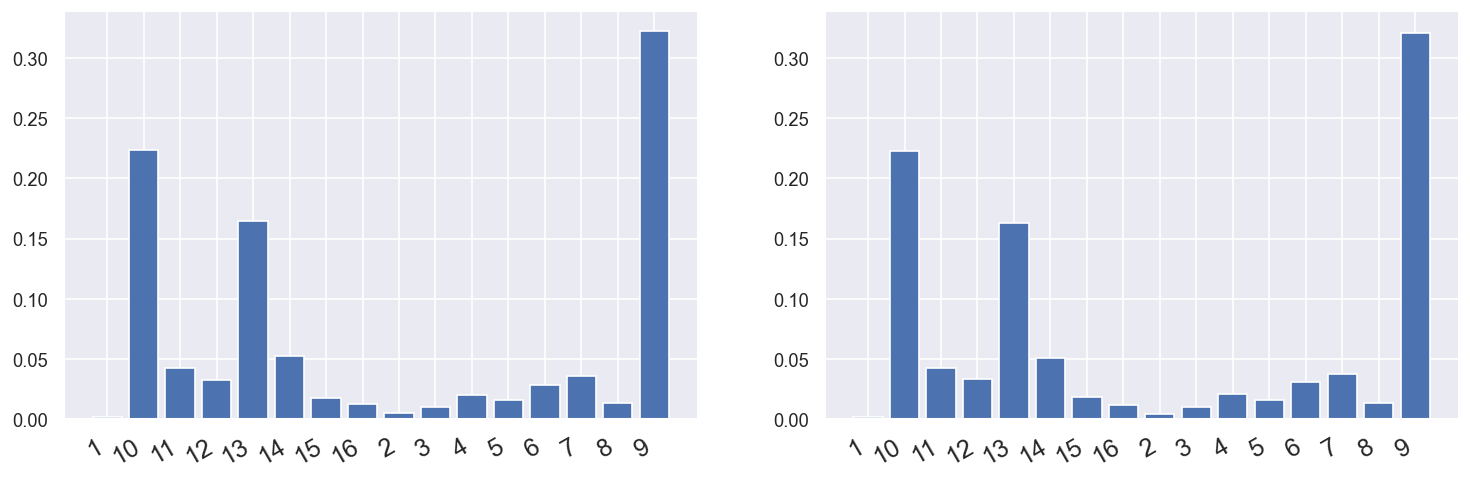

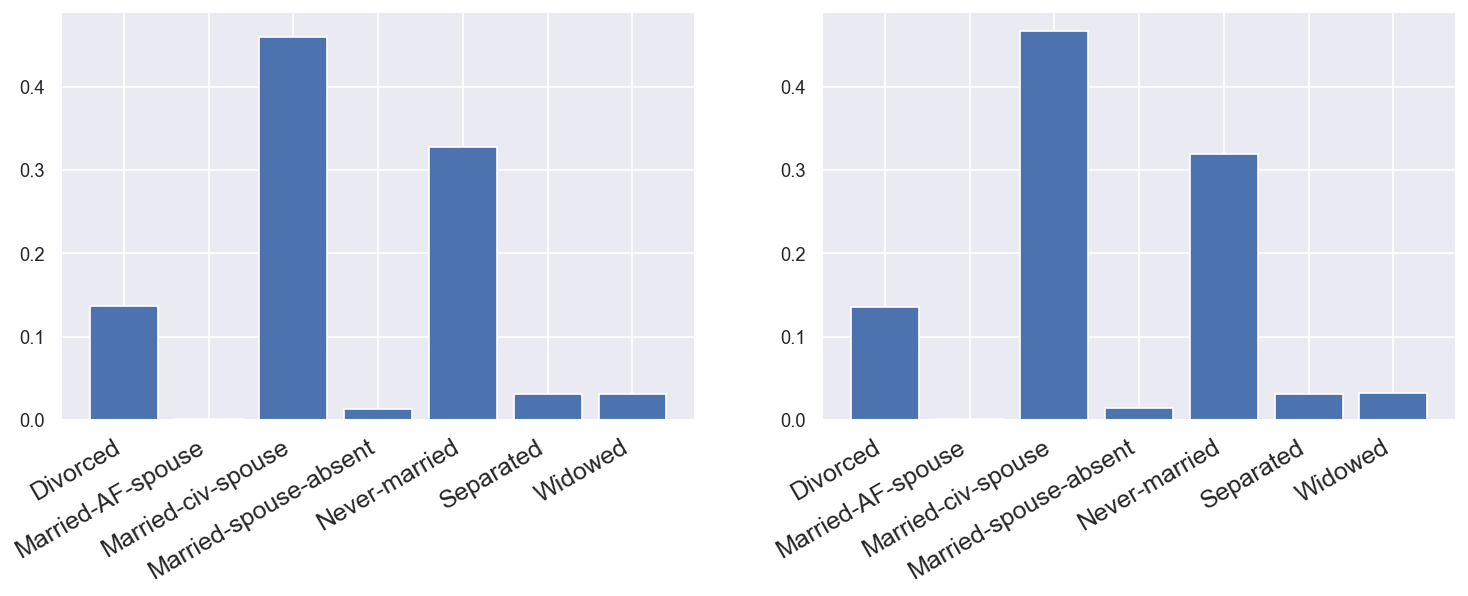

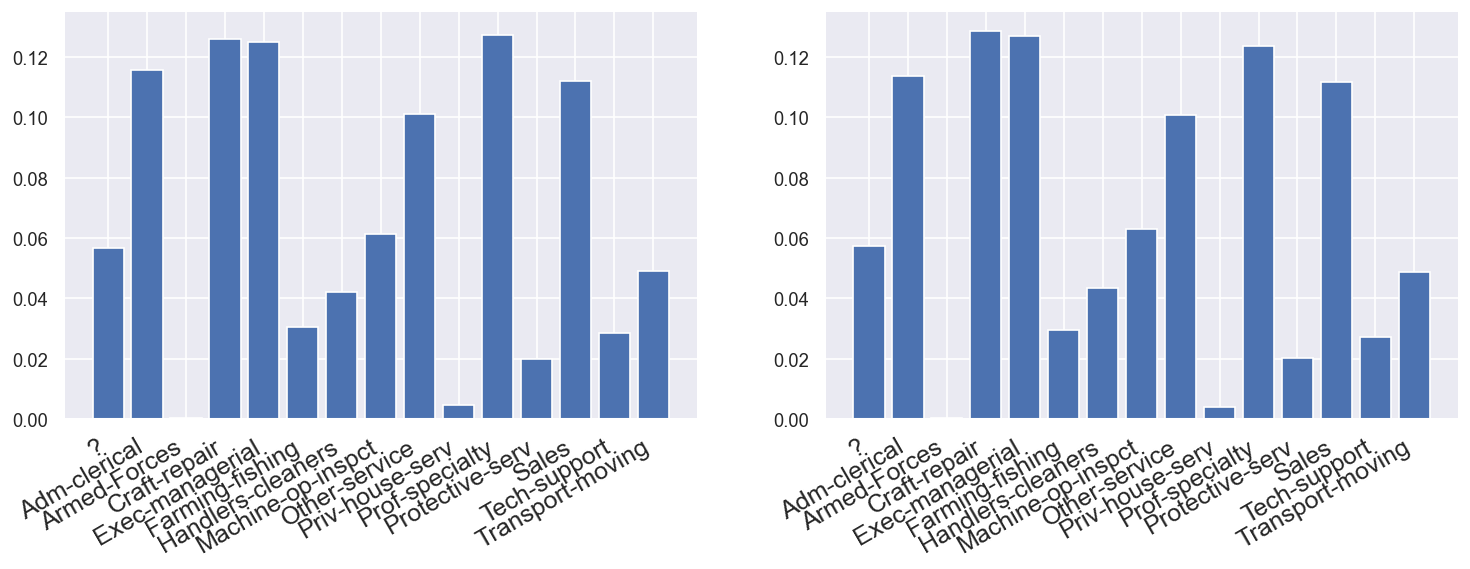

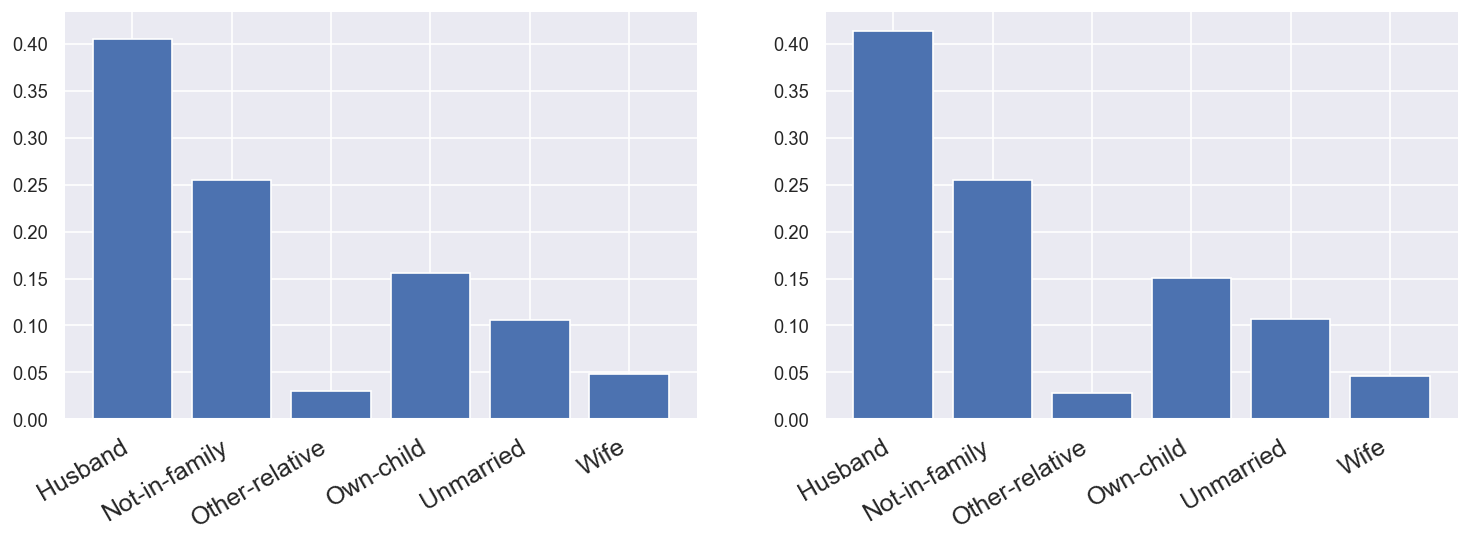

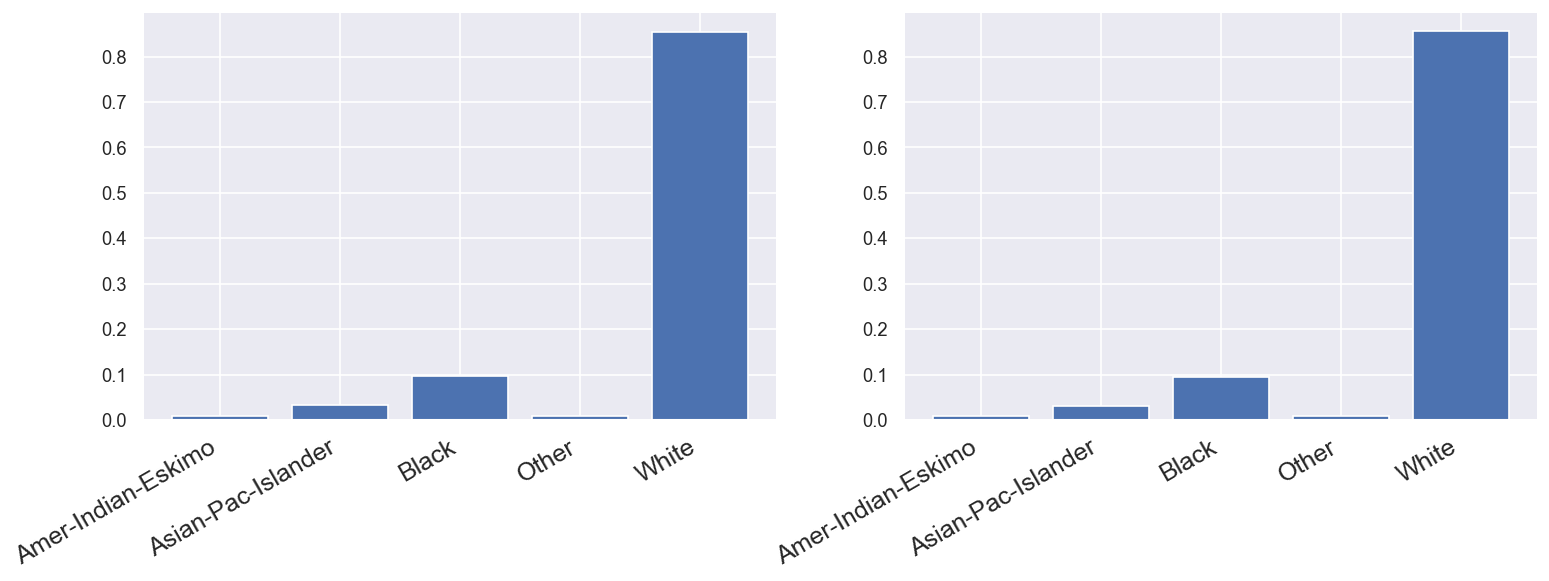

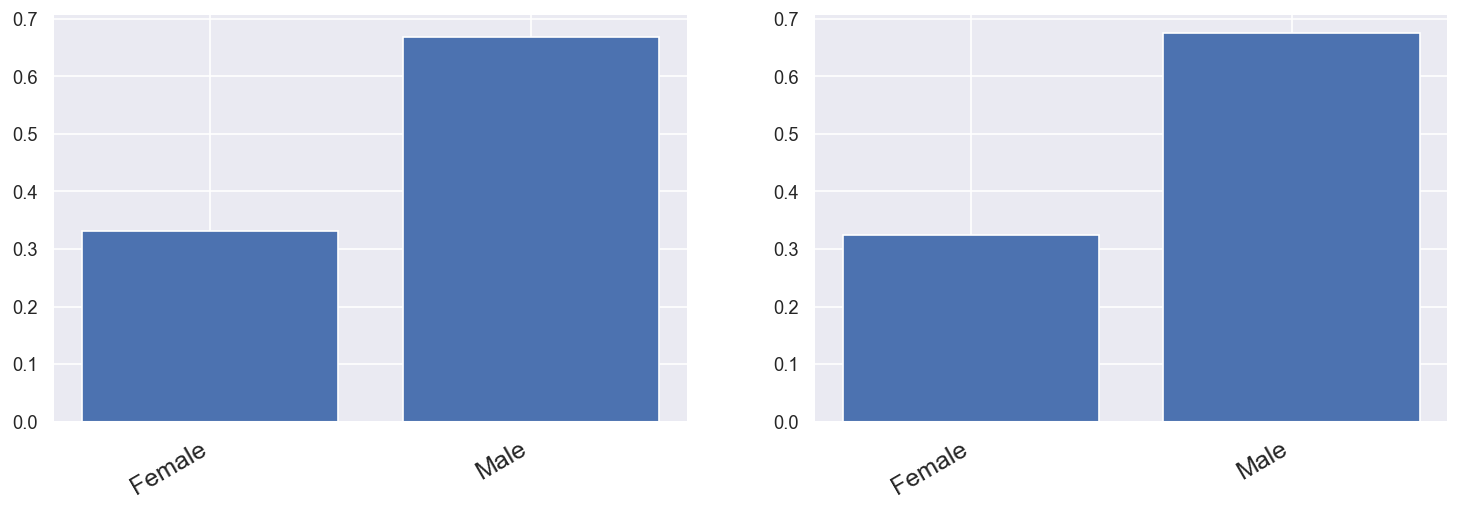

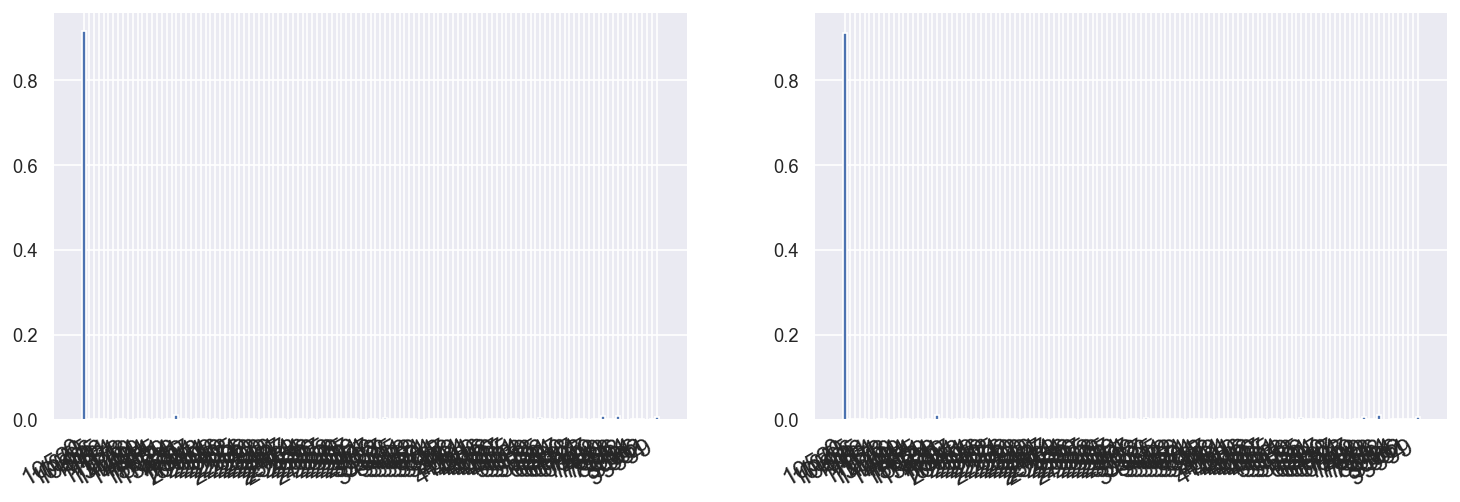

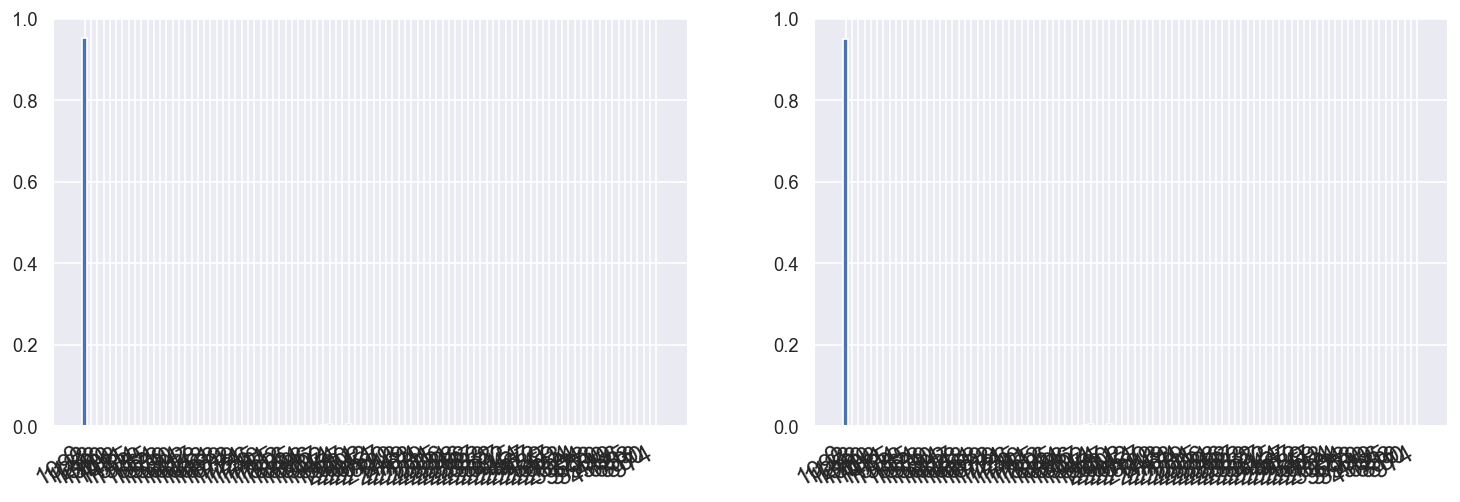

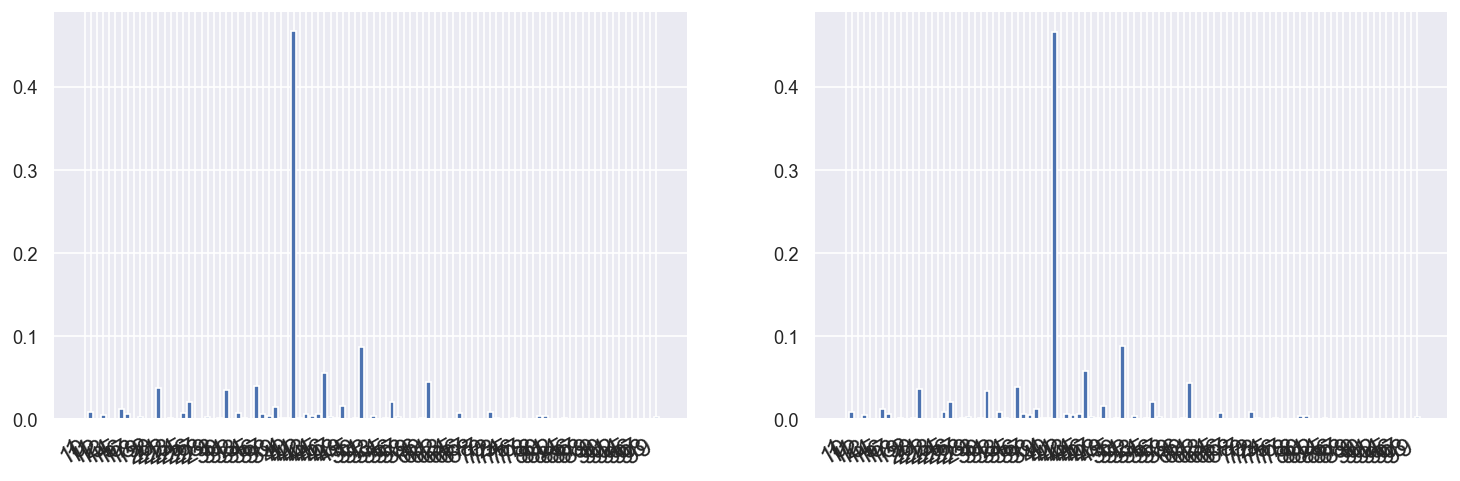

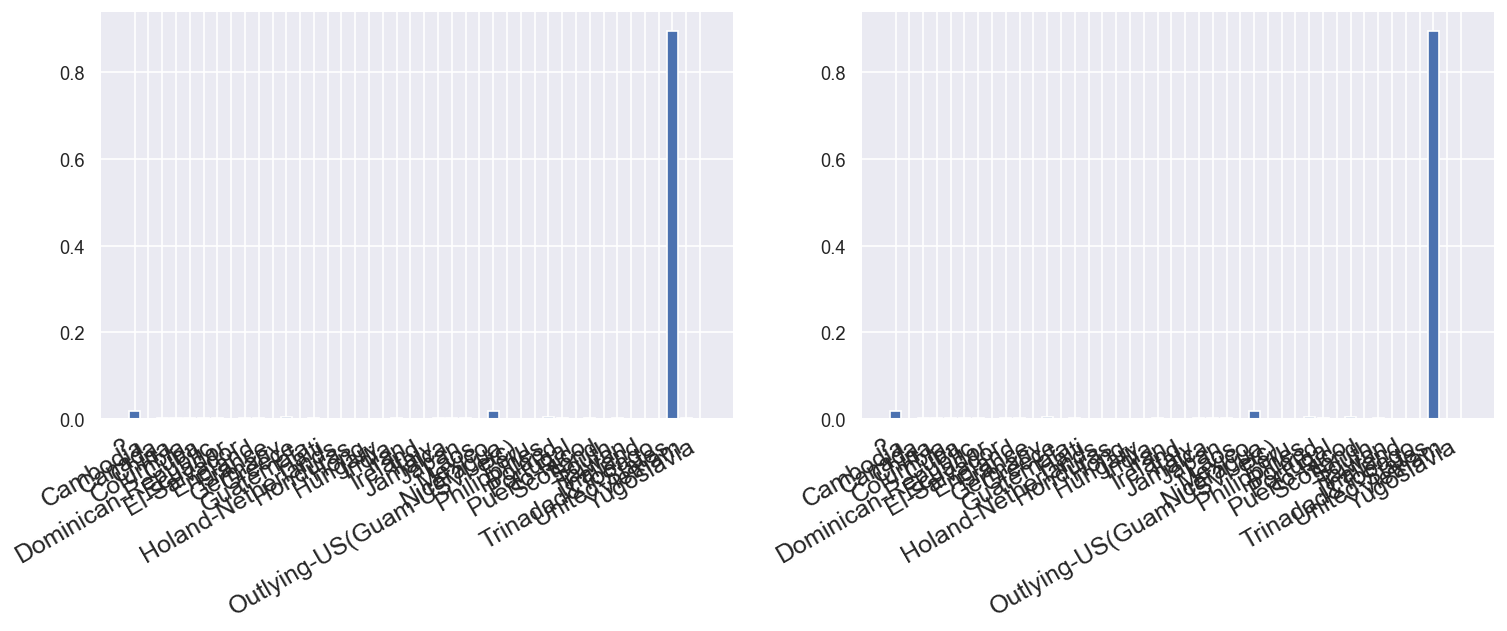

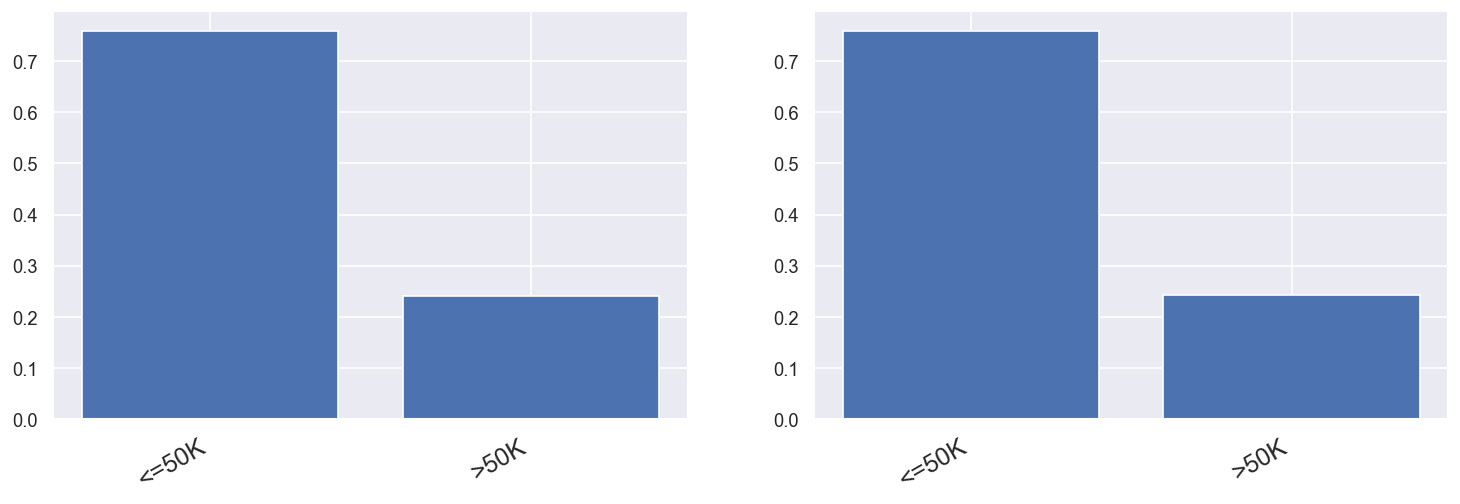

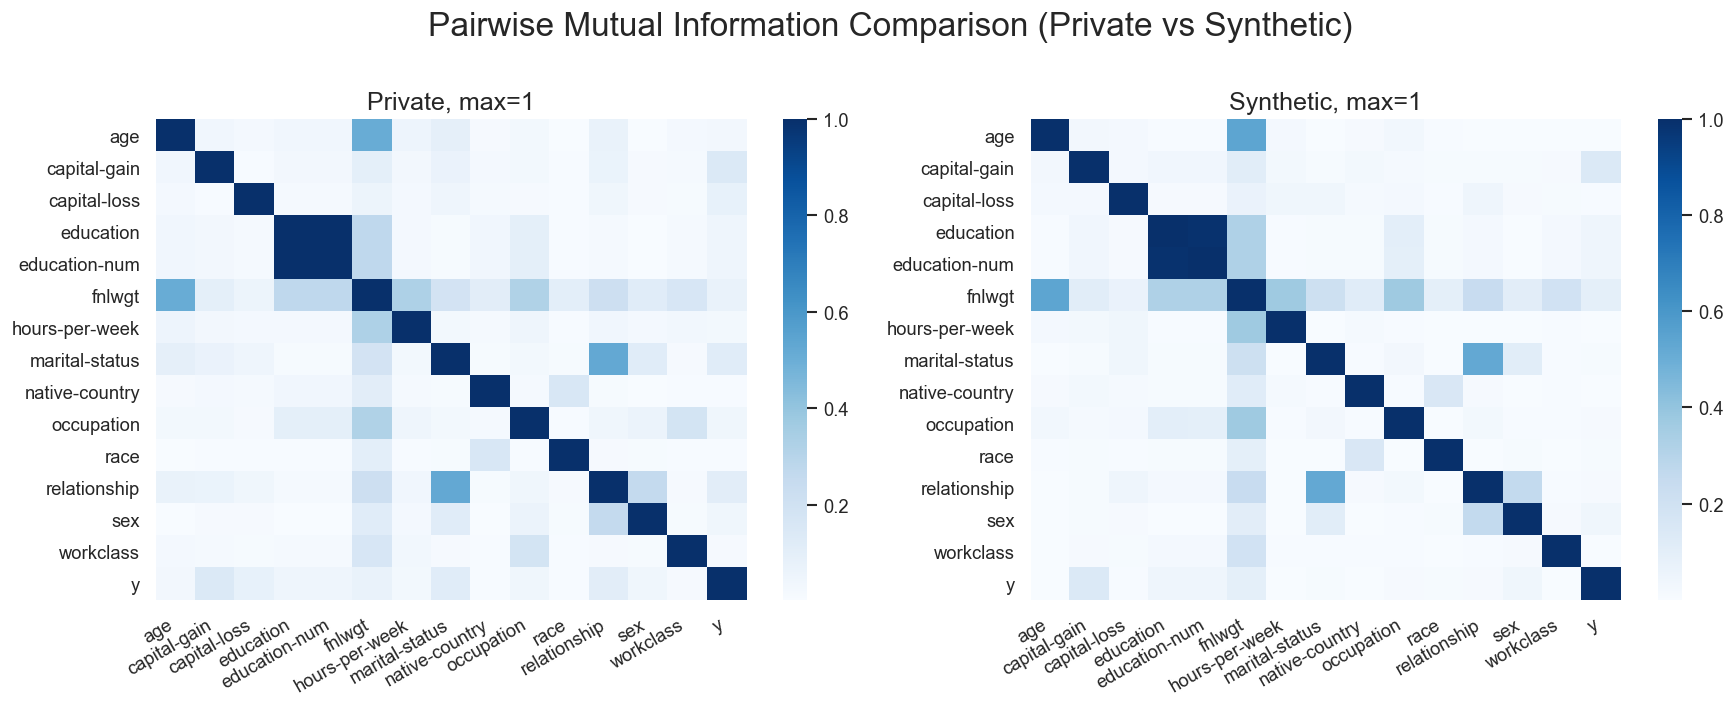

In [44]:
describe(adult, 'adult', 0.25, ds025, k=2)
generate('adult', 32561, ds025, sd025)
visualize(adult, 'adult', sd025, ds025)

================ Constructing Bayesian Network (BN) ================
Adding ROOT native-country
Adding attribute race
Adding attribute y
Adding attribute hours-per-week
Adding attribute workclass
Adding attribute occupation
Adding attribute age
Adding attribute education-num
Adding attribute education
Adding attribute relationship
Adding attribute marital-status
Adding attribute sex
Adding attribute capital-gain
Adding attribute fnlwgt
Adding attribute capital-loss
========================== BN constructed ==========================
Constructed Bayesian network:
    race           has parents ['native-country'].
    y              has parents ['race', 'native-country'].
    hours-per-week has parents ['y', 'race'].
    workclass      has parents ['hours-per-week', 'native-country'].
    occupation     has parents ['workclass', 'native-country'].
    age            has parents ['workclass', 'hours-per-week'].
    education-num  has parents ['age', 'occupation'].
    education      has p

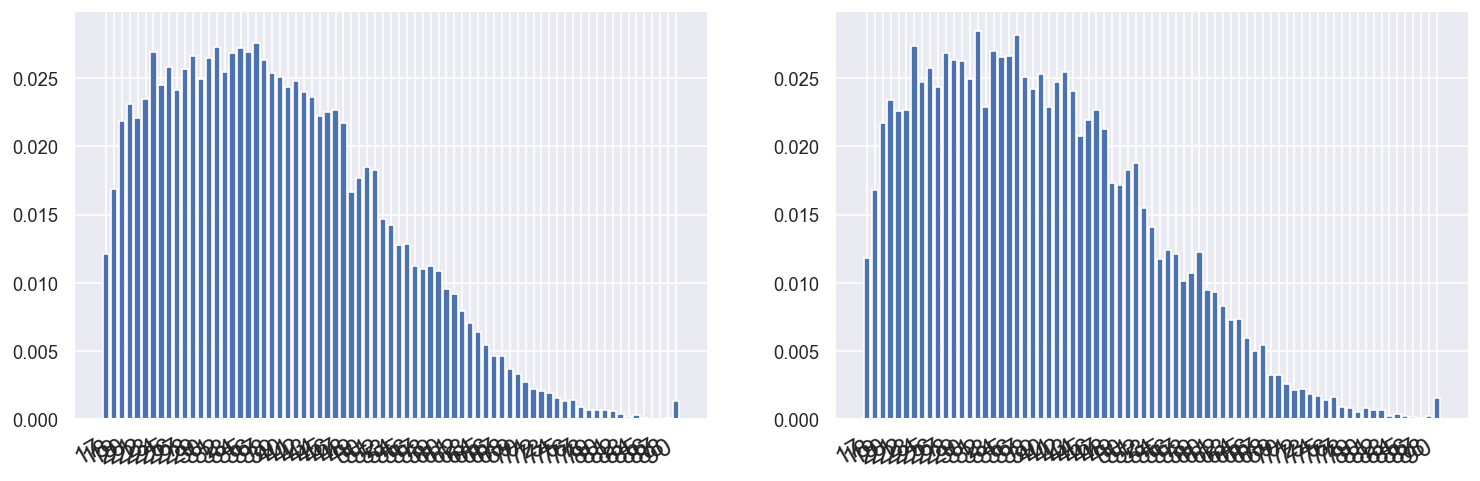

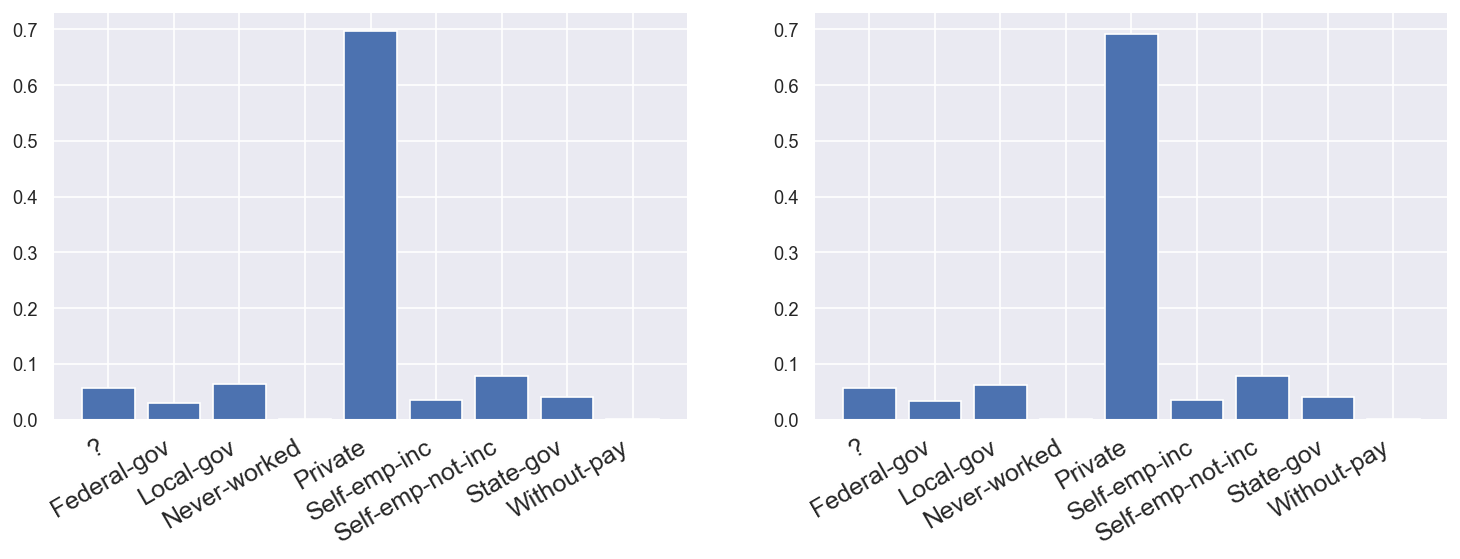

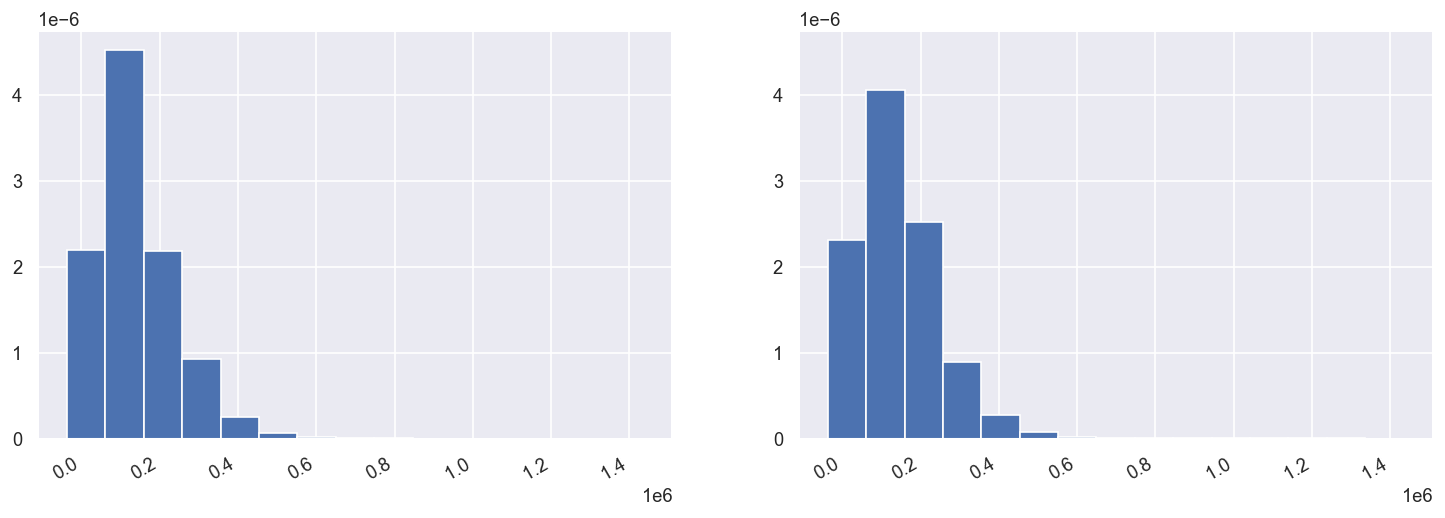

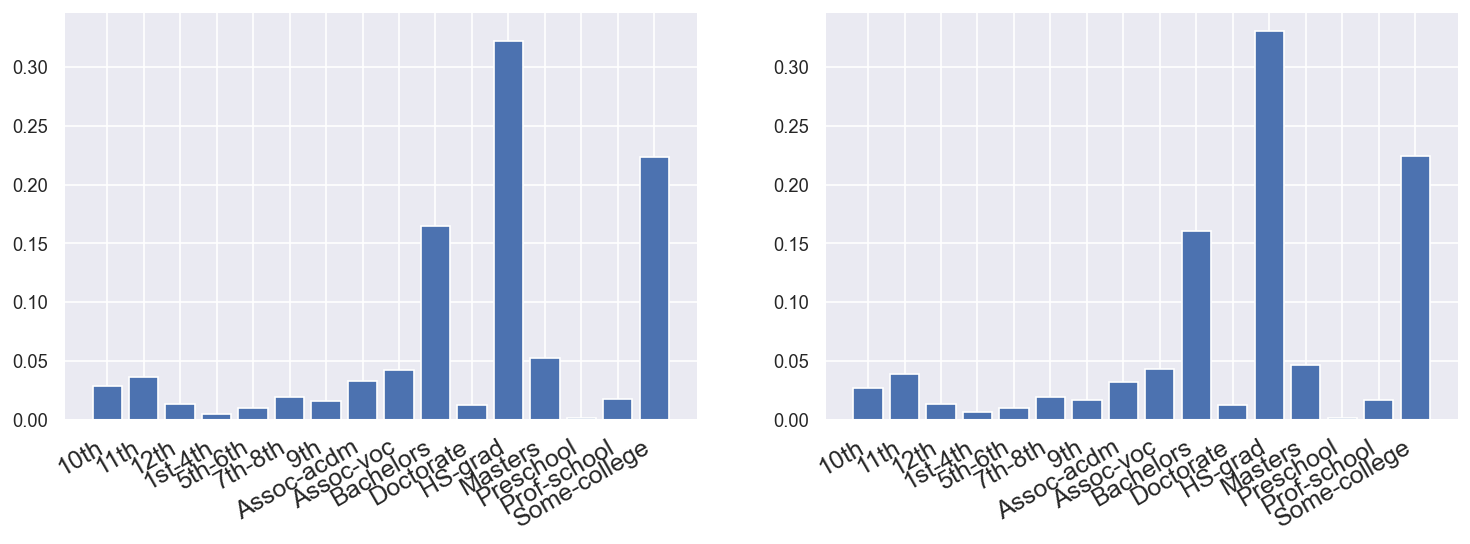

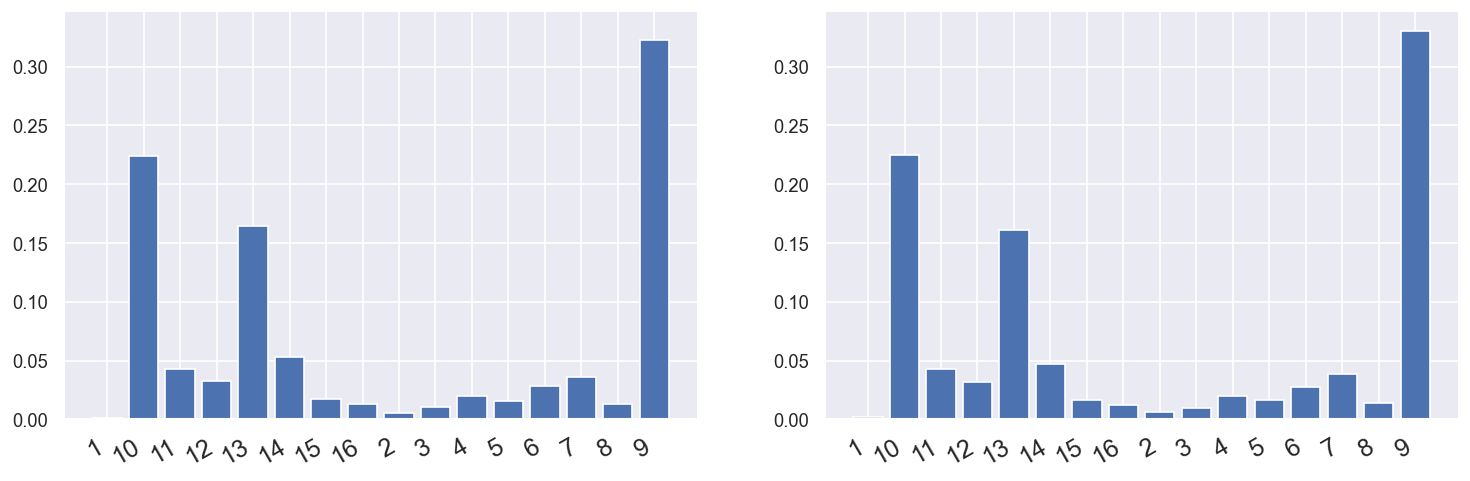

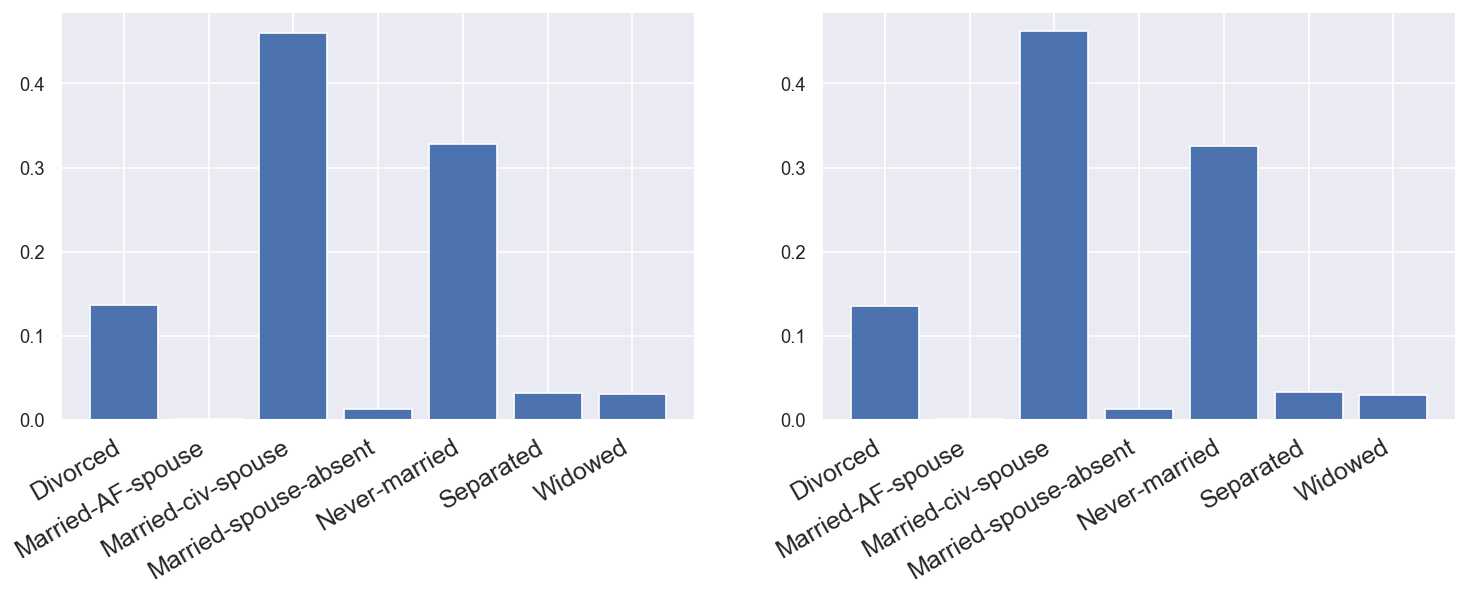

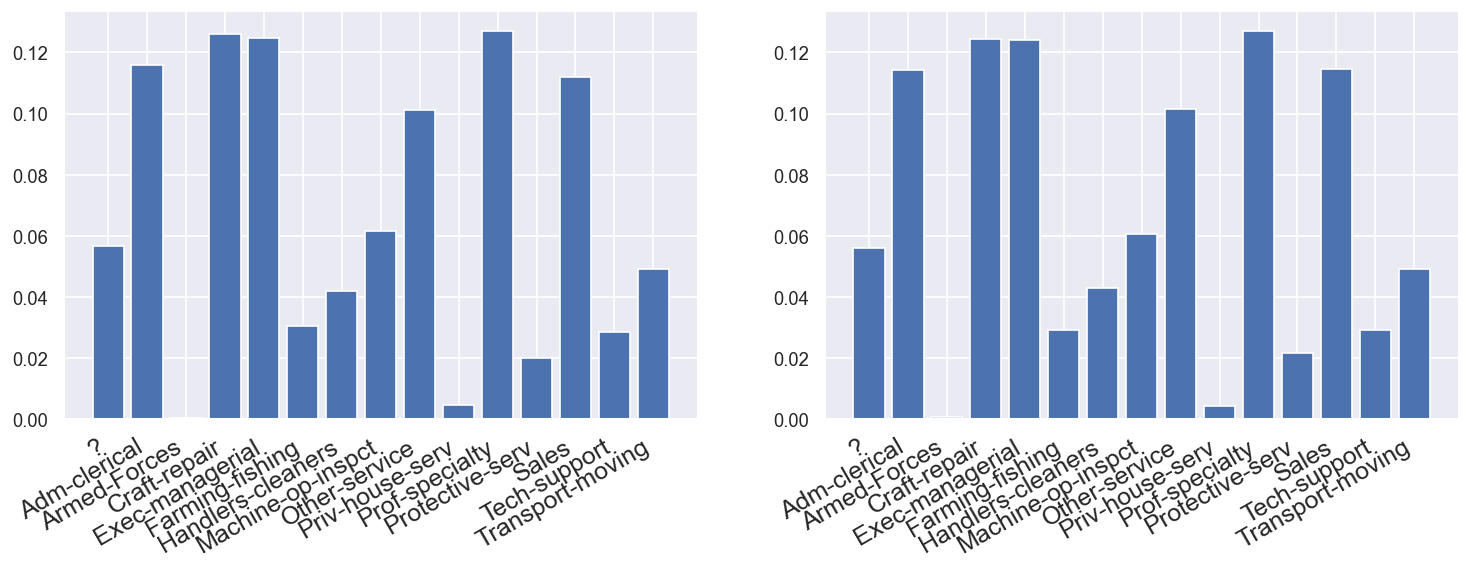

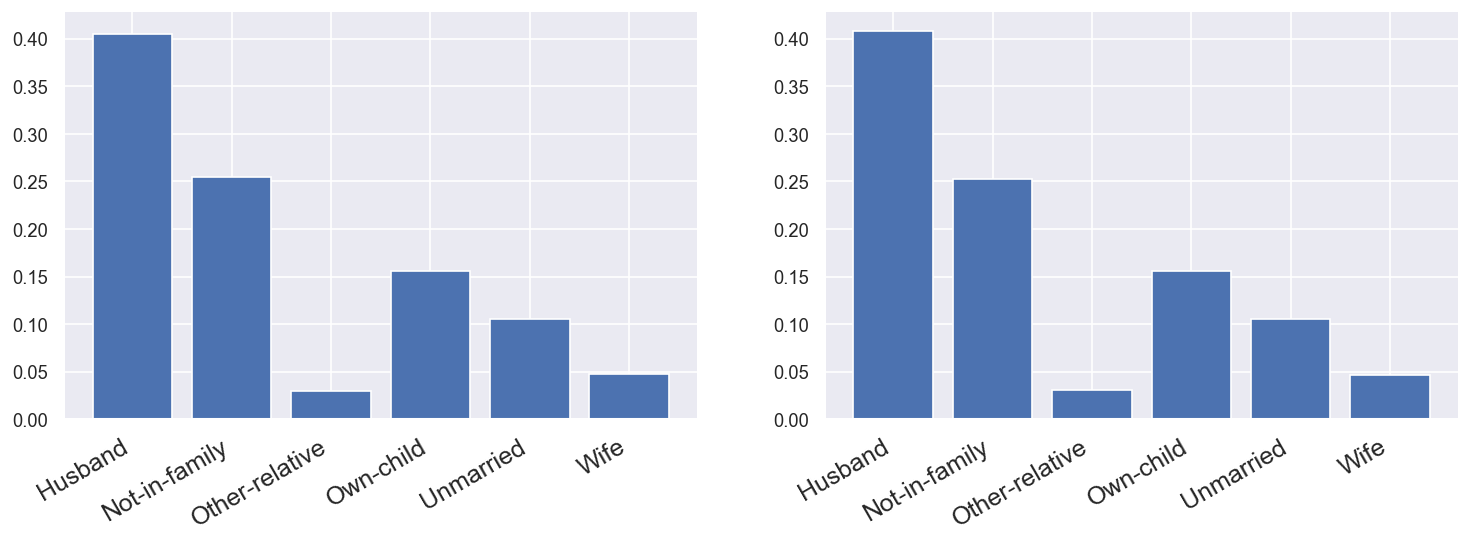

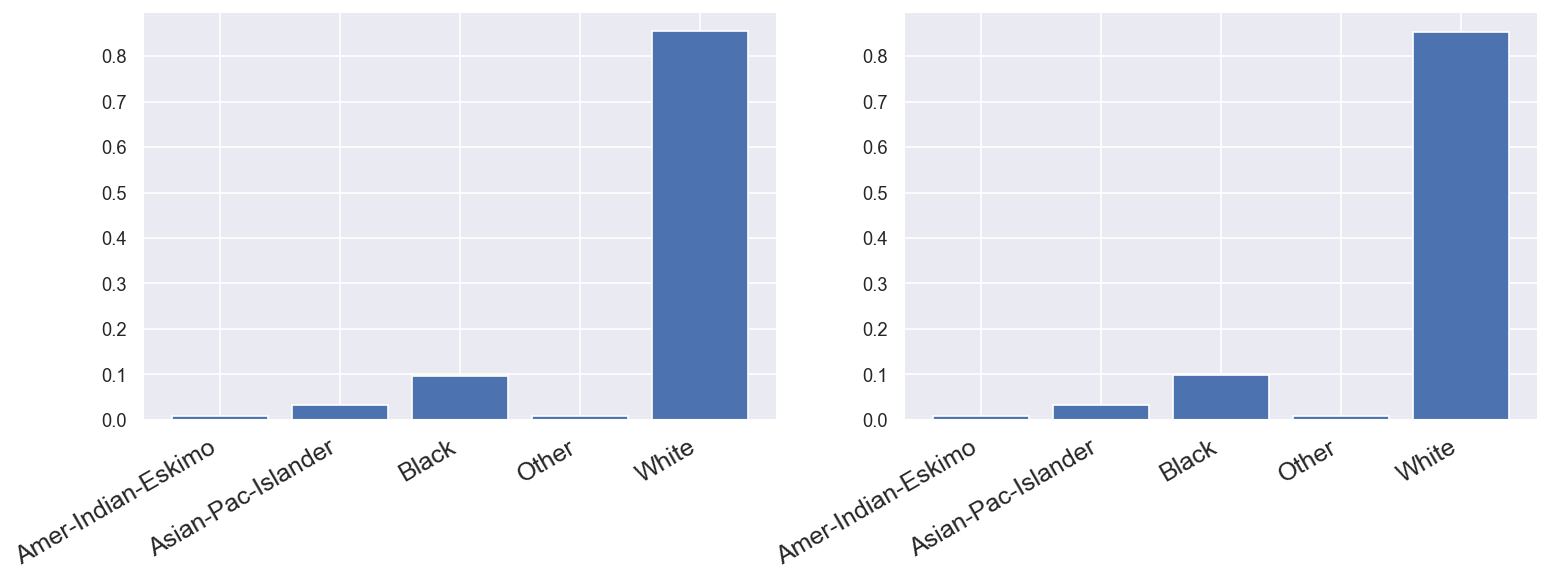

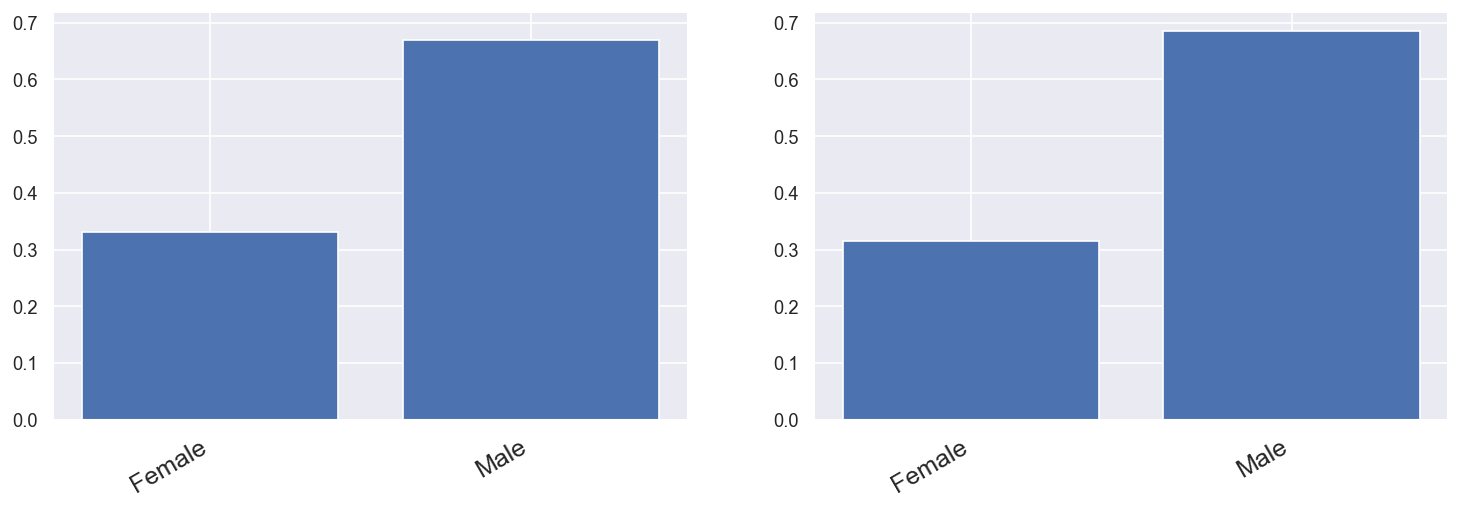

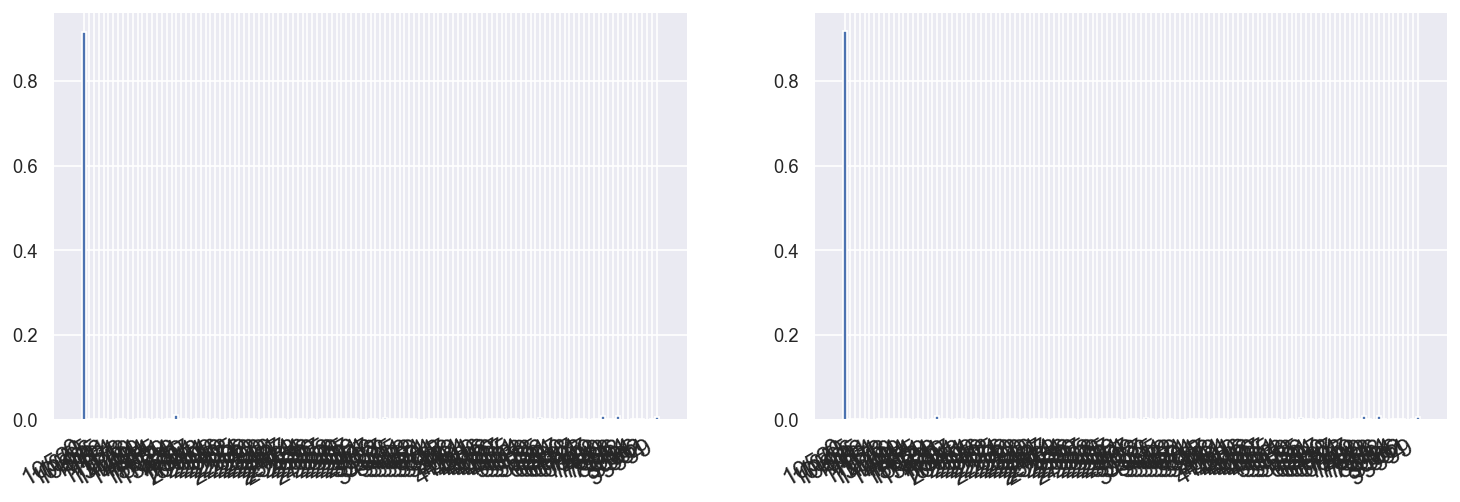

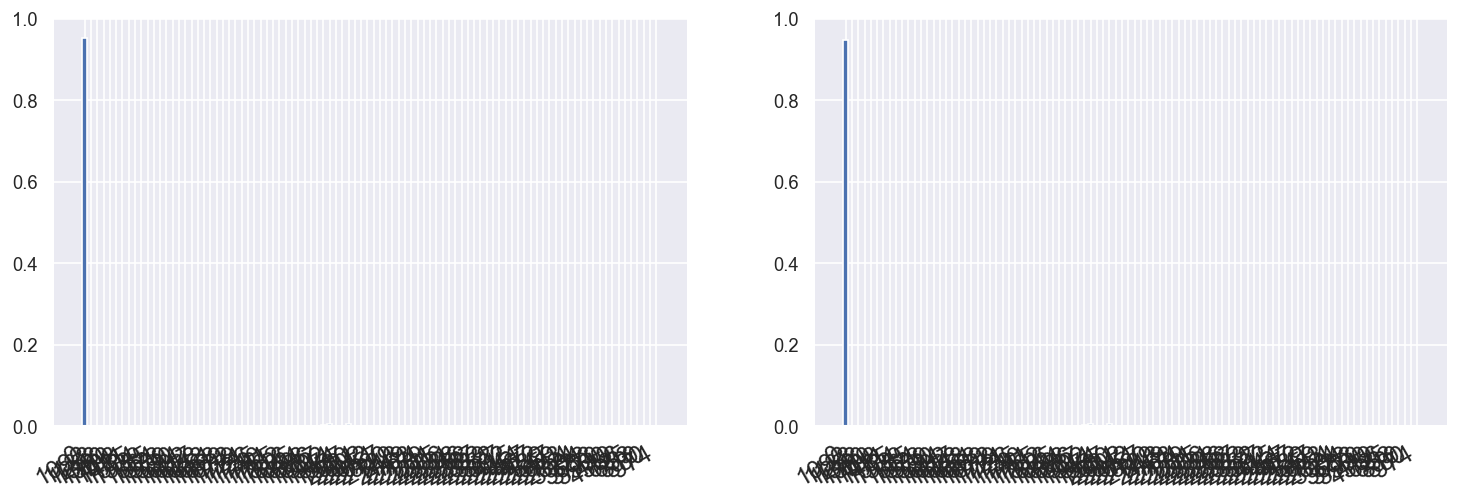

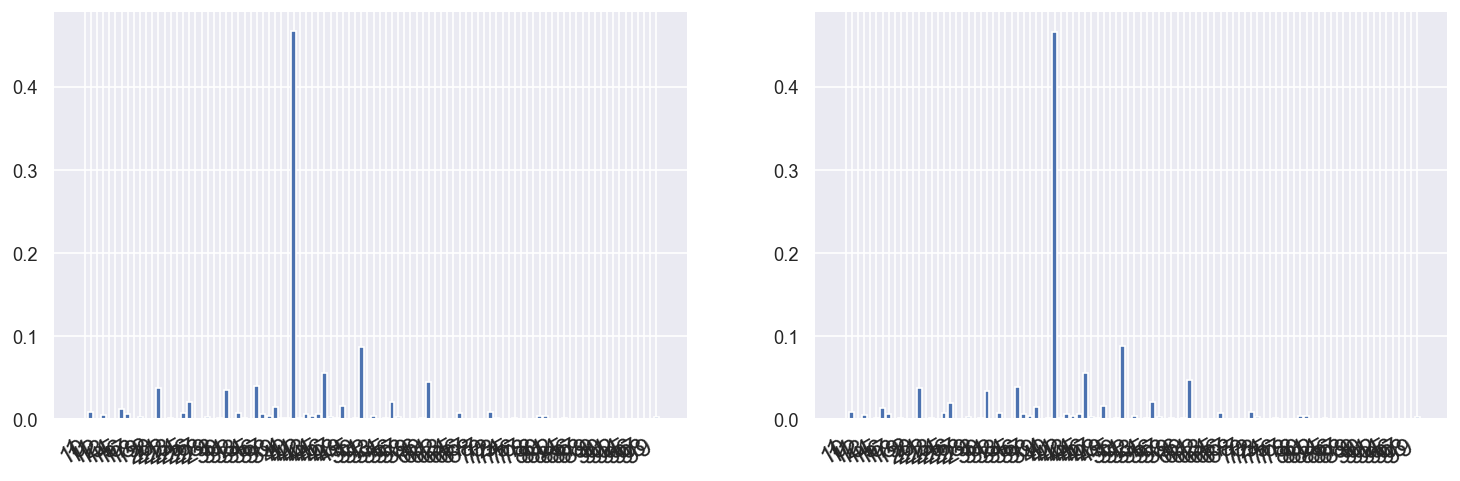

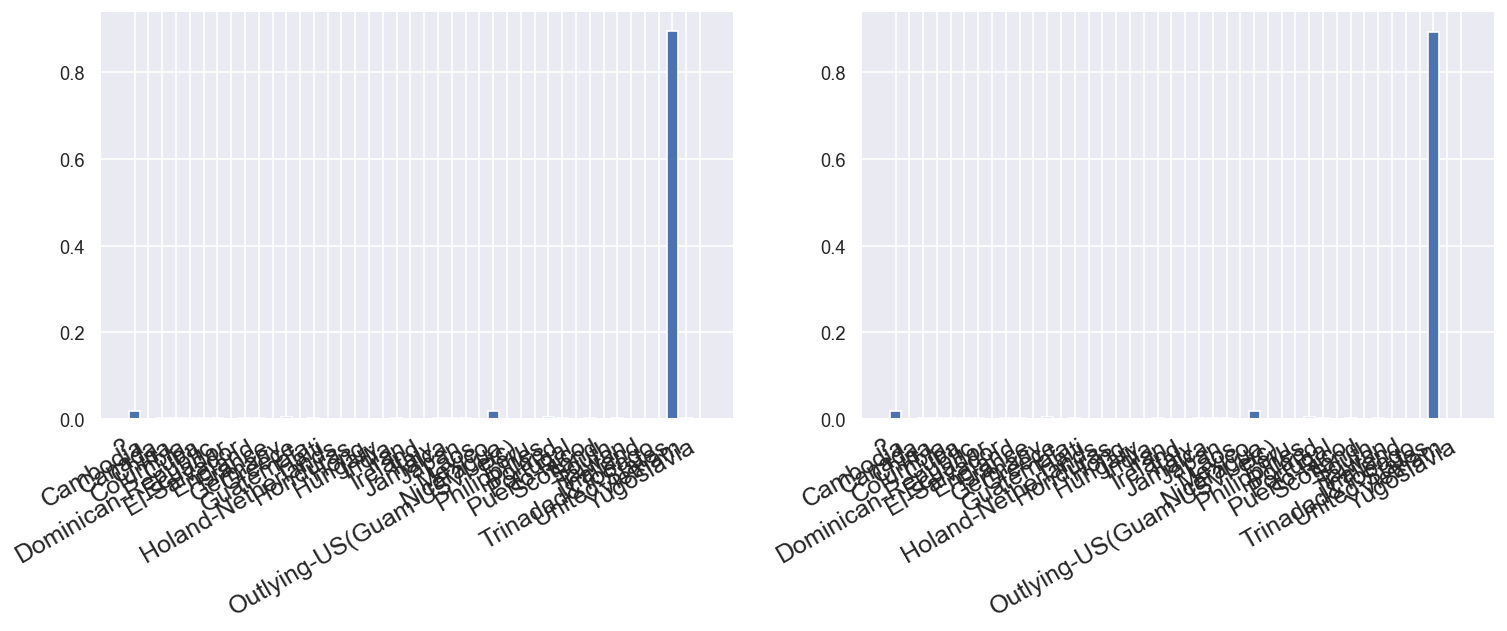

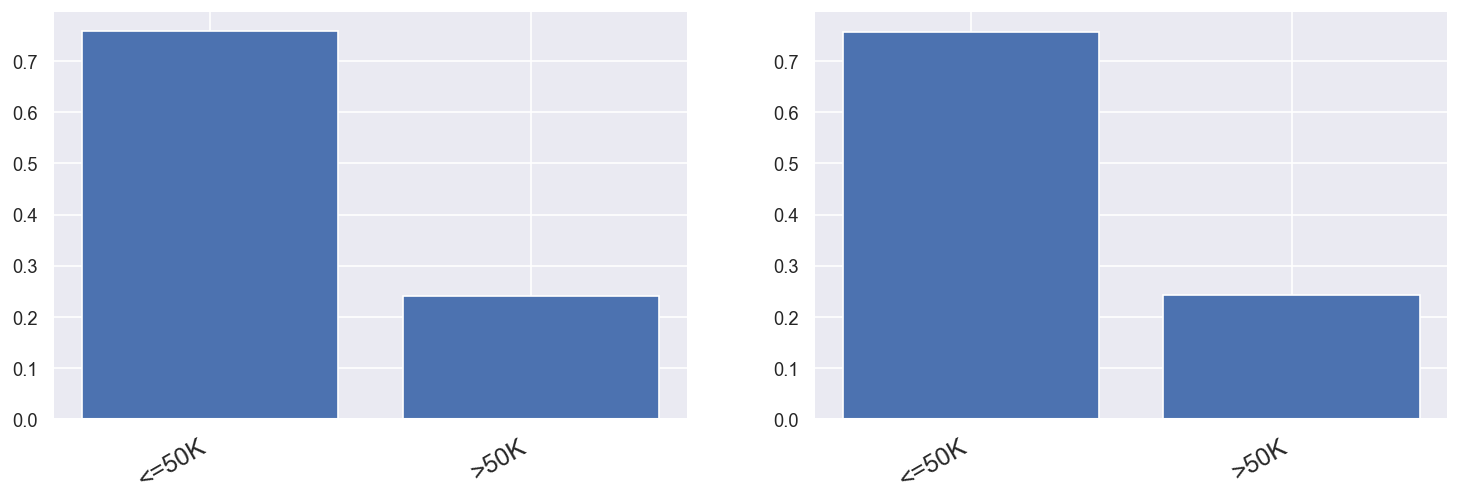

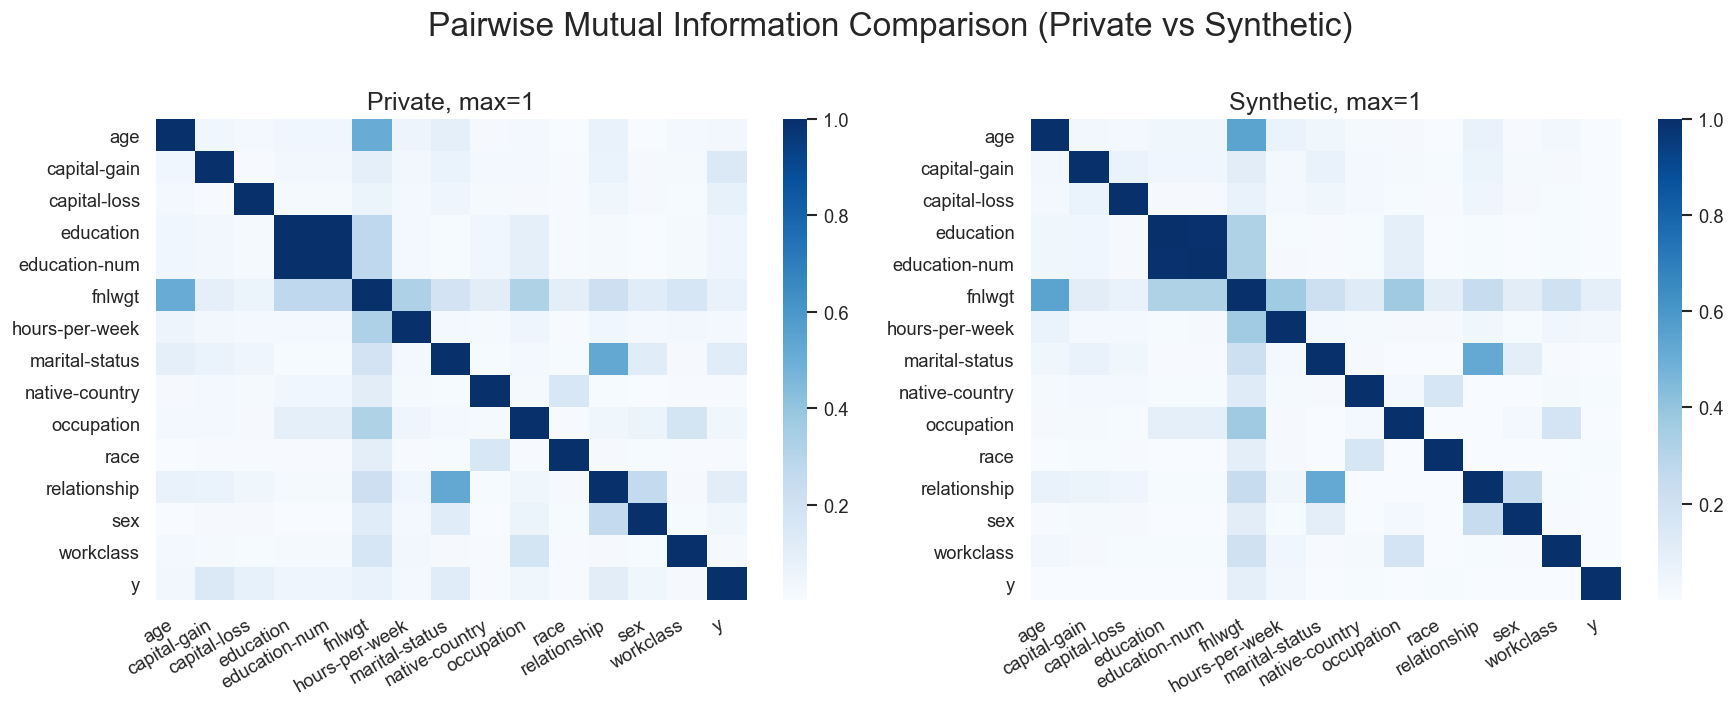

In [60]:
describe(adult, 'adult', 0.5, ds05, k=2)
generate('adult', 32561, ds05, sd05)
visualize(adult, 'adult', sd05, ds05)

In [21]:
bank = f'../bank-data/bank-additional-full.csv'
b_ds = f'../bank-data/out/description-test.json'
b_sd = f'../bank-data/out/sythetic_data-test.csv'


b_ds1 = f'../bank-data/out/description1.json'
b_sd1 = f'../bank-data/out/sythetic_data1.csv'
b_ds0 = f'../bank-data/out/description0.json'
b_sd0 = f'../bank-data/out/sythetic_data0.csv'
b_ds01 = f'../bank-data/out/description01.json'
b_sd01 = f'../bank-data/out/sythetic_data01.csv'
b_ds025 = f'../bank-data/out/description025.json'
b_sd025 = f'../bank-data/out/sythetic_data025.csv'

b_ds05 = f'../bank-data/out/description05.json'
b_sd05 = f'../bank-data/out/sythetic_data05.csv'



================ Constructing Bayesian Network (BN) ================
Adding ROOT age
Adding attribute cons.conf.idx
Adding attribute cons.price.idx
Adding attribute month
Adding attribute emp.var.rate
Adding attribute euribor3m
Adding attribute nr.employed
Adding attribute contact
Adding attribute pdays
Adding attribute previous
Adding attribute y
Adding attribute campaign
Adding attribute day_of_week
Adding attribute education
Adding attribute job
Adding attribute housing
Adding attribute poutcome
Adding attribute marital
Adding attribute loan
Adding attribute duration
Adding attribute default
========================== BN constructed ==========================
Constructed Bayesian network:
    cons.conf.idx  has parents ['age'].
    cons.price.idx has parents ['cons.conf.idx', 'age'].
    month          has parents ['cons.price.idx', 'cons.conf.idx'].
    emp.var.rate   has parents ['month', 'cons.price.idx'].
    euribor3m      has parents ['cons.price.idx', 'cons.conf.idx'].
    nr

/Users/eunbeejang/miniconda3/envs/py38/lib/python3.8/site-packages/DataSynthesizer/ModelInspector.py:75: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(15, 5), dpi=120)


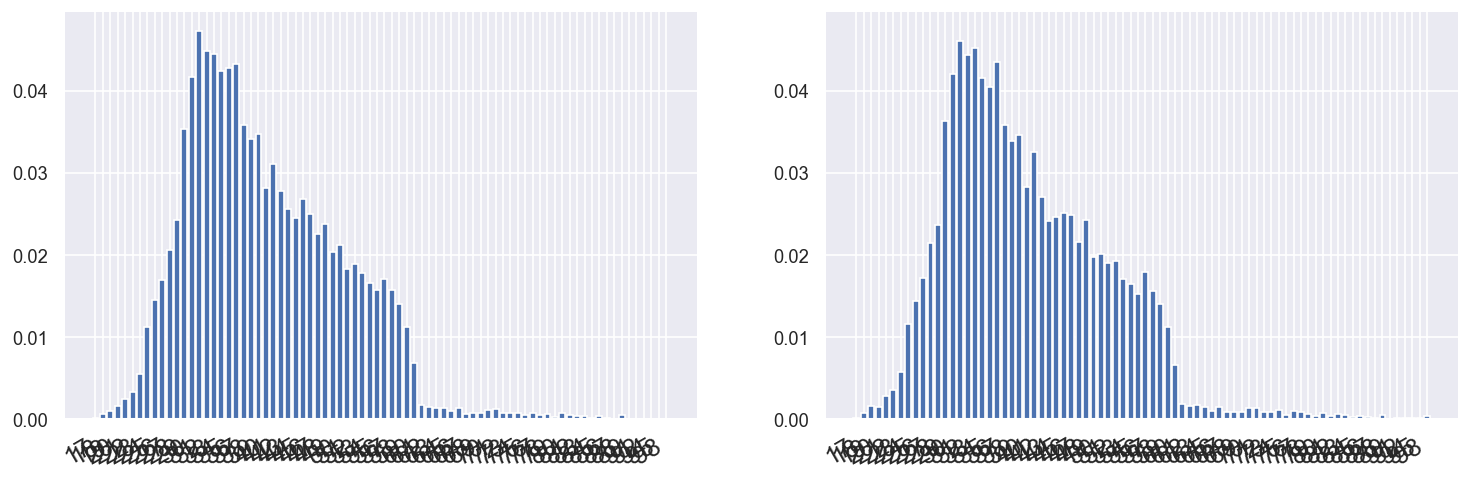

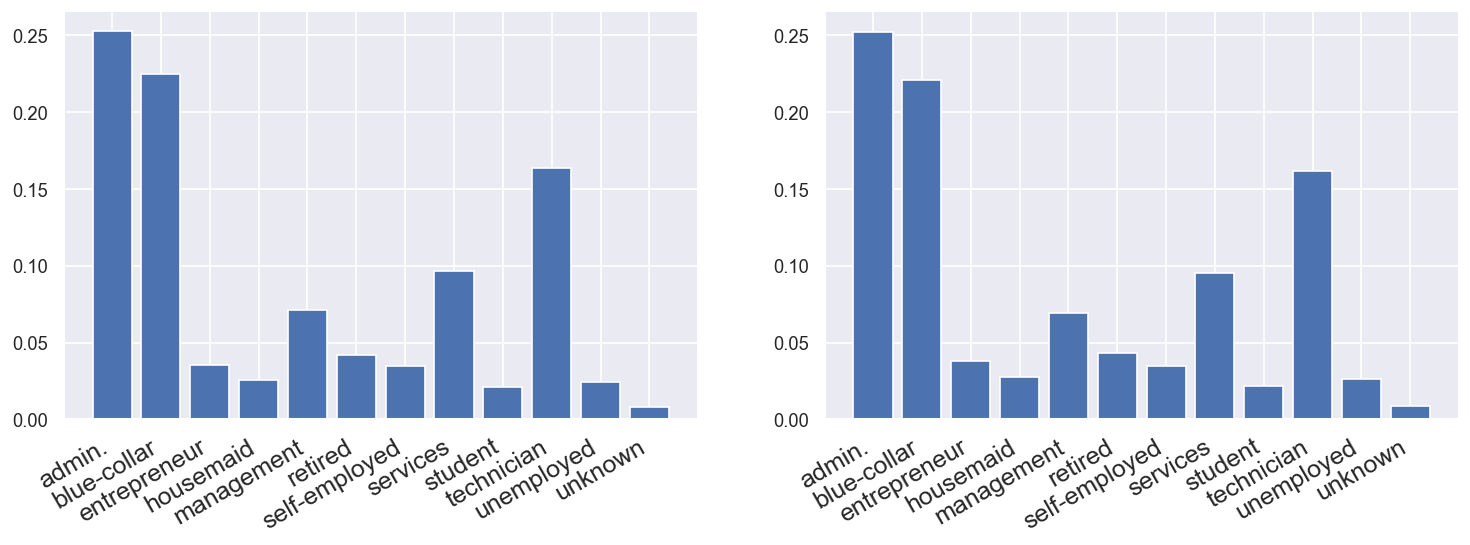

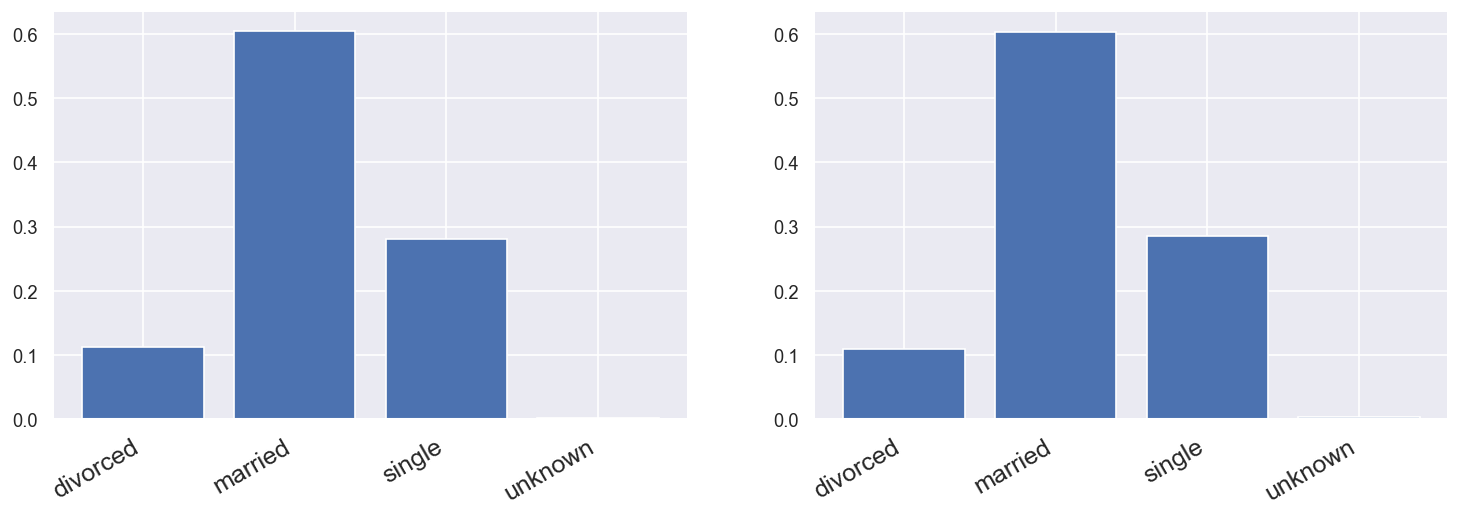

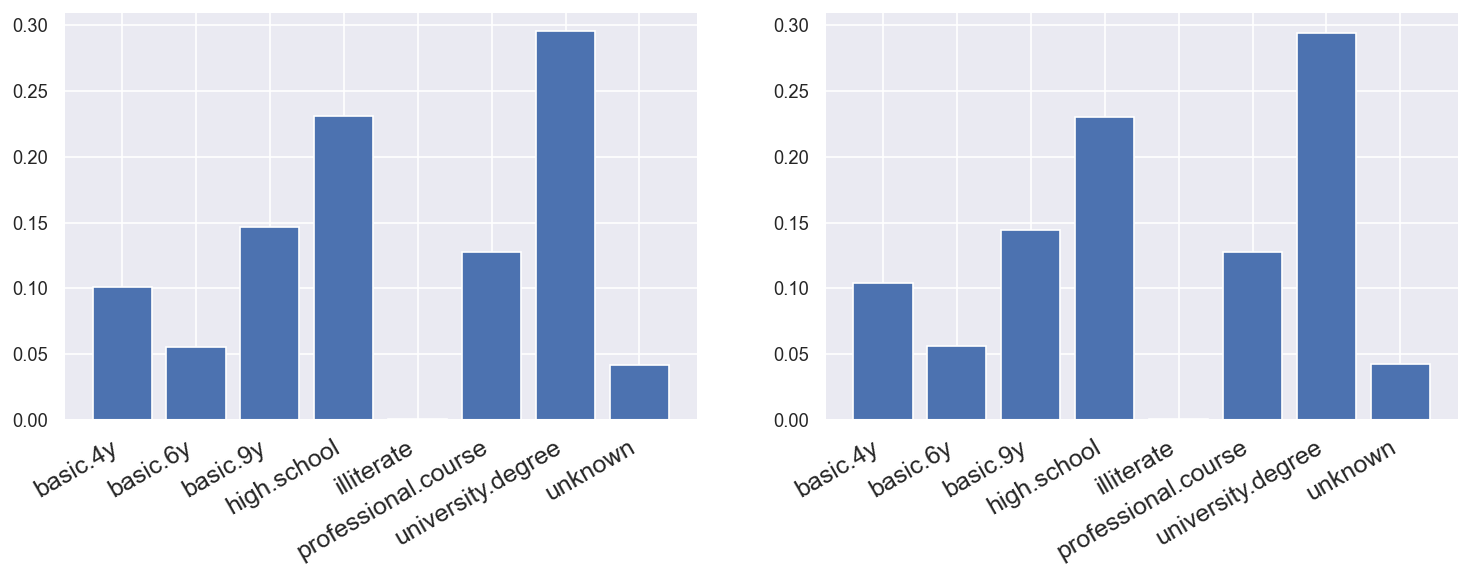

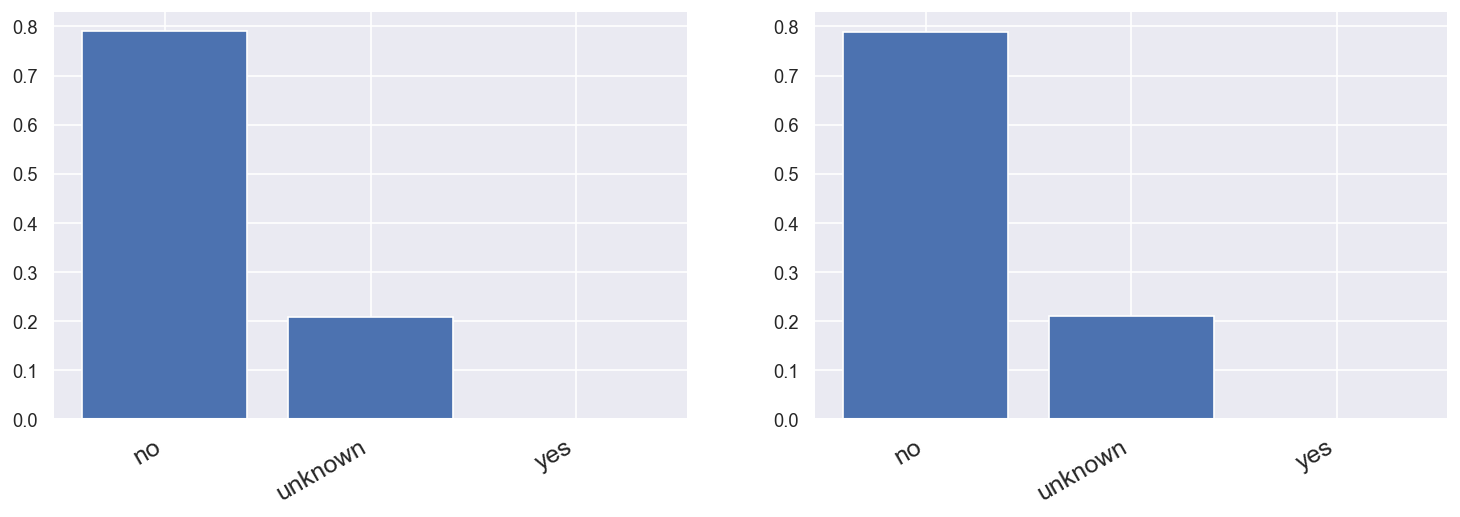

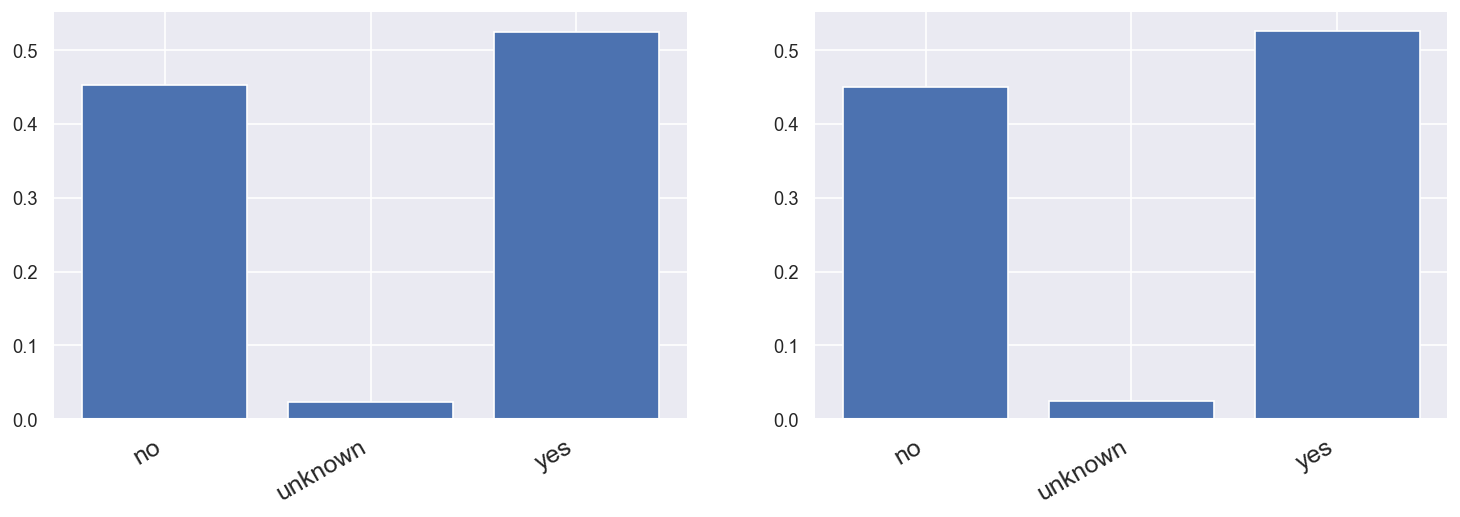

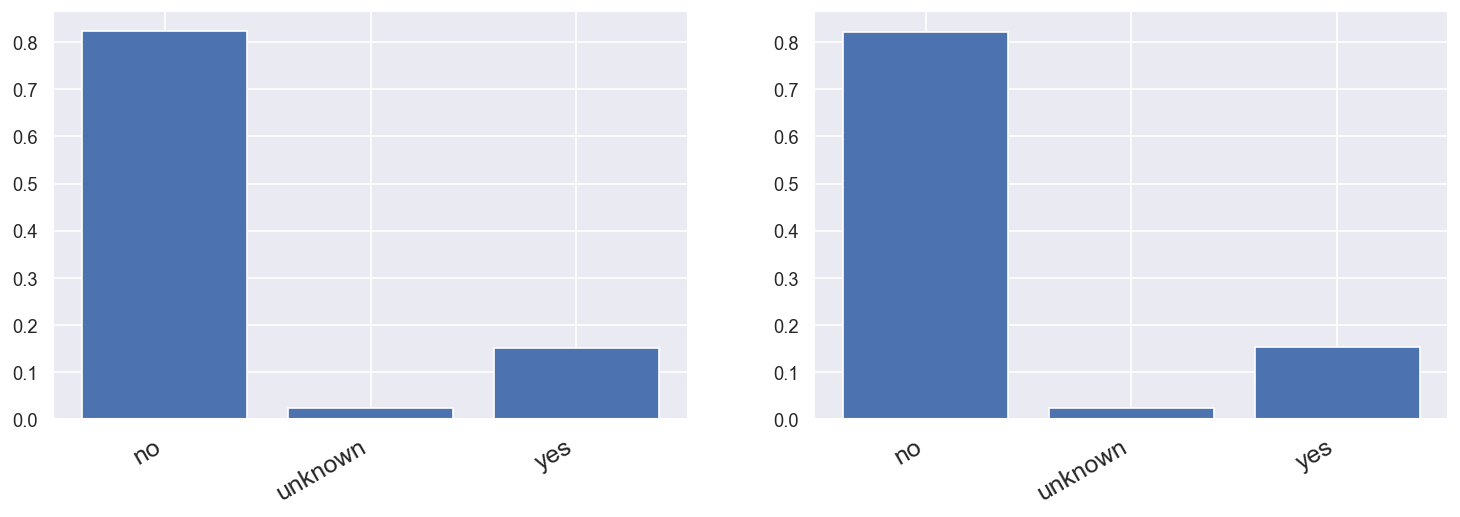

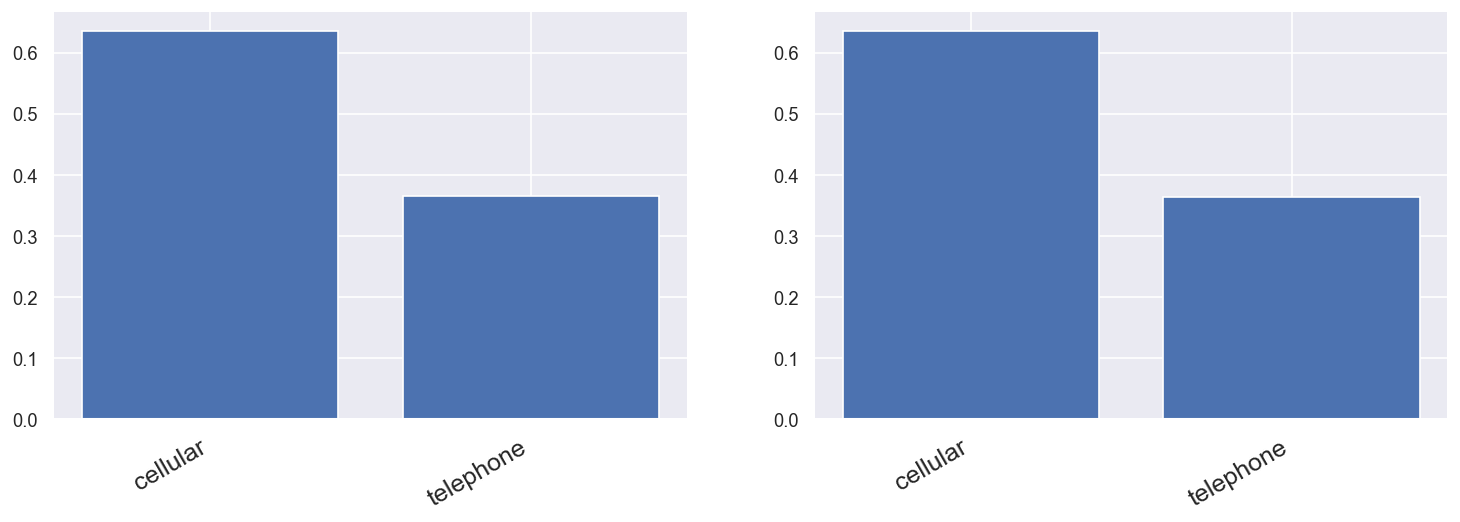

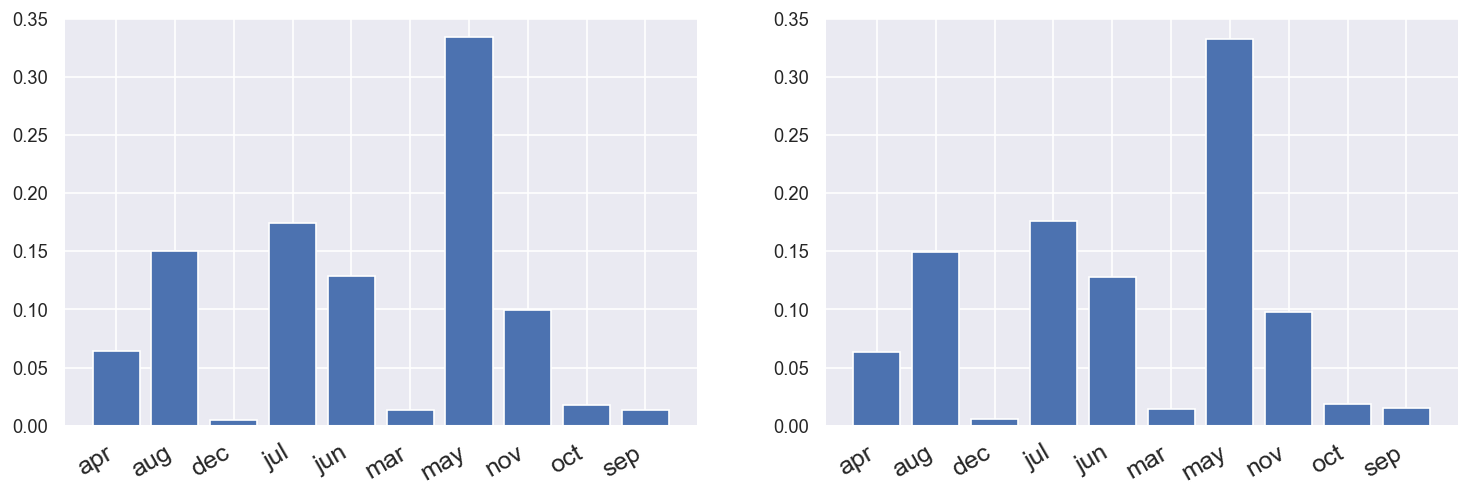

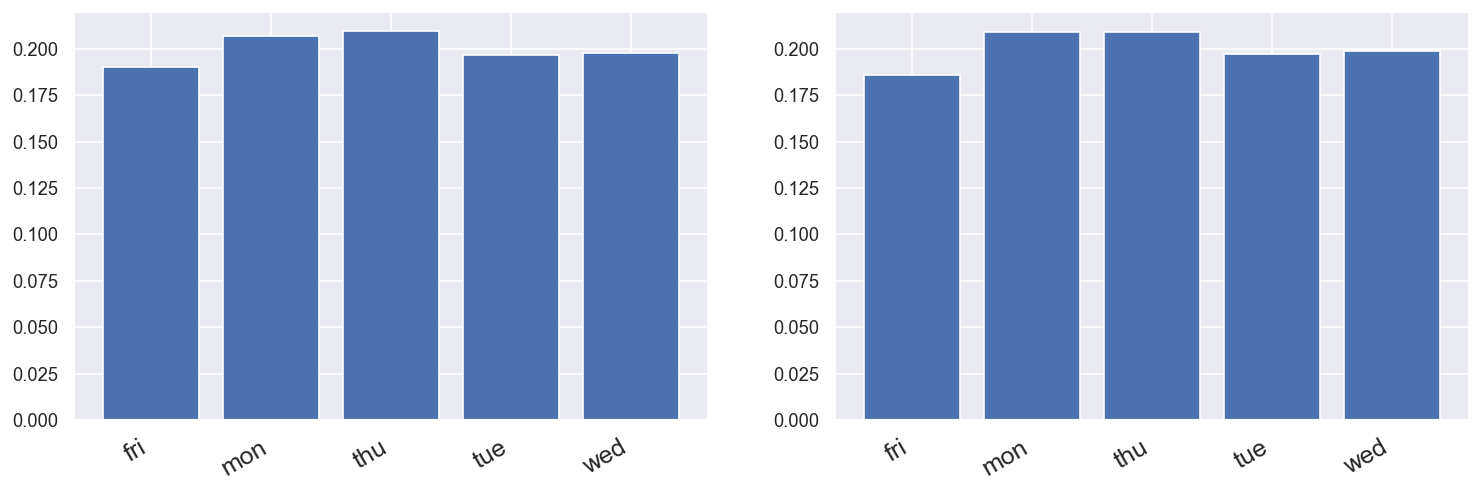

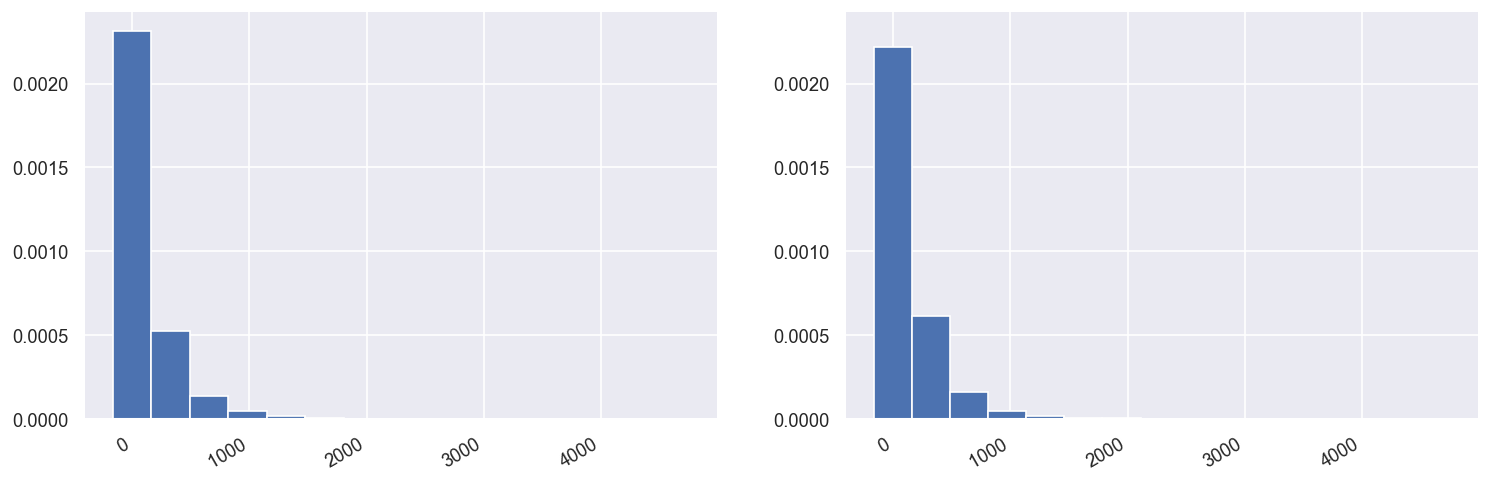

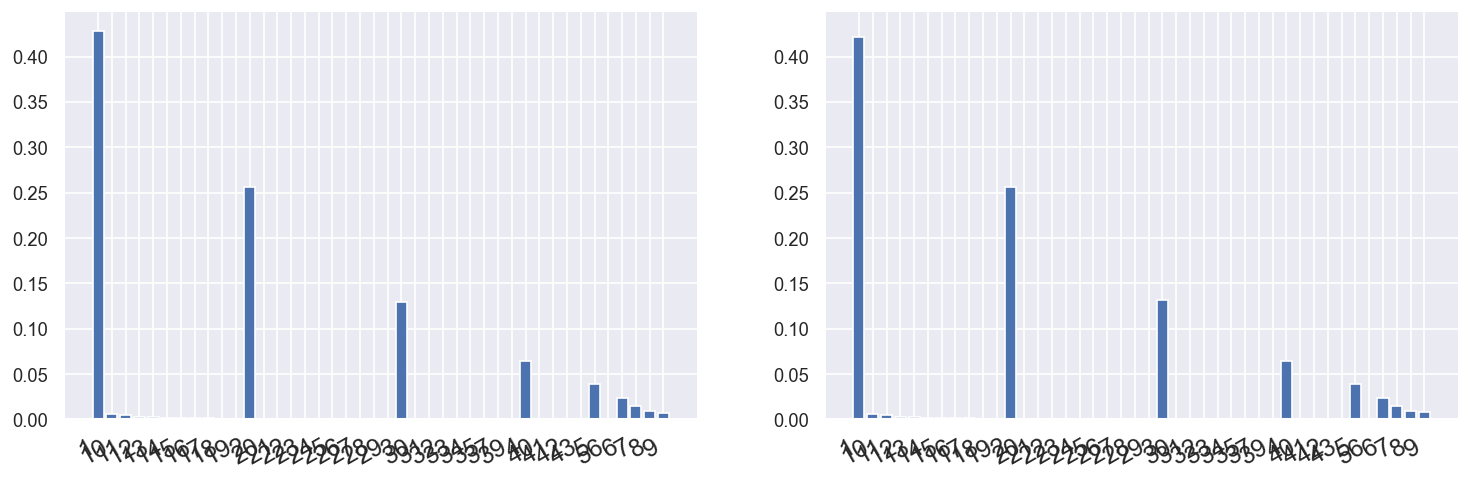

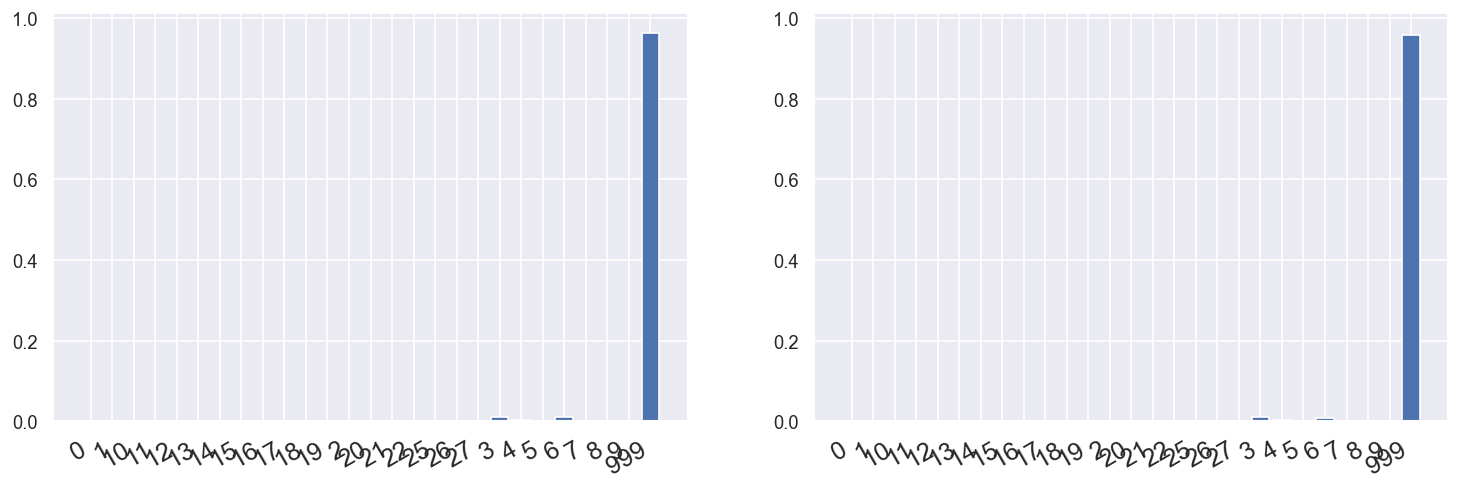

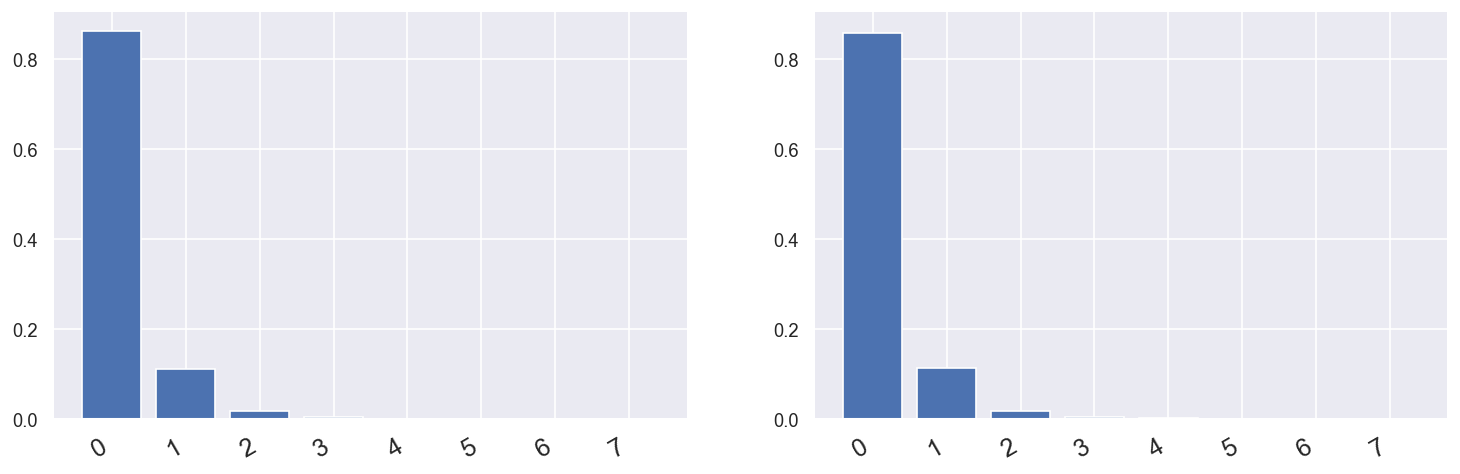

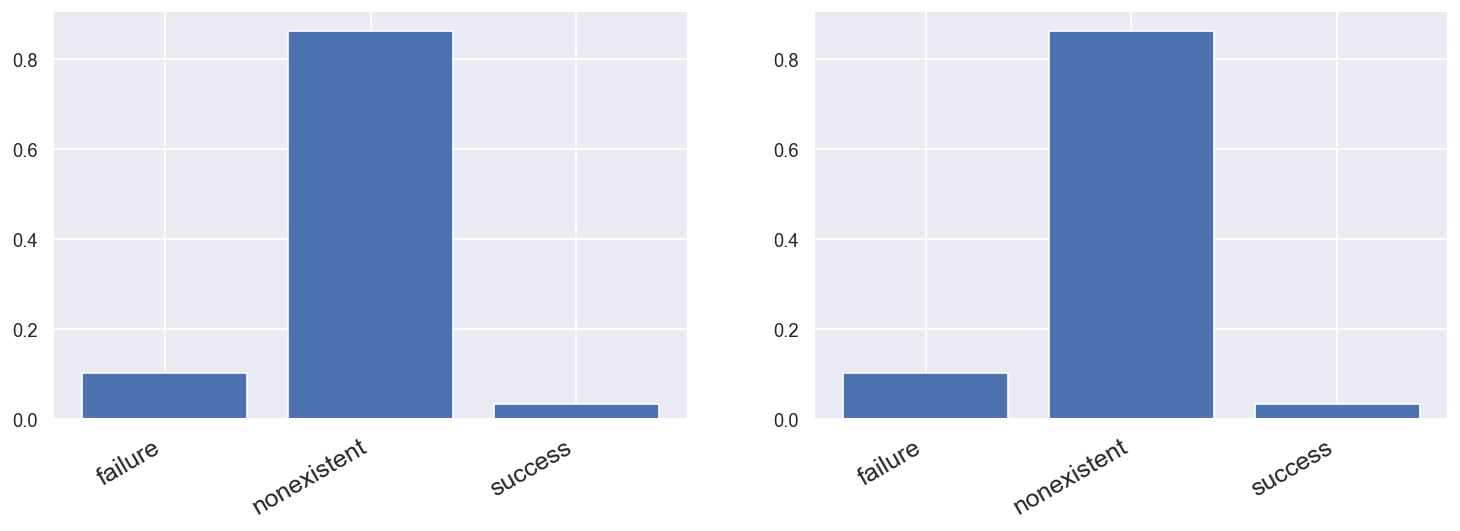

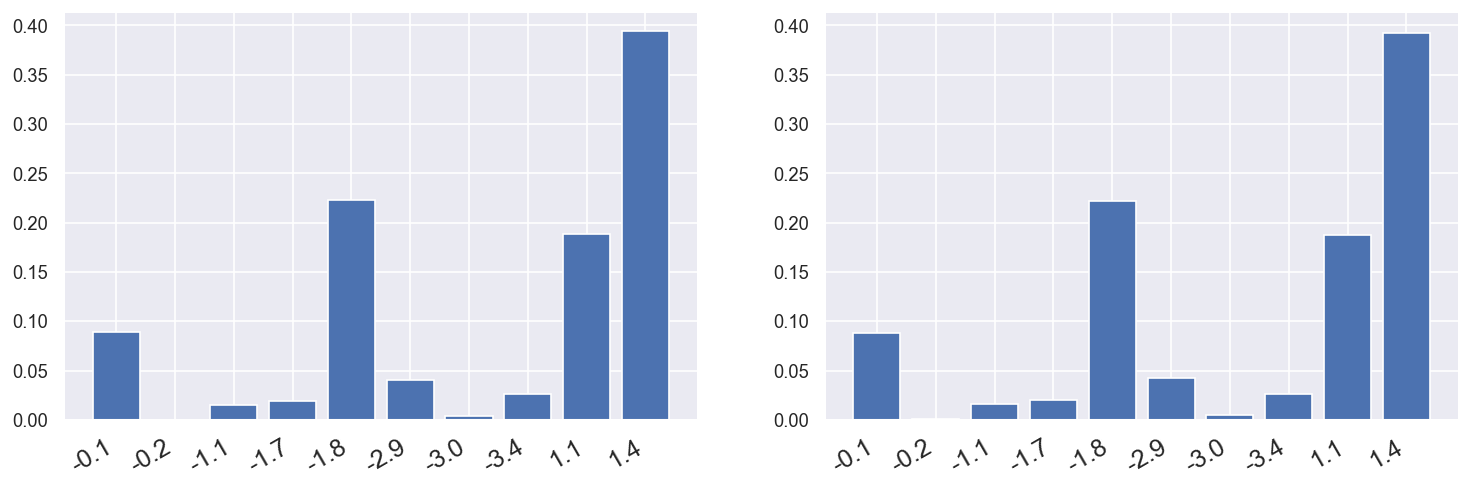

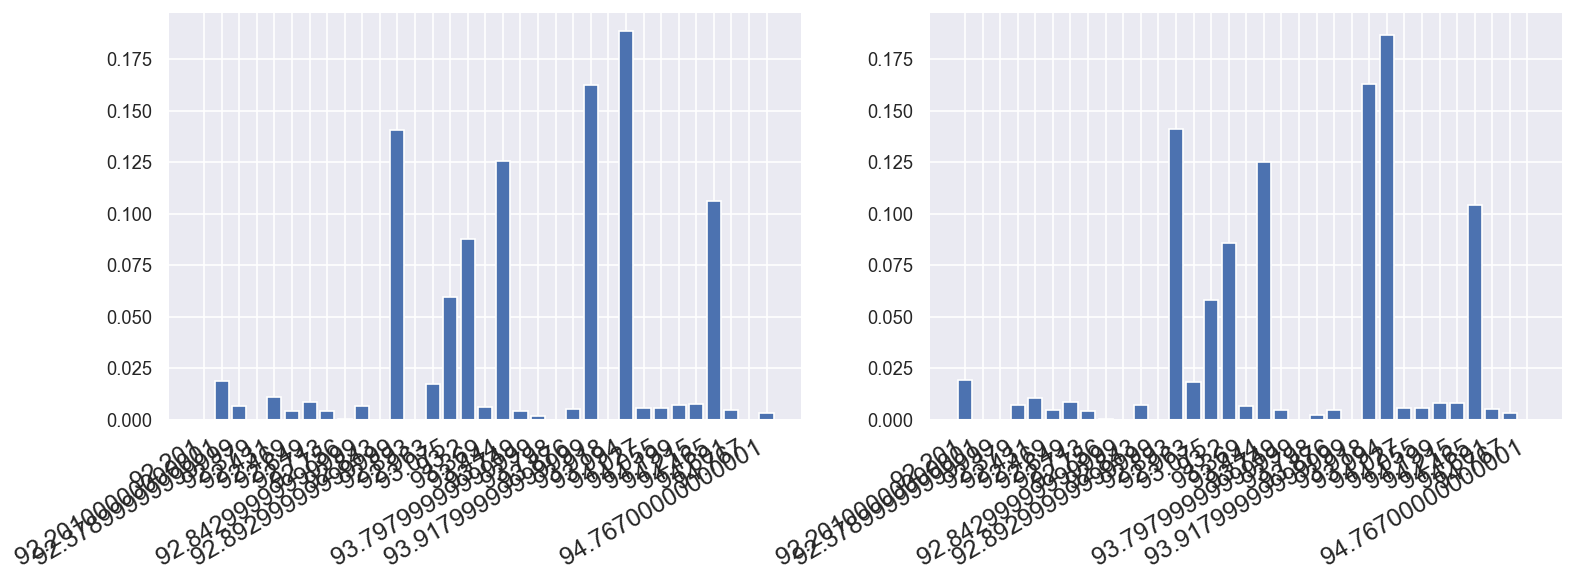

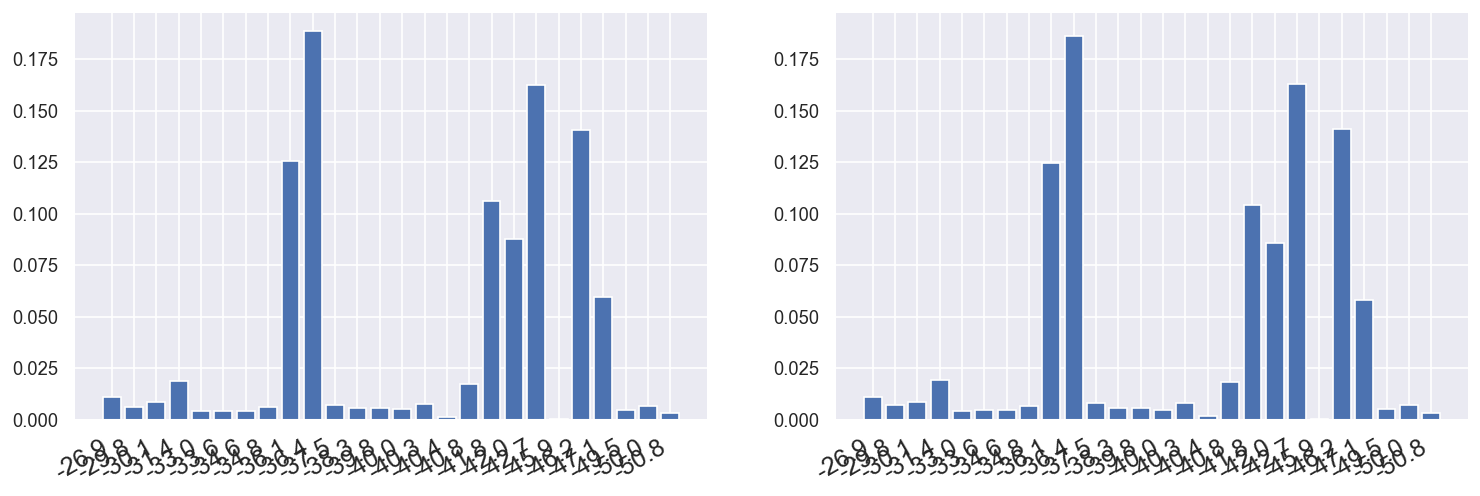

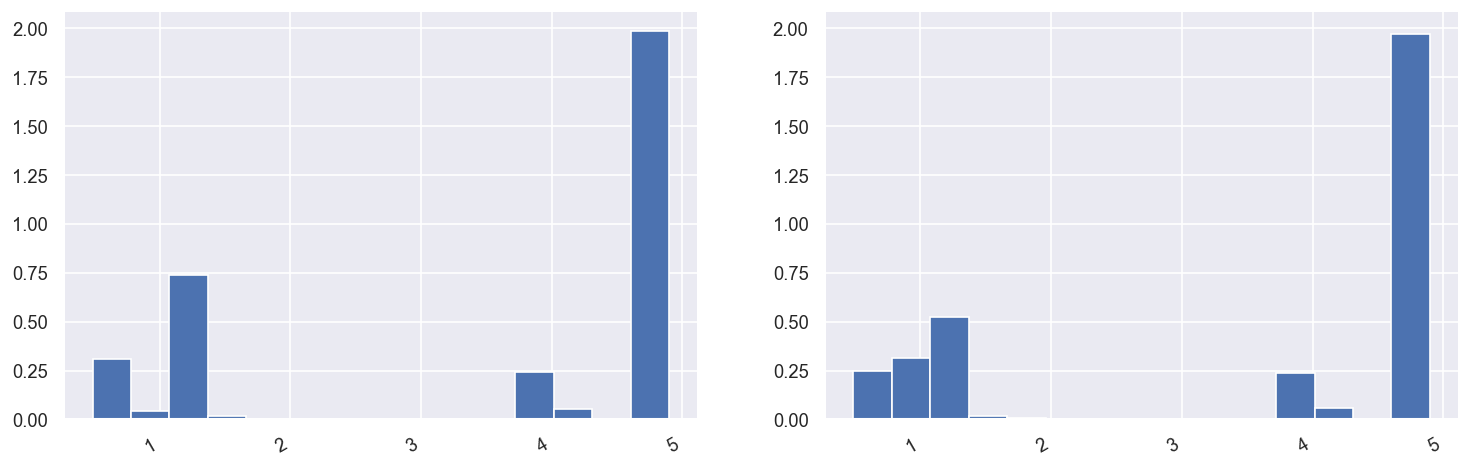

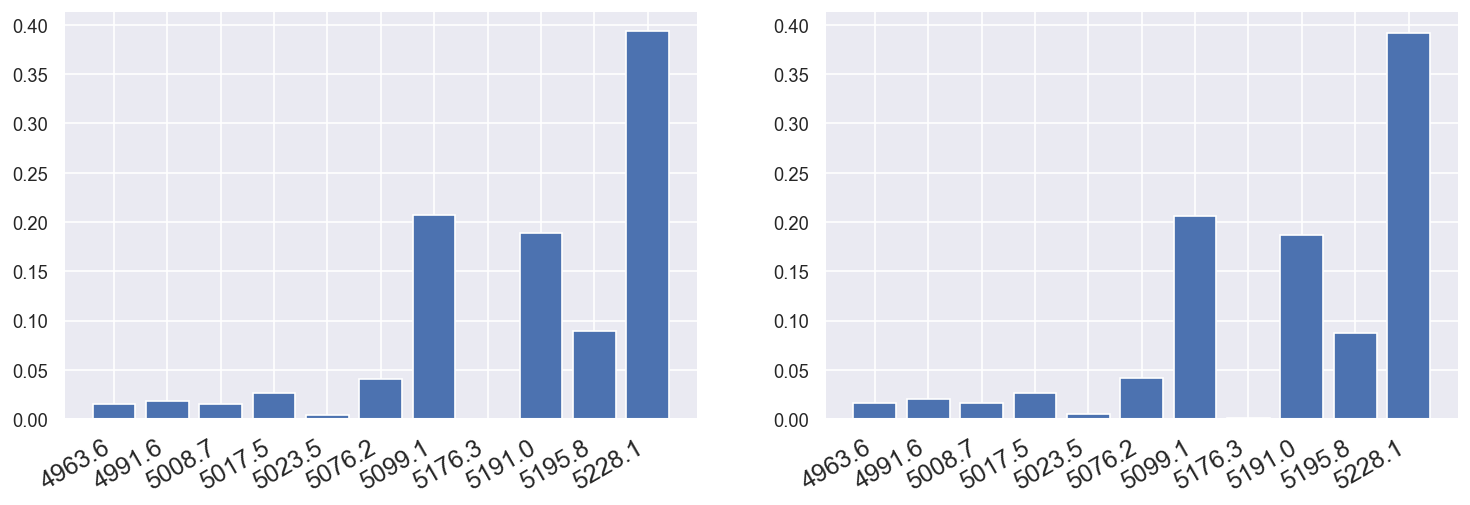

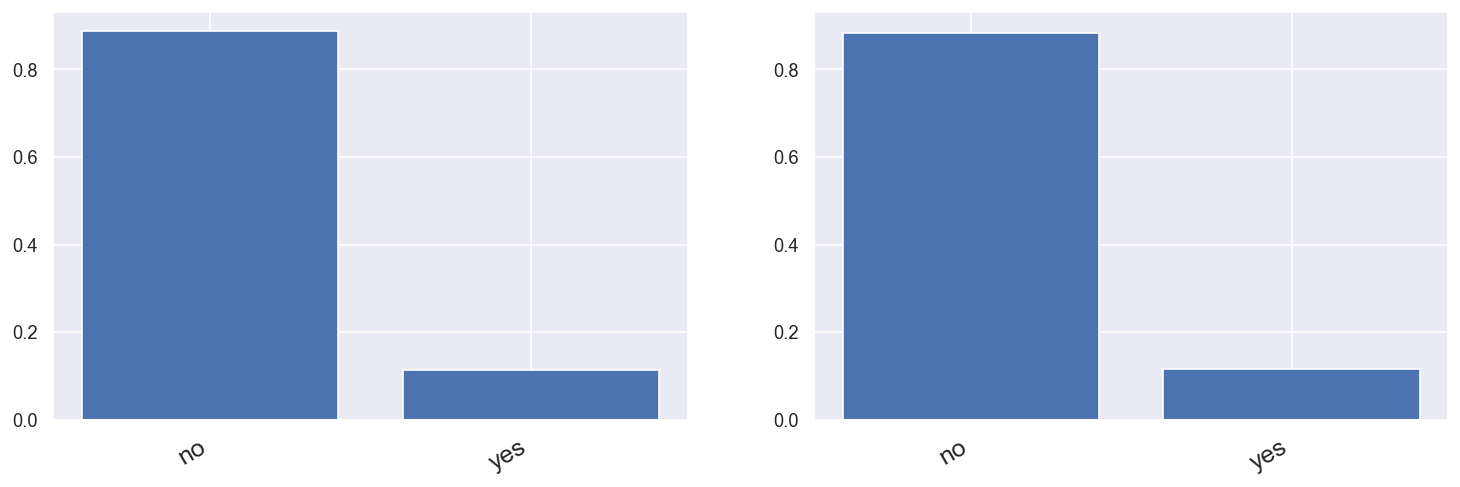

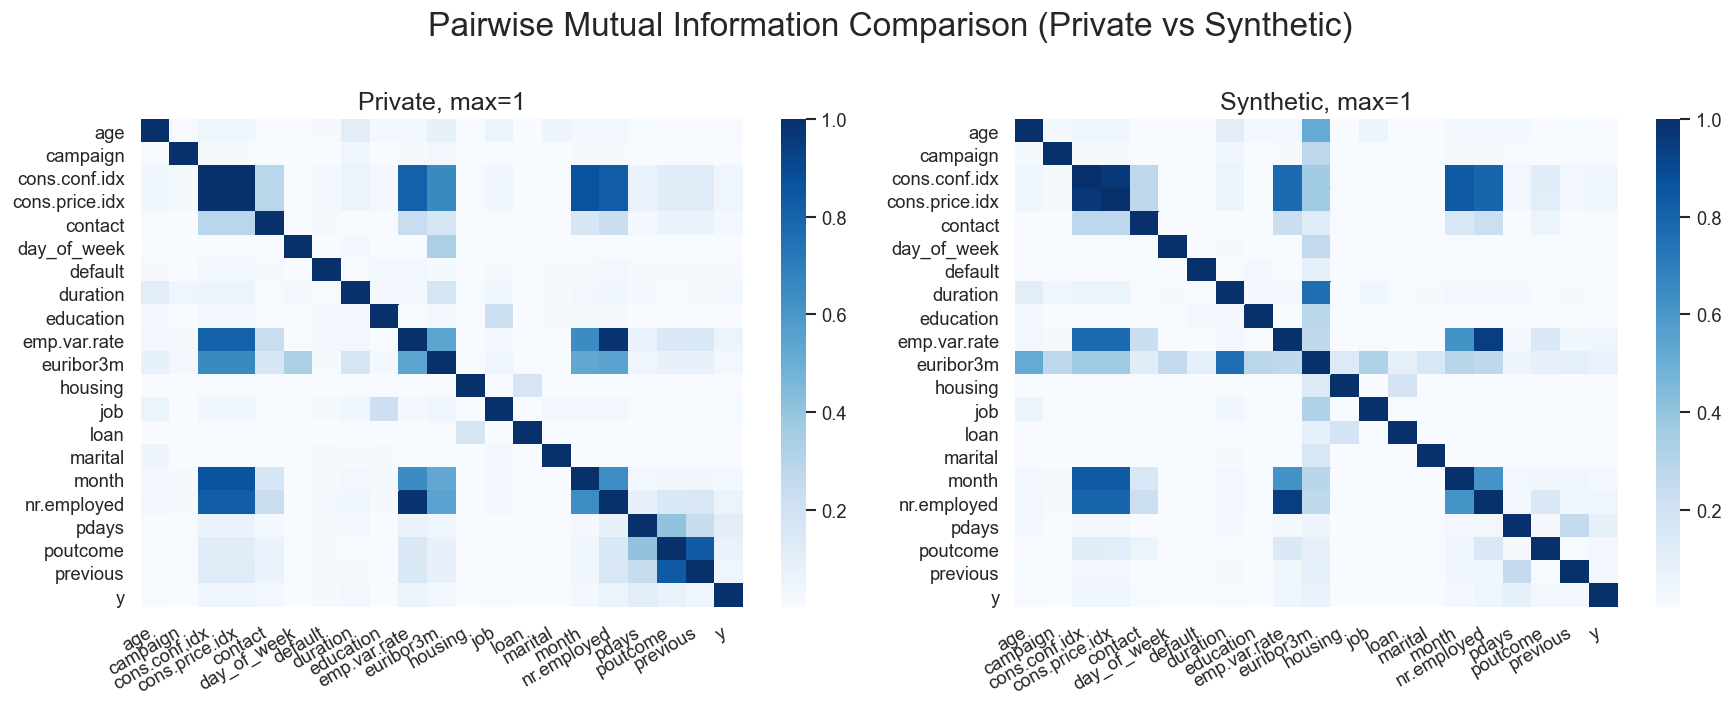

In [95]:
describe(bank, 'bank', 0.1, b_ds01, k=2)
generate('bank', 41188, b_ds01, b_sd01)
visualize(bank, 'bank', b_sd01, b_ds01)

/Users/eunbeejang/miniconda3/envs/py38/lib/python3.8/site-packages/DataSynthesizer/ModelInspector.py:75: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(15, 5), dpi=120)


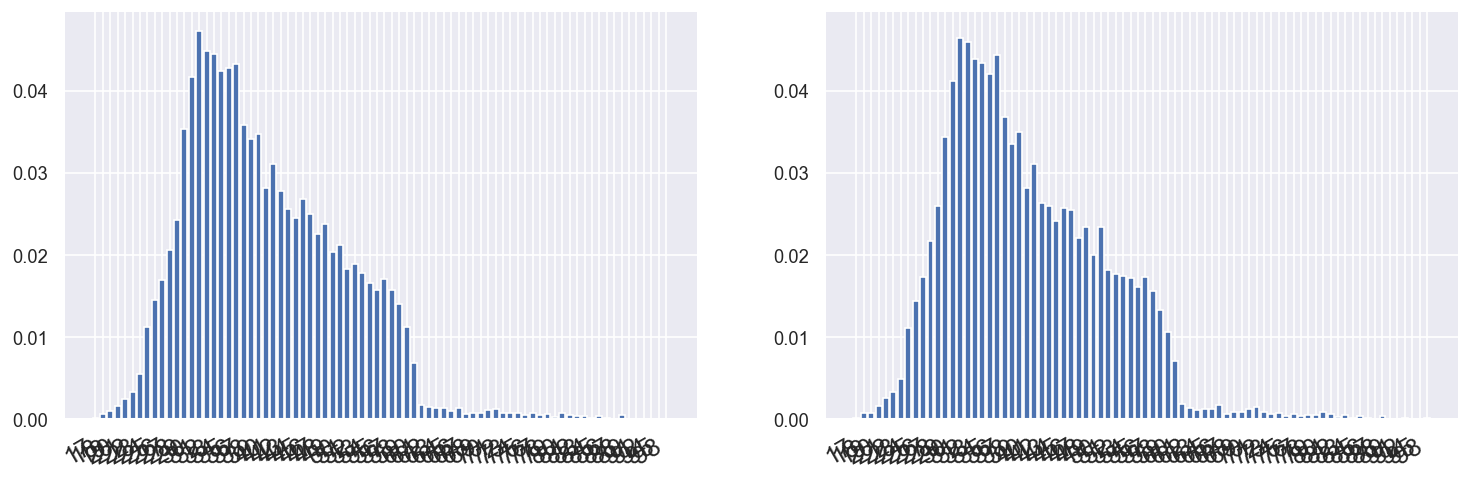

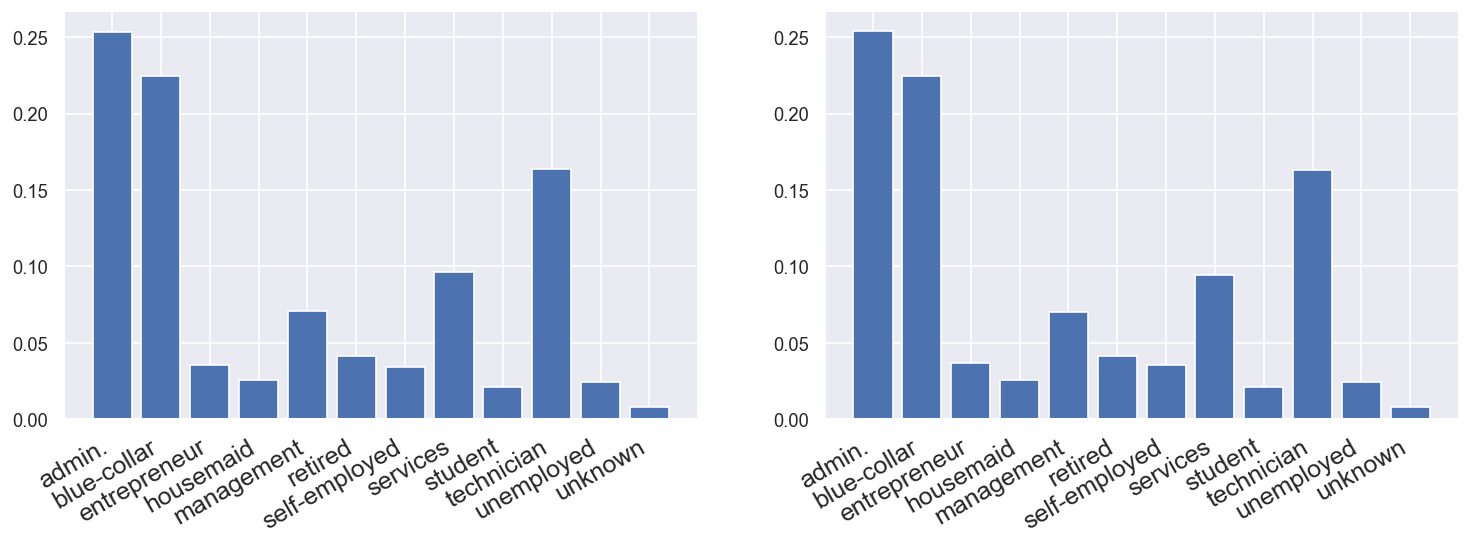

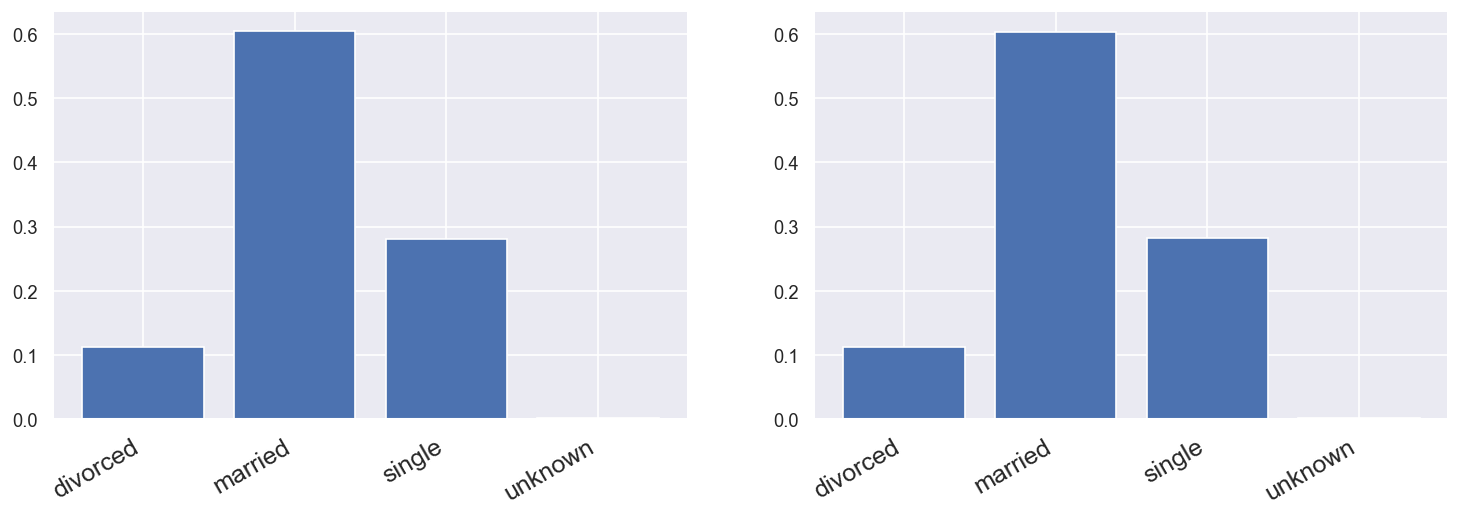

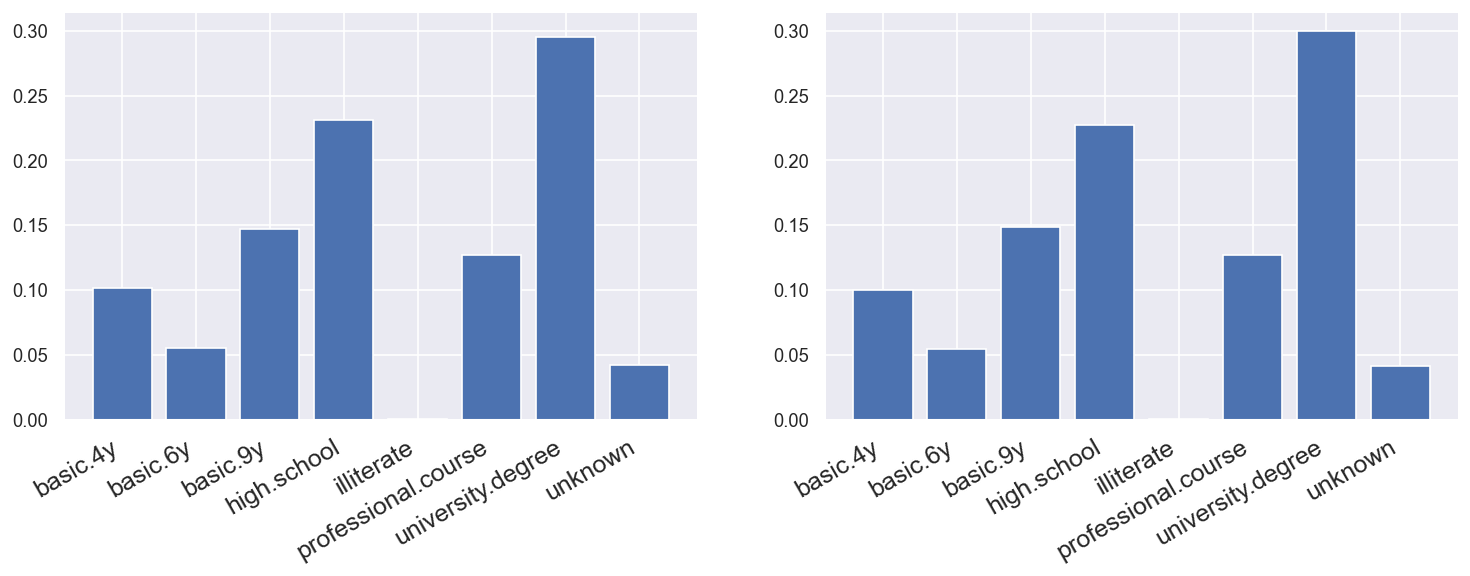

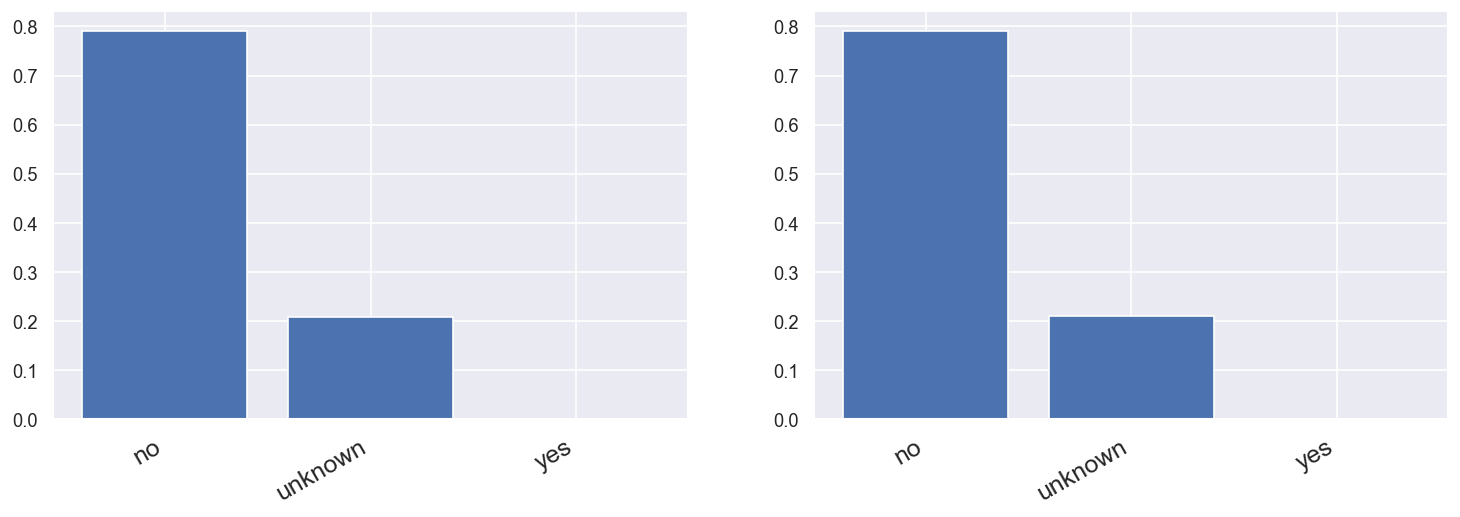

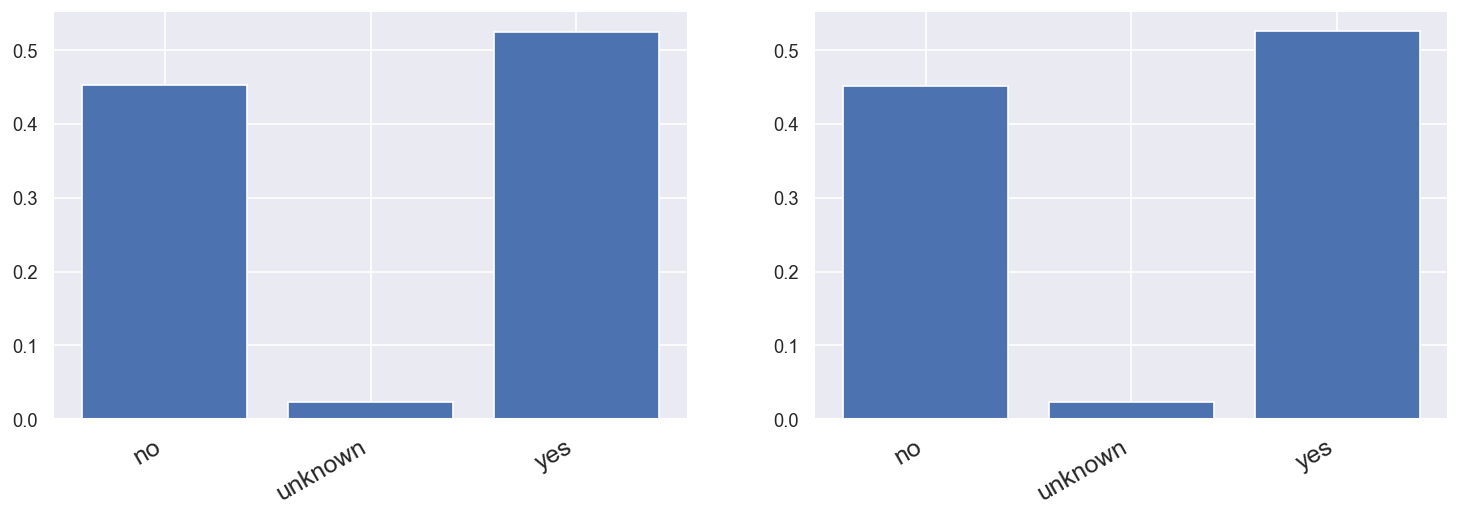

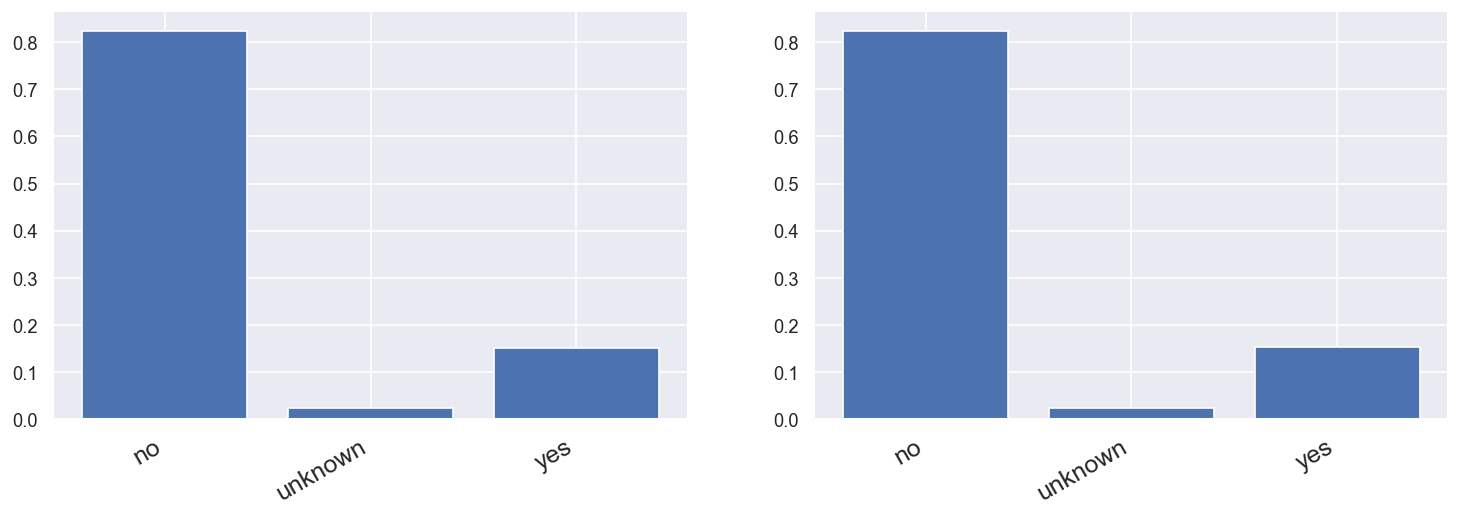

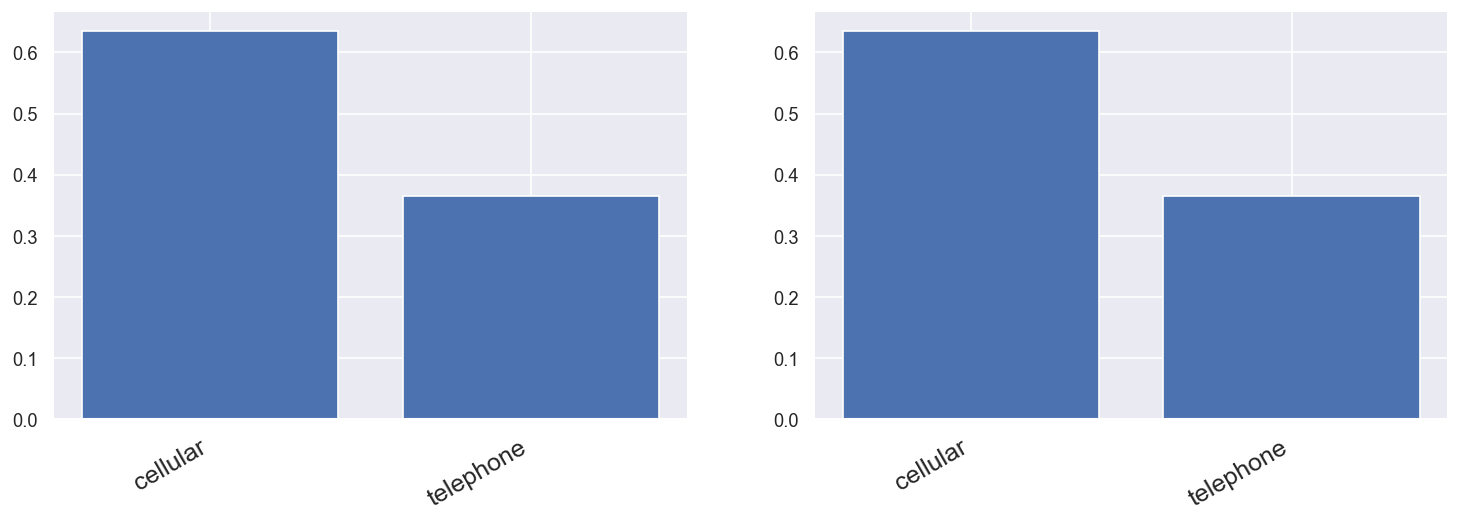

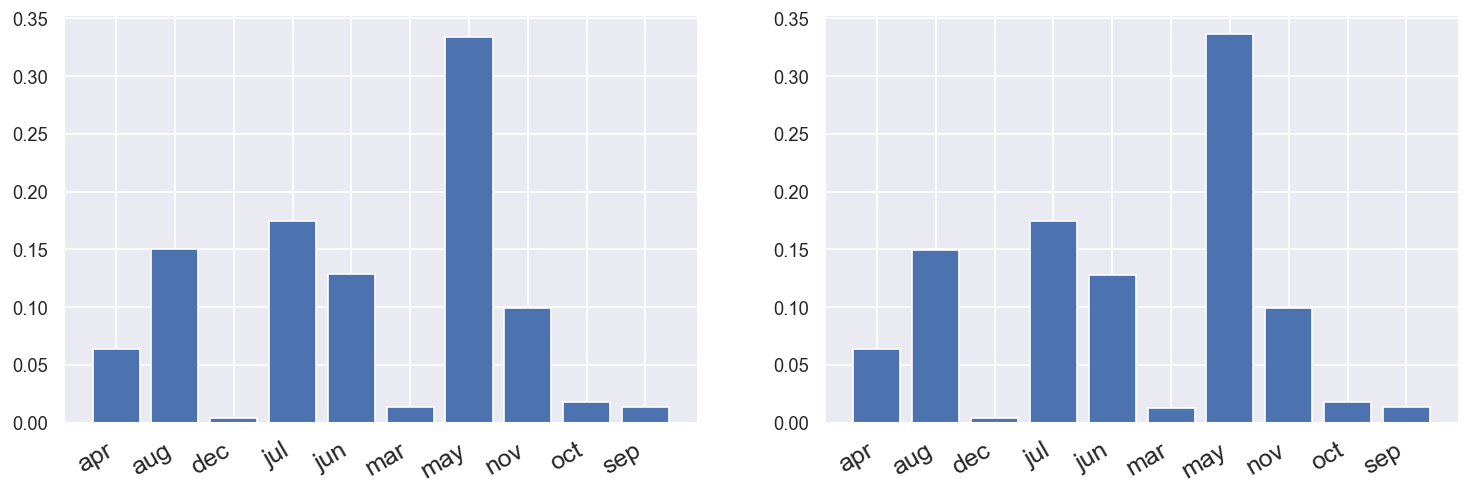

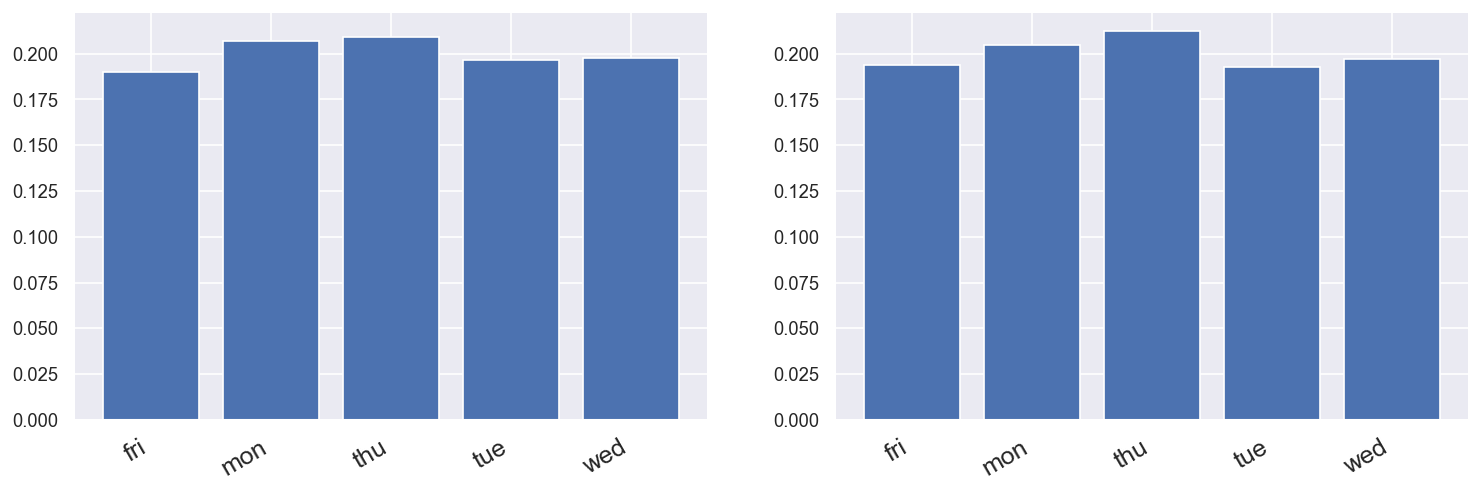

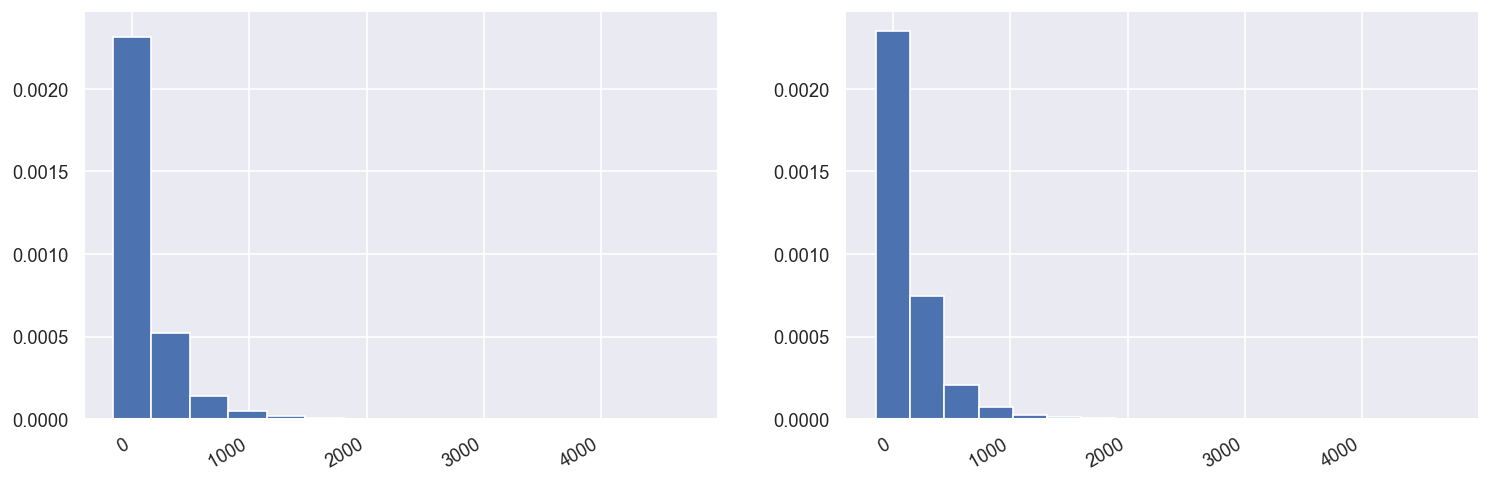

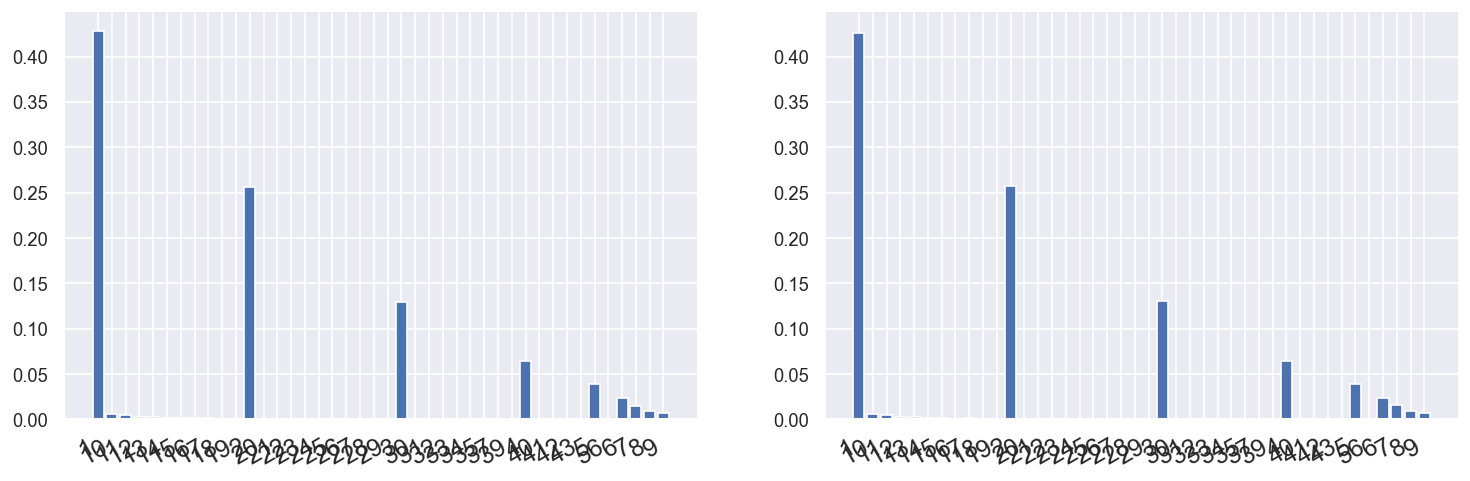

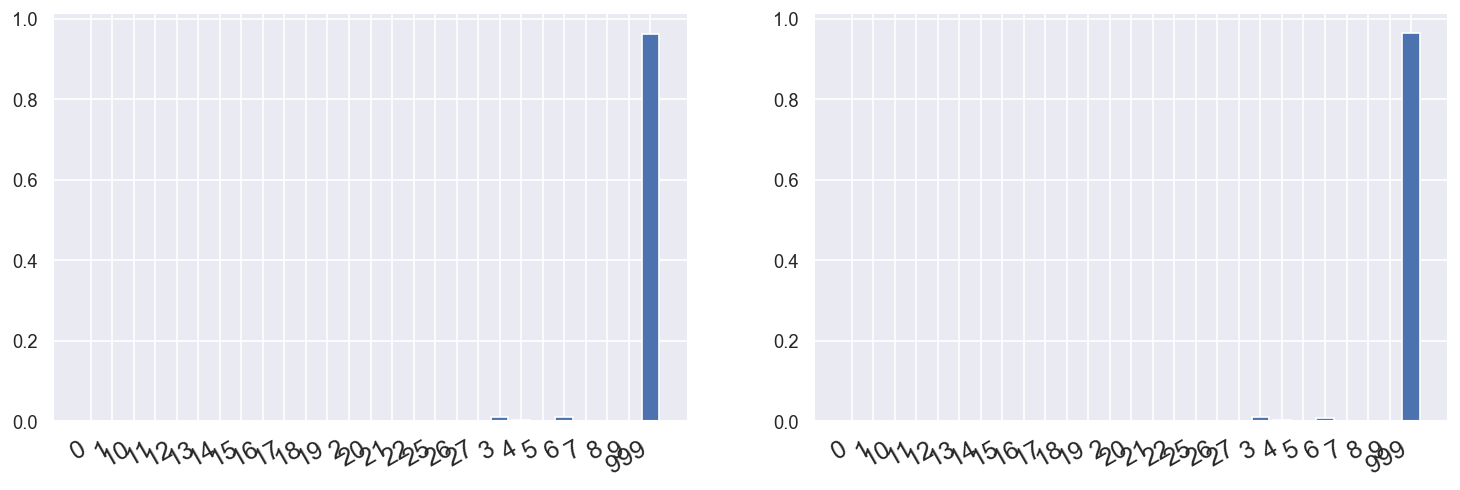

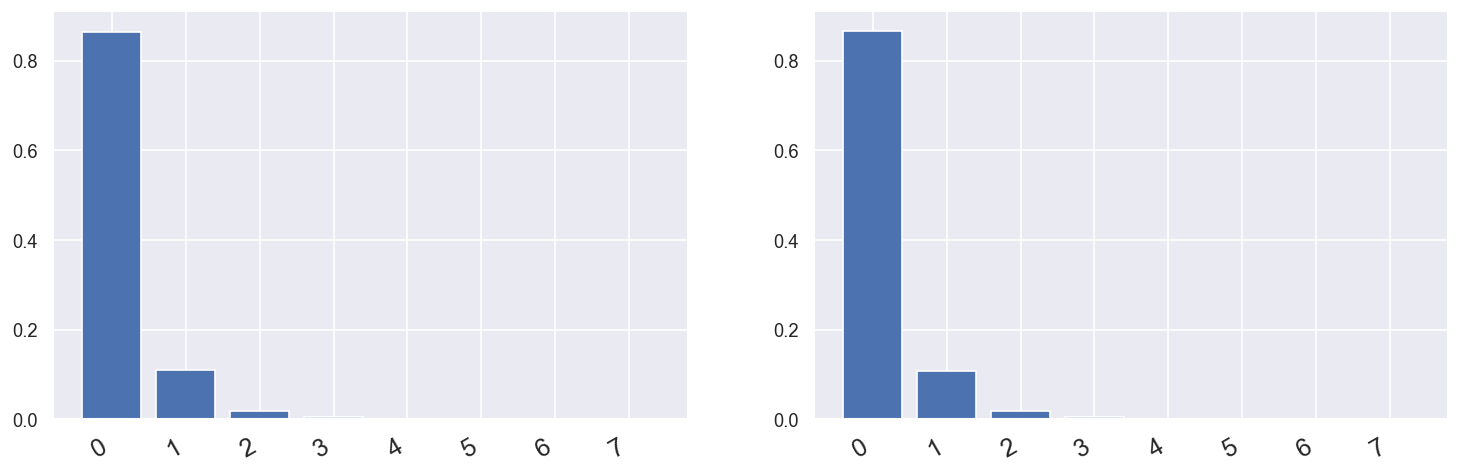

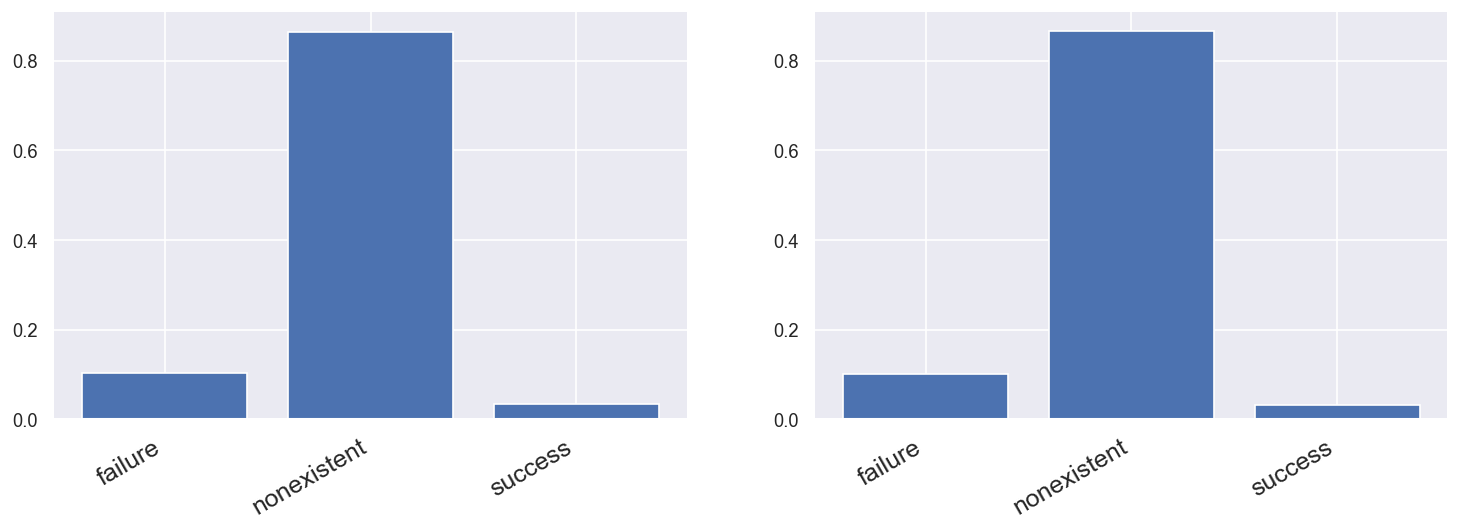

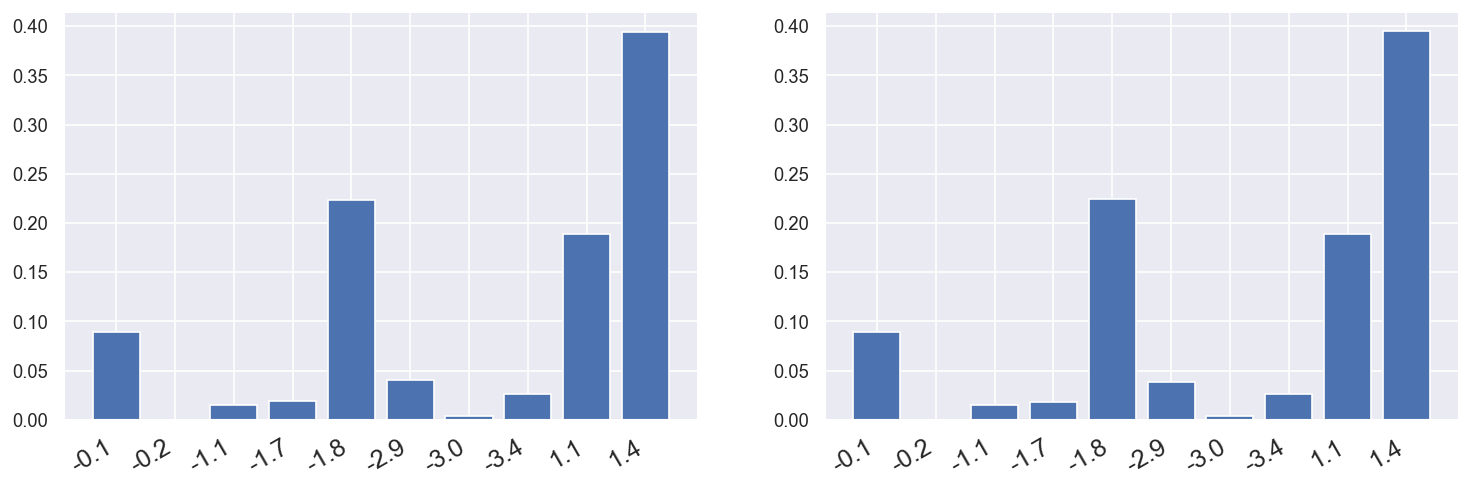

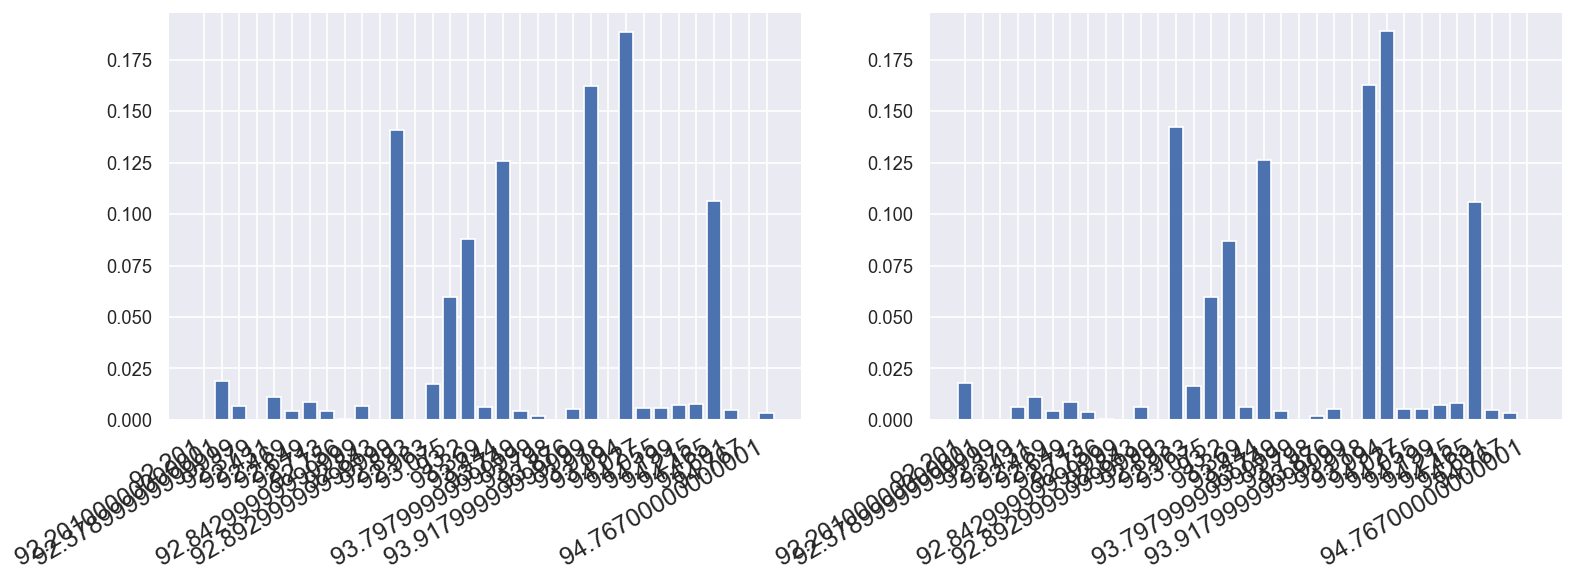

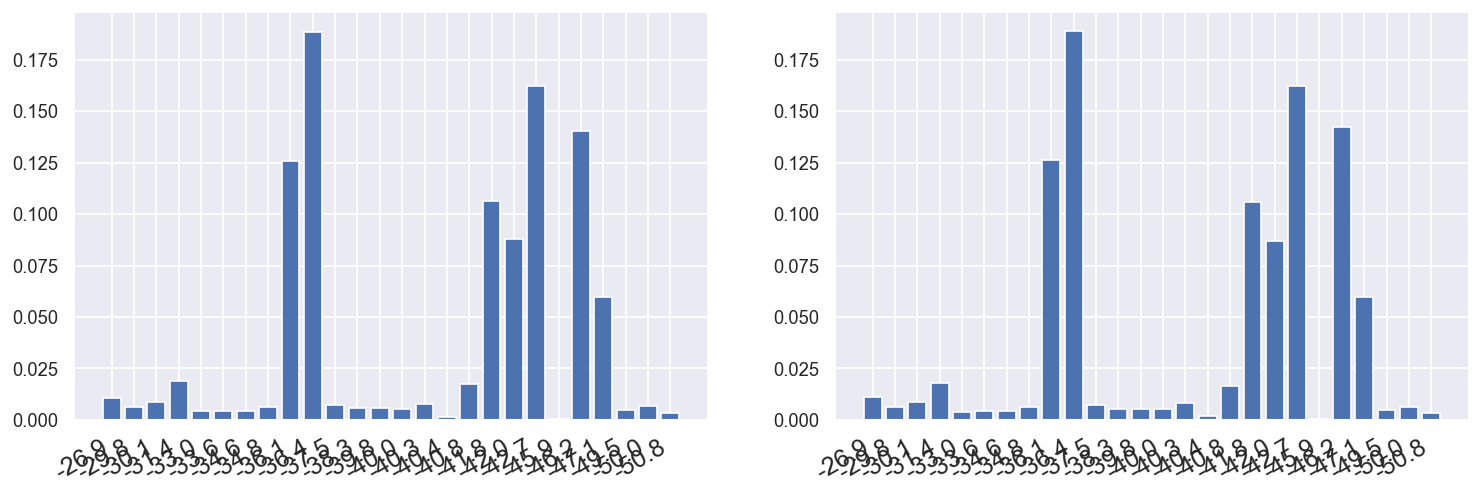

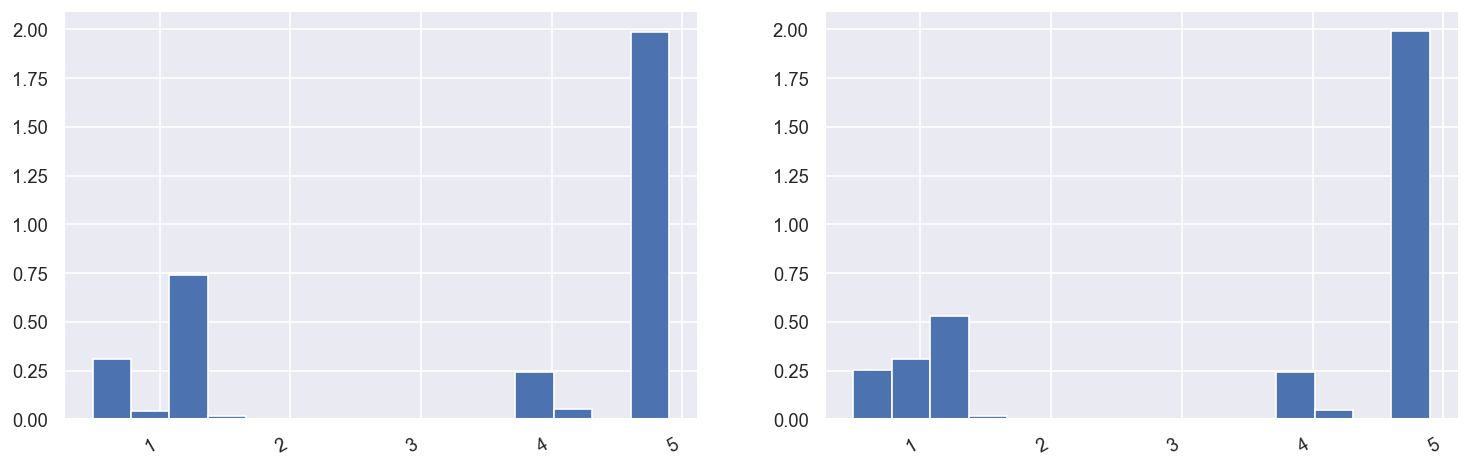

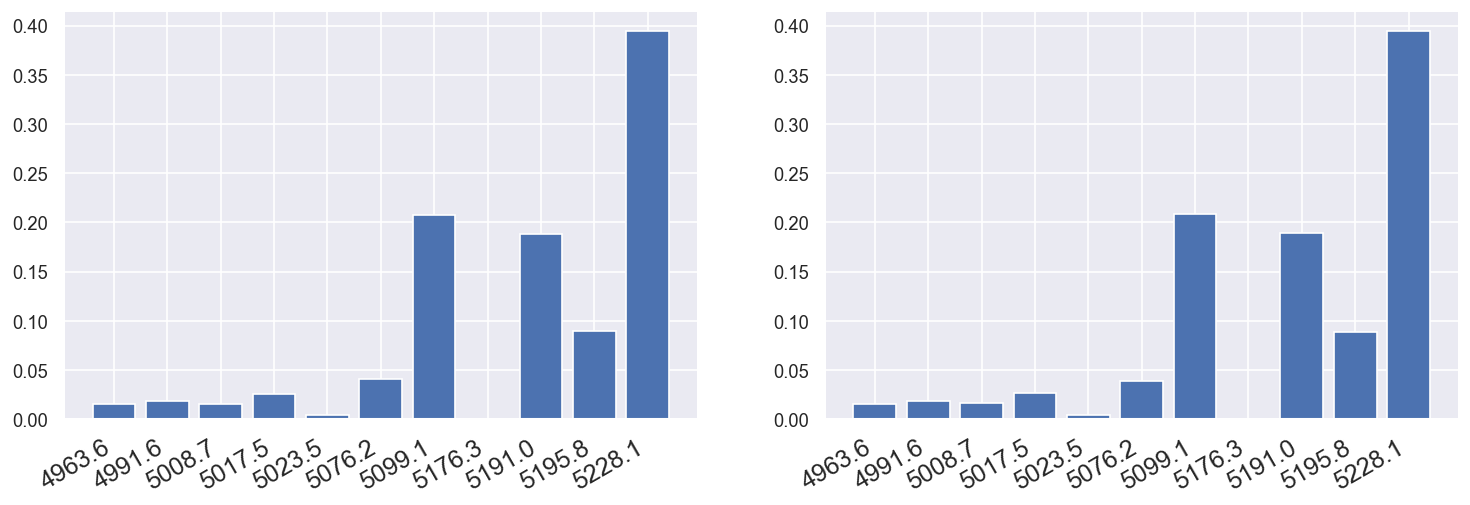

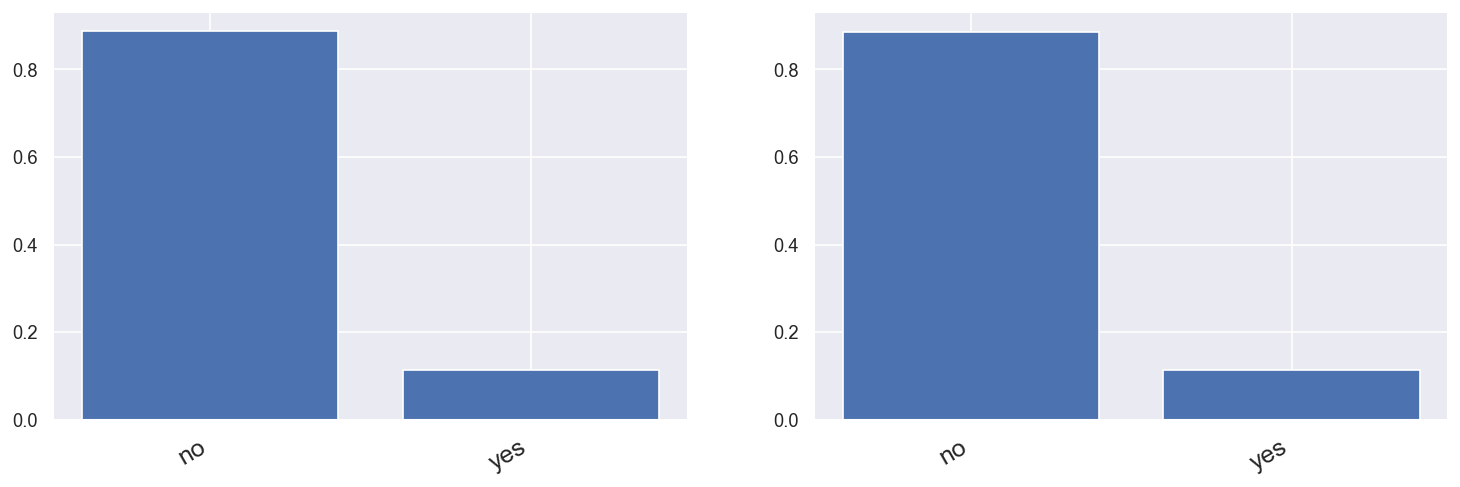

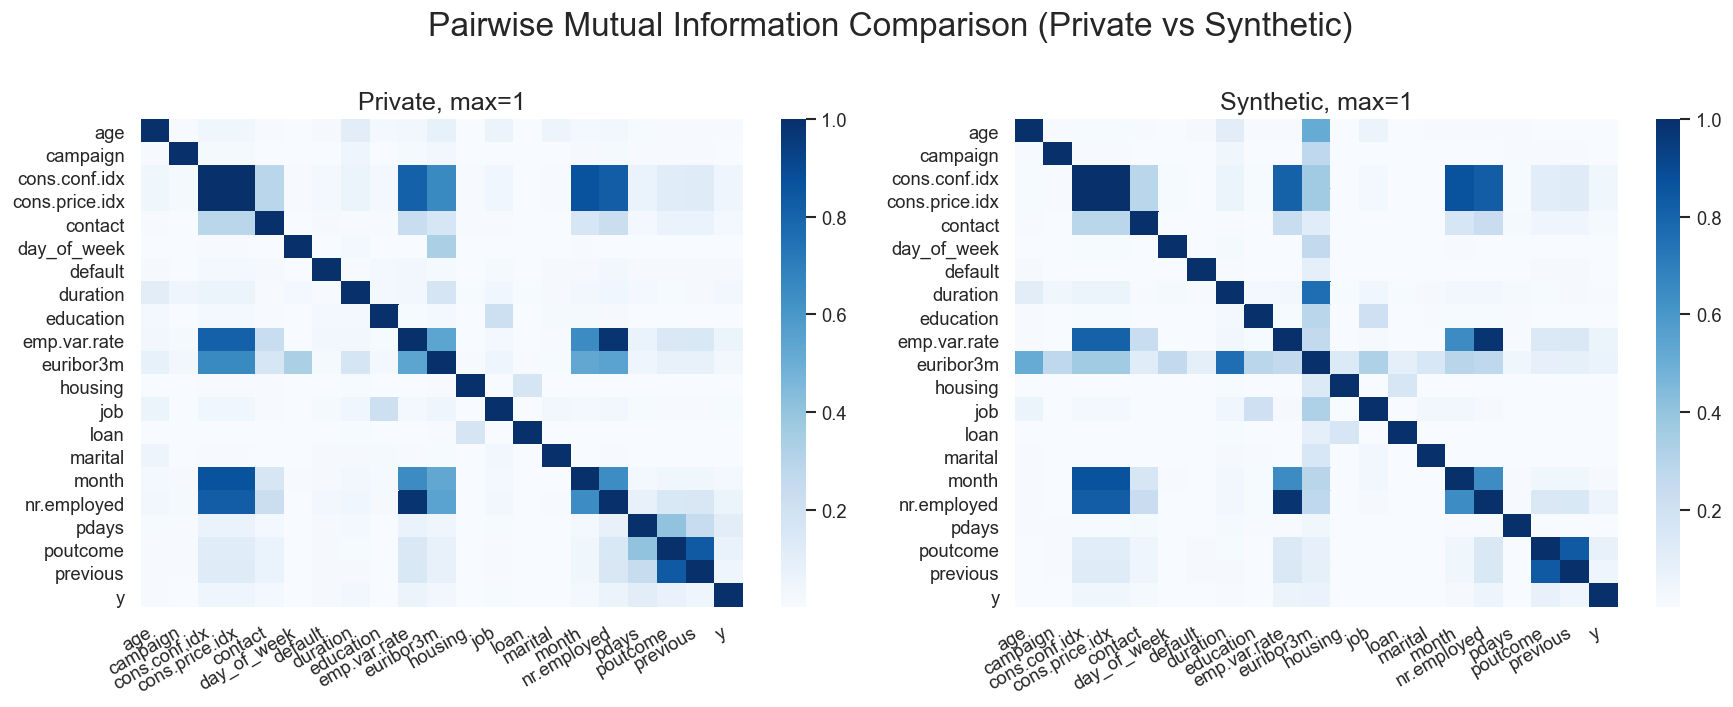

In [27]:
#describe(bank, 'bank', 0.5, b_ds05, k=2)
#generate('bank', 41188, b_ds05, b_sd05)
visualize(bank, 'bank', b_sd05, b_ds05)

/Users/eunbeejang/miniconda3/envs/py38/lib/python3.8/site-packages/DataSynthesizer/ModelInspector.py:75: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(15, 5), dpi=120)


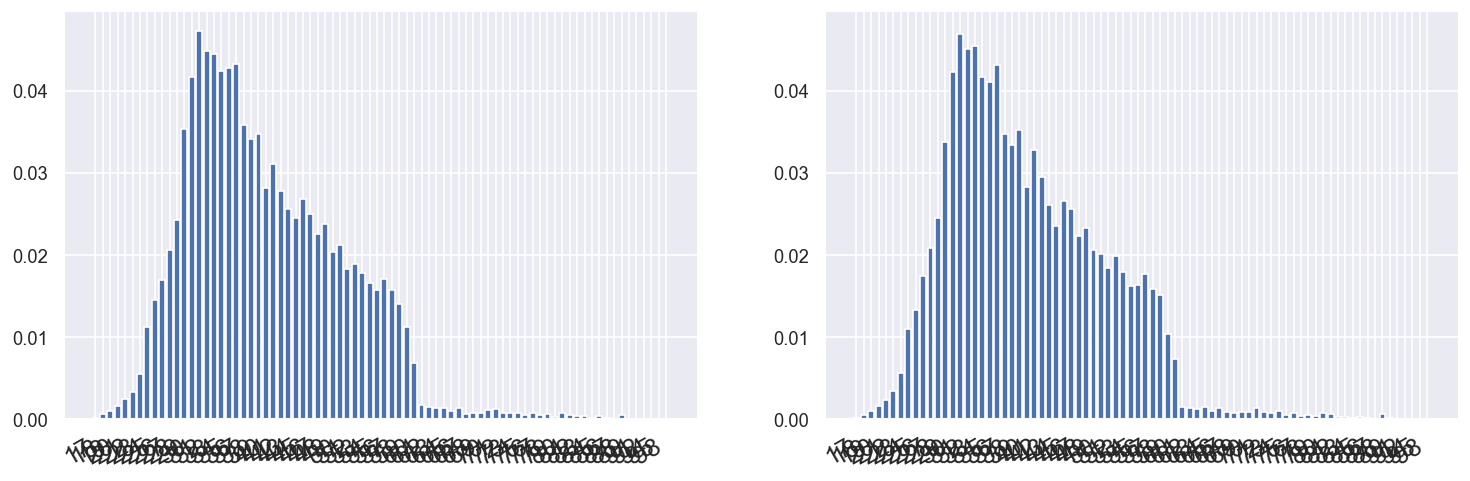

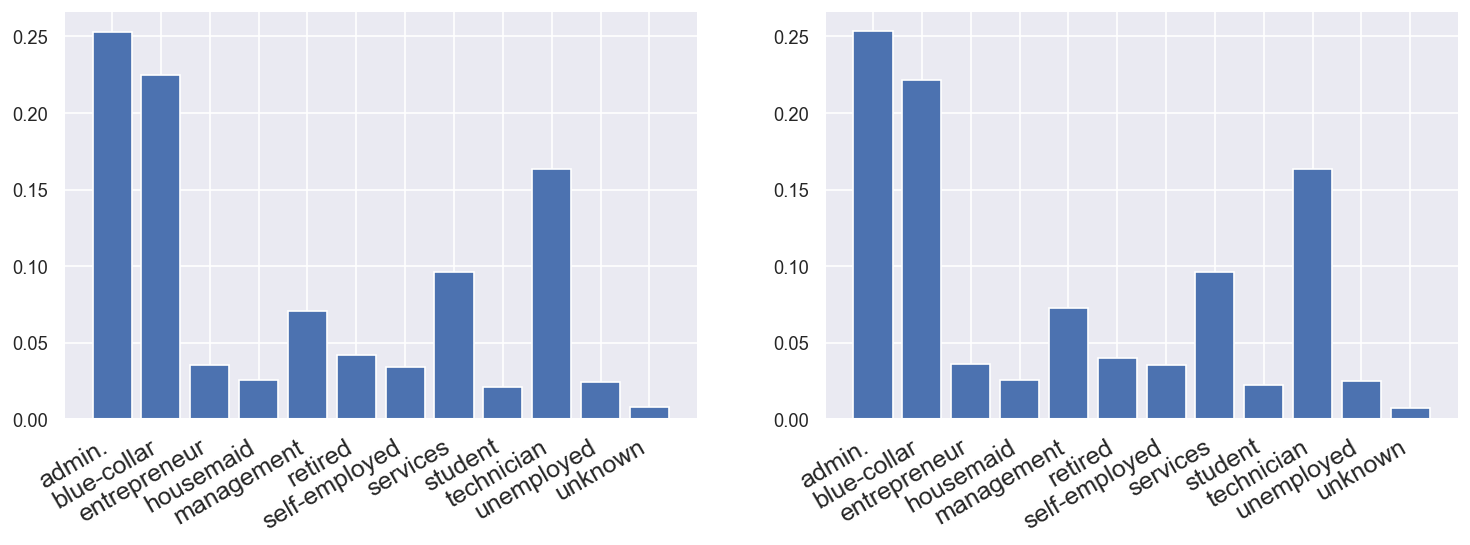

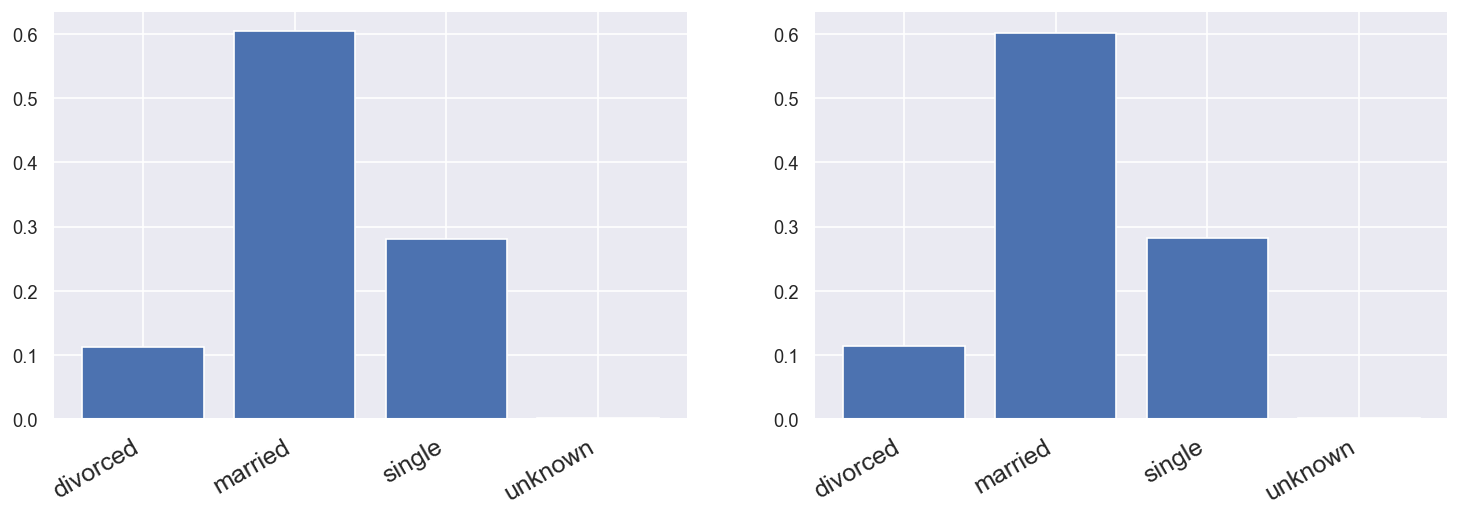

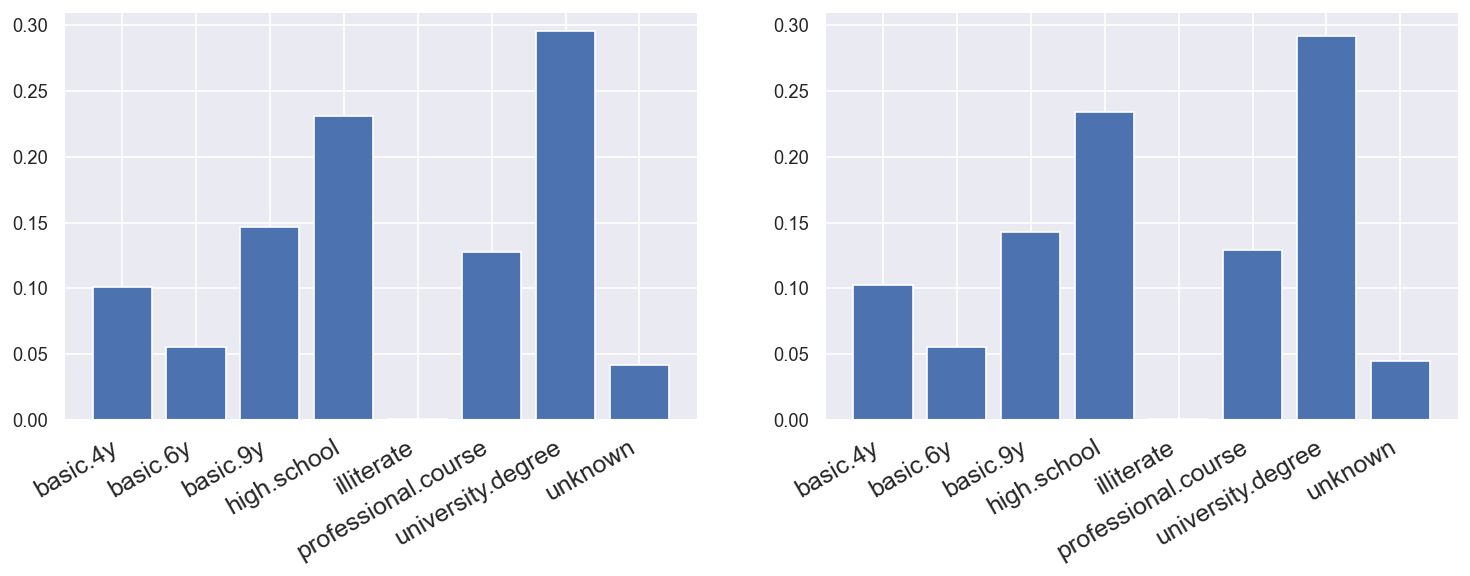

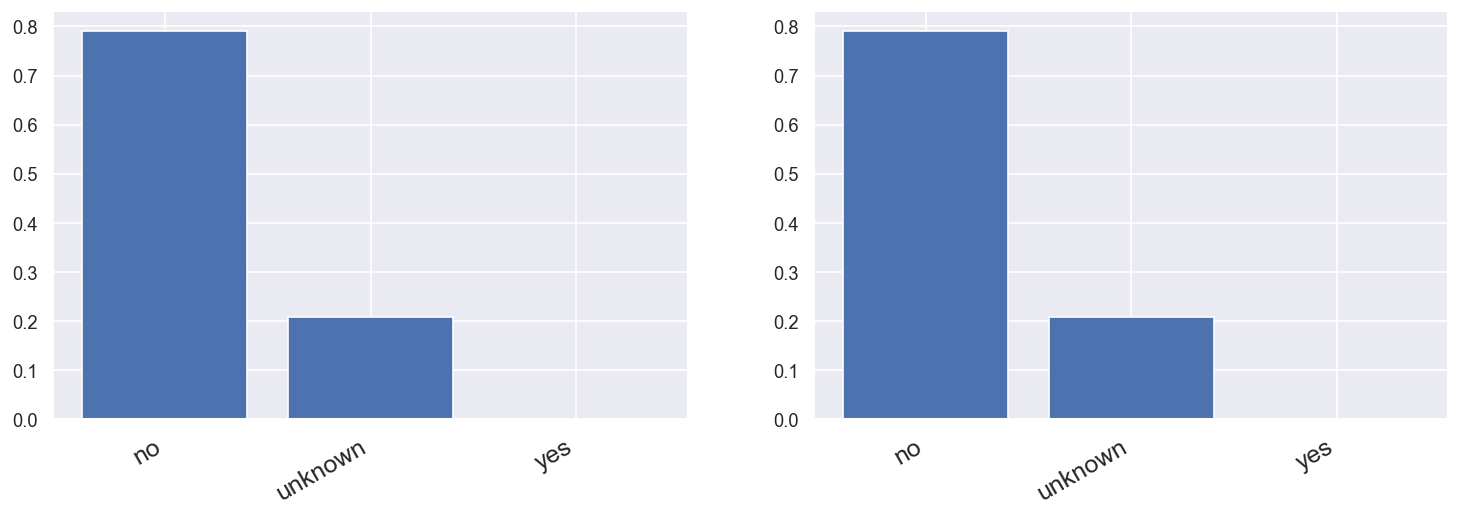

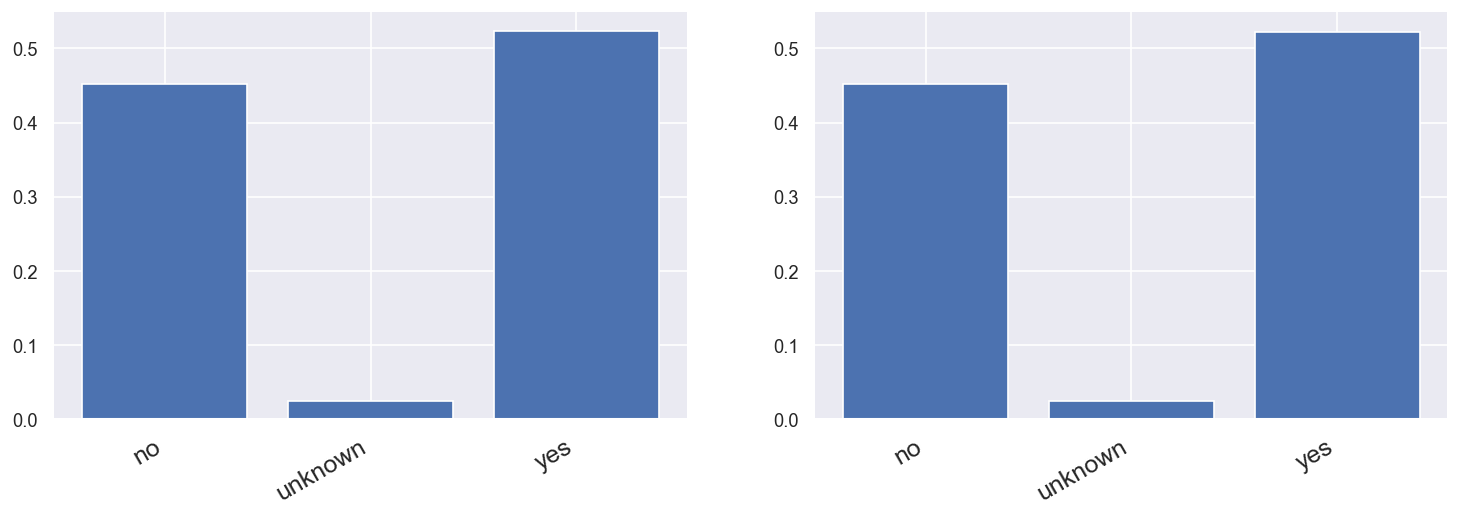

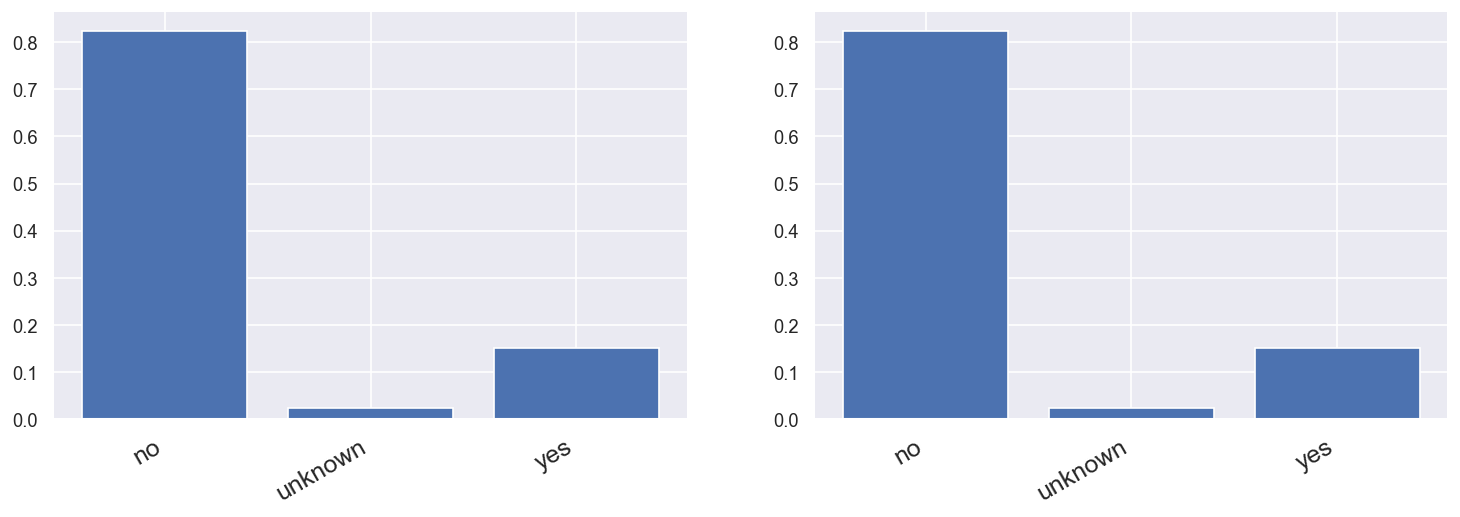

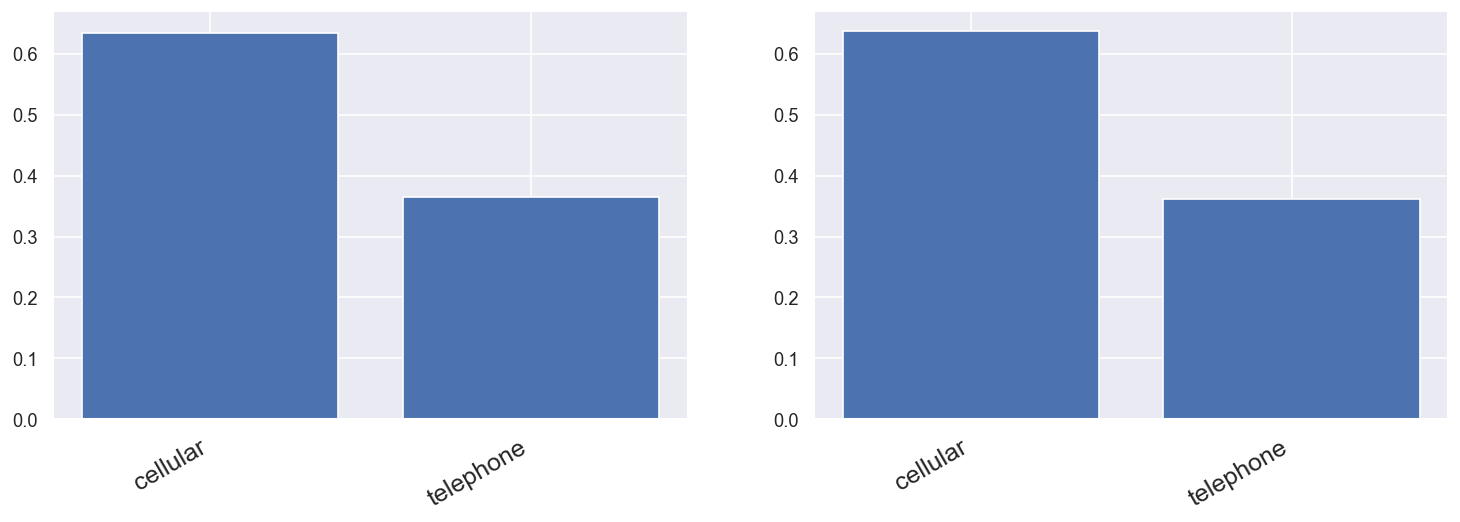

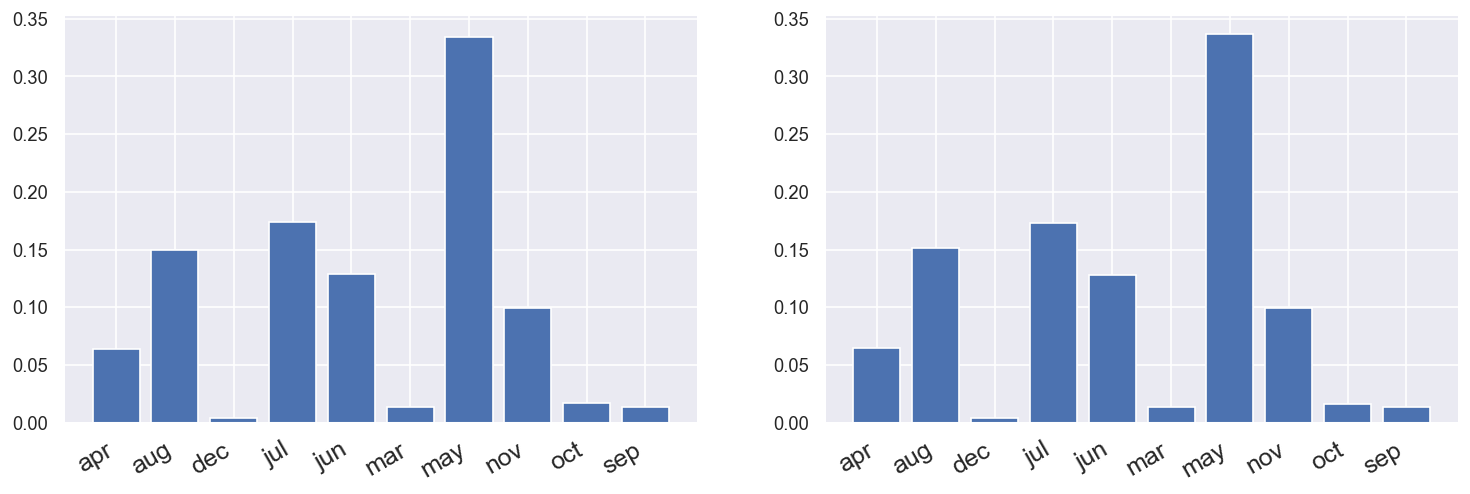

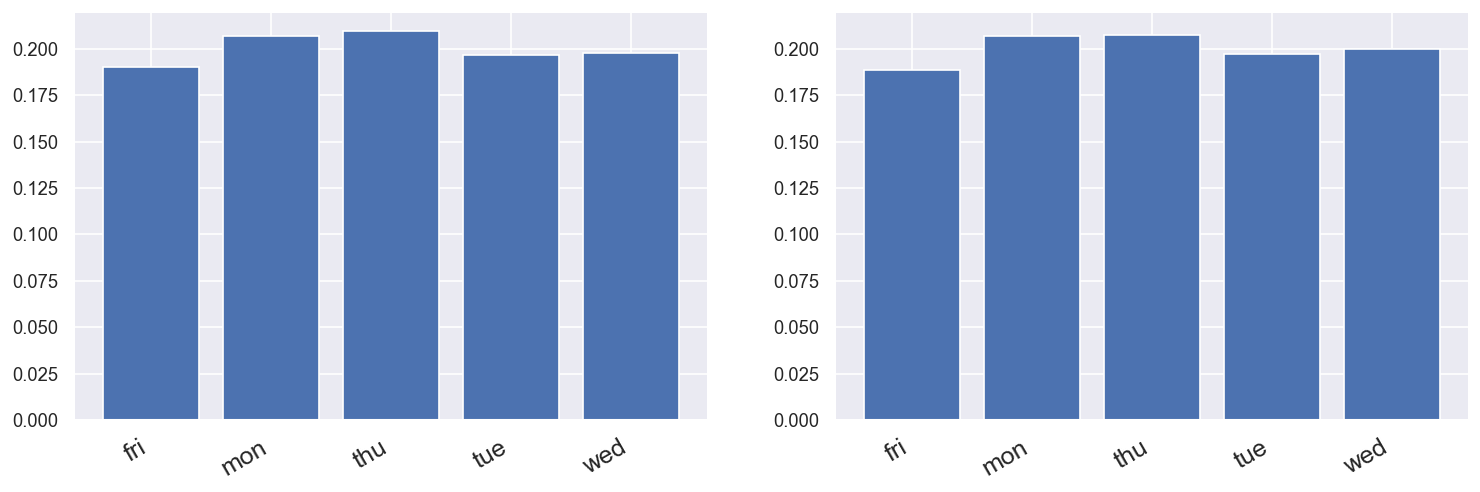

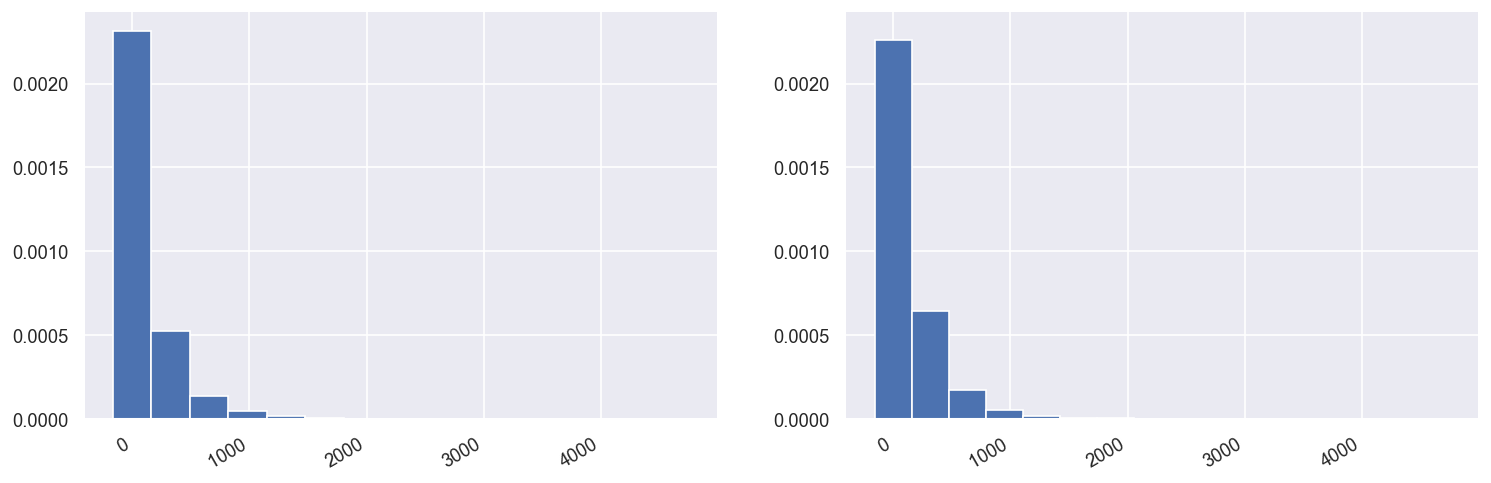

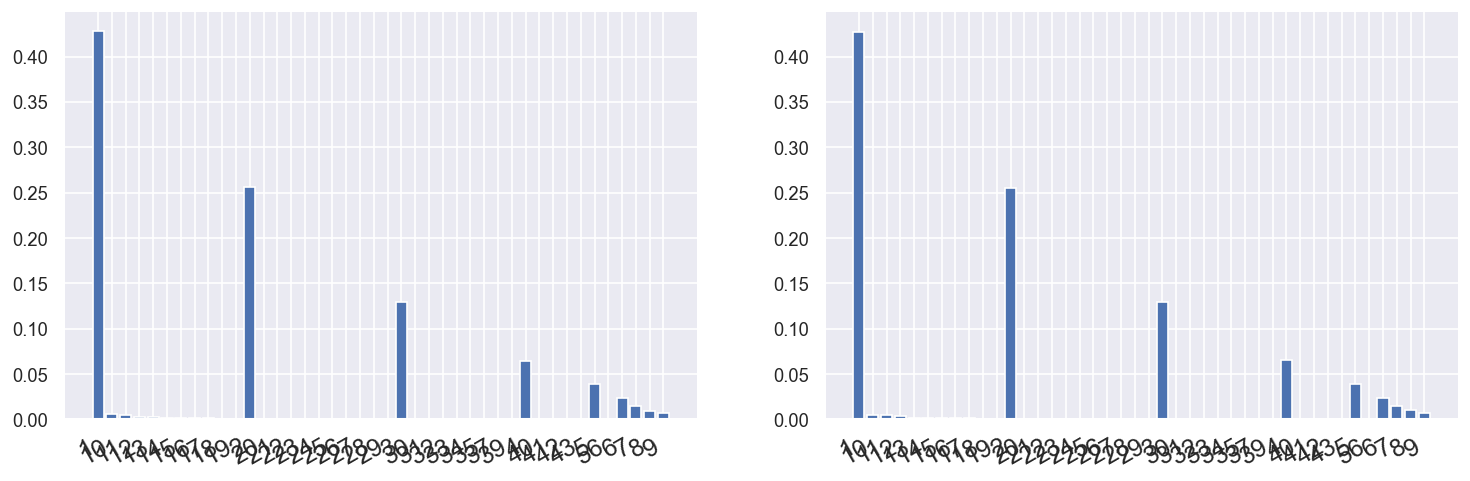

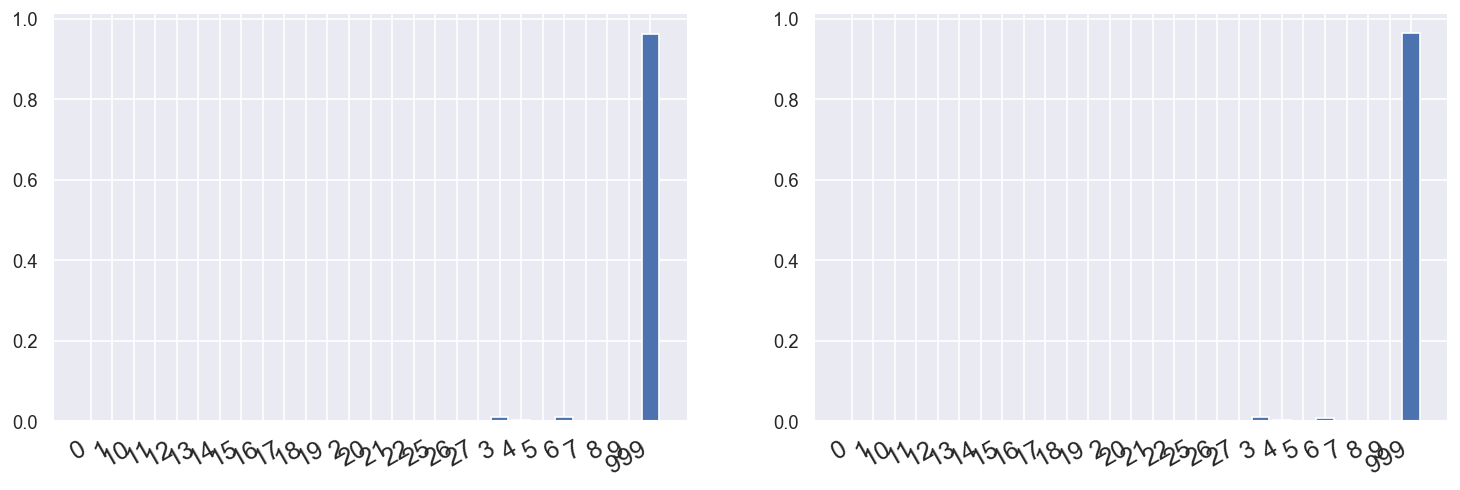

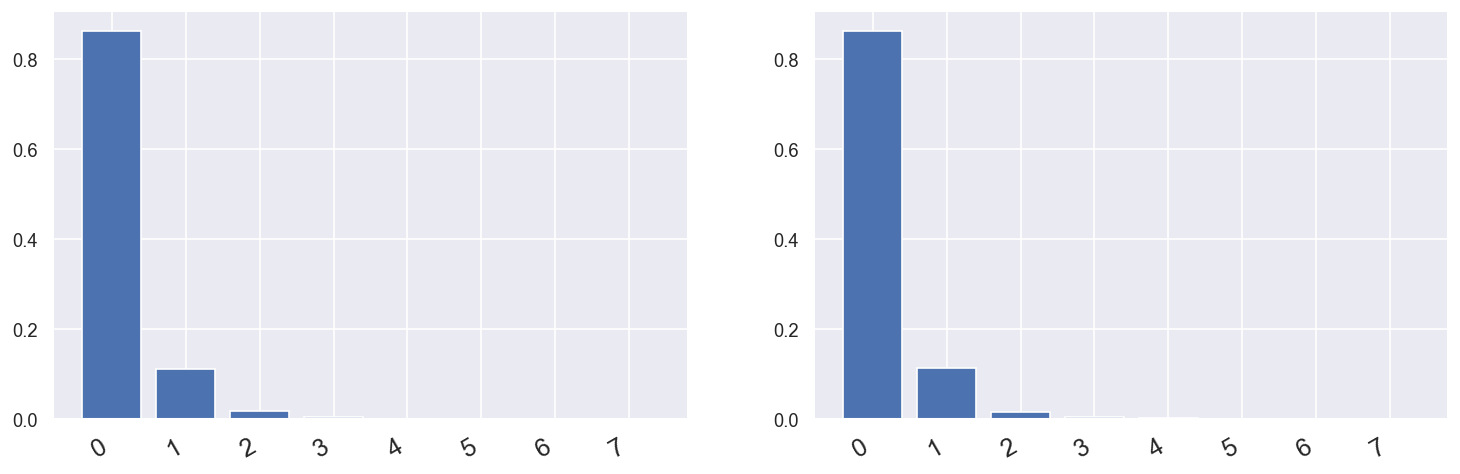

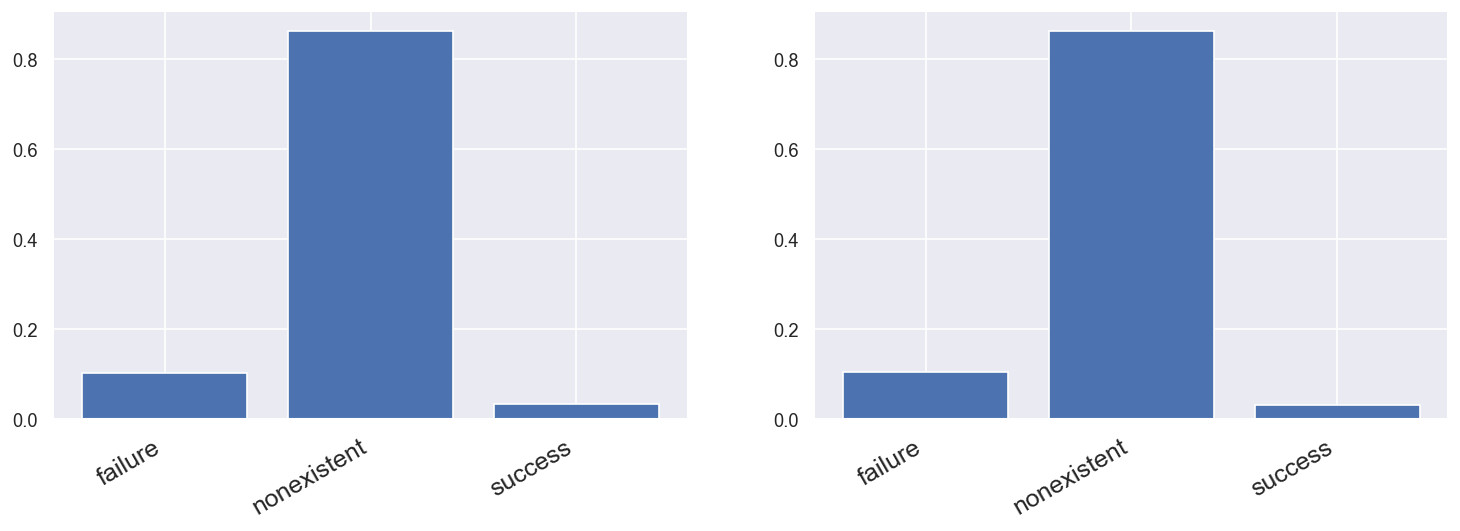

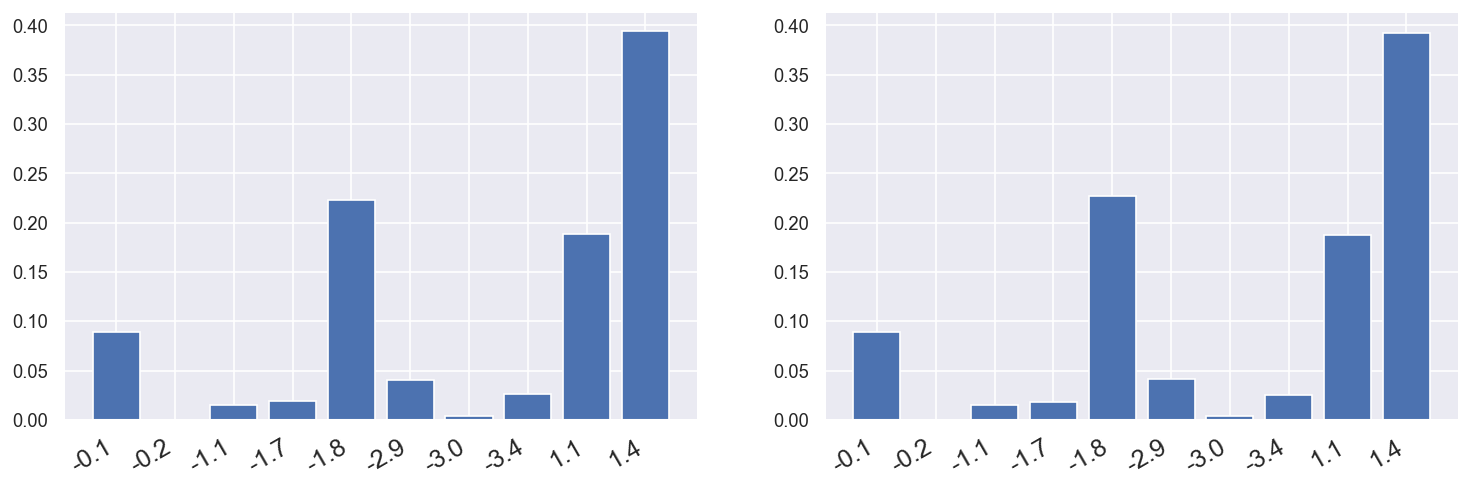

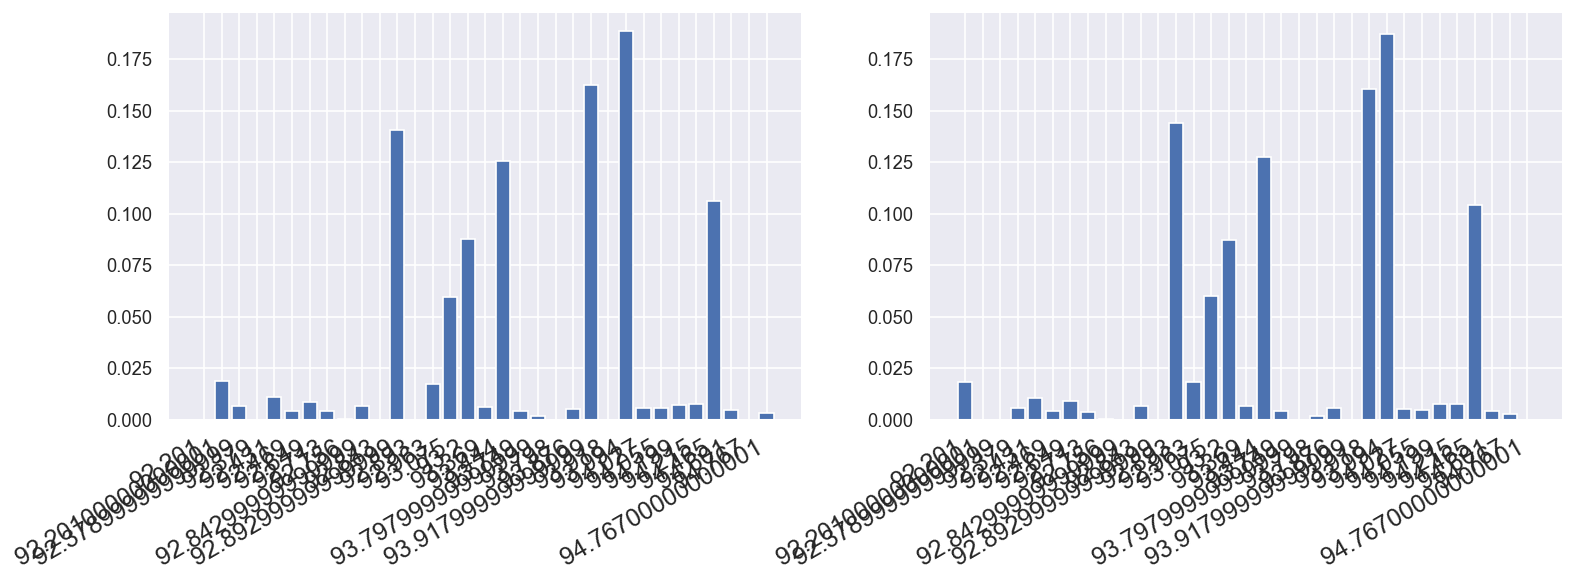

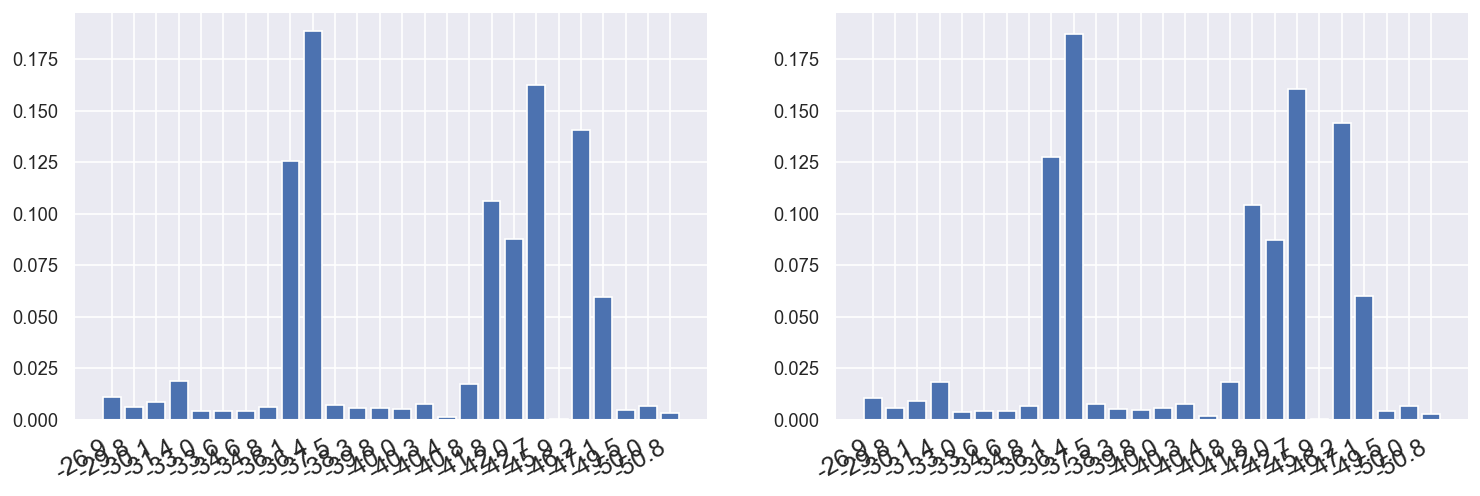

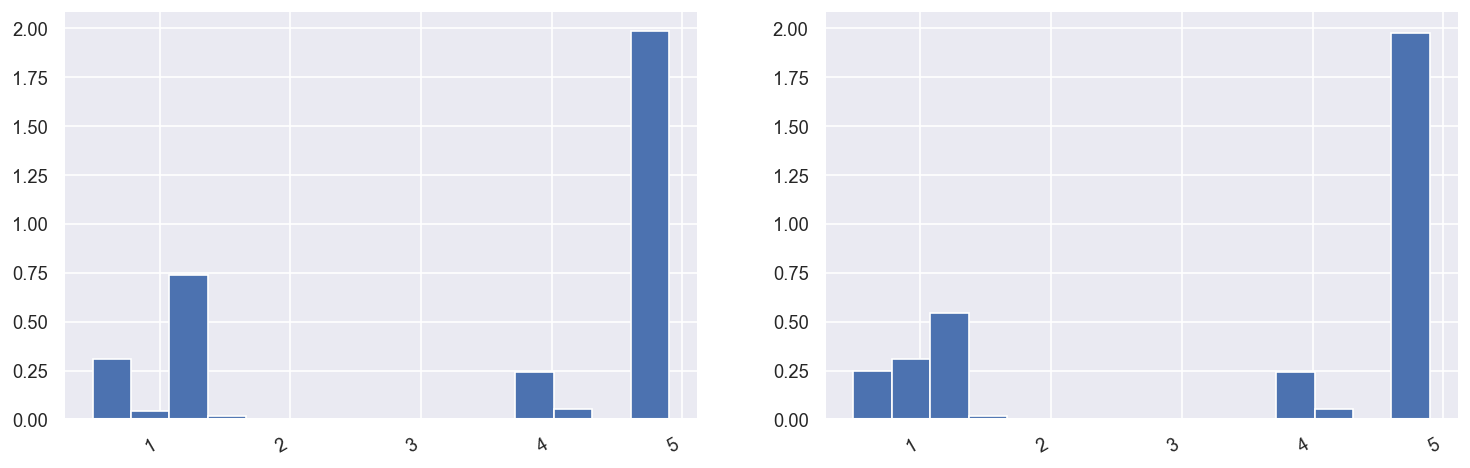

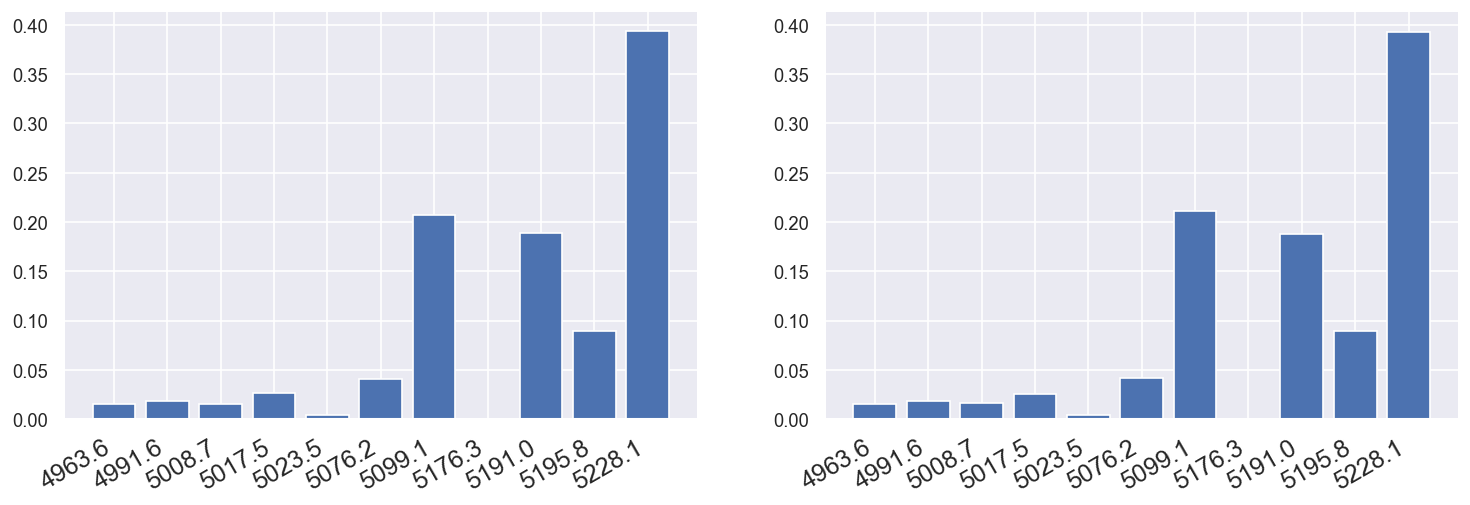

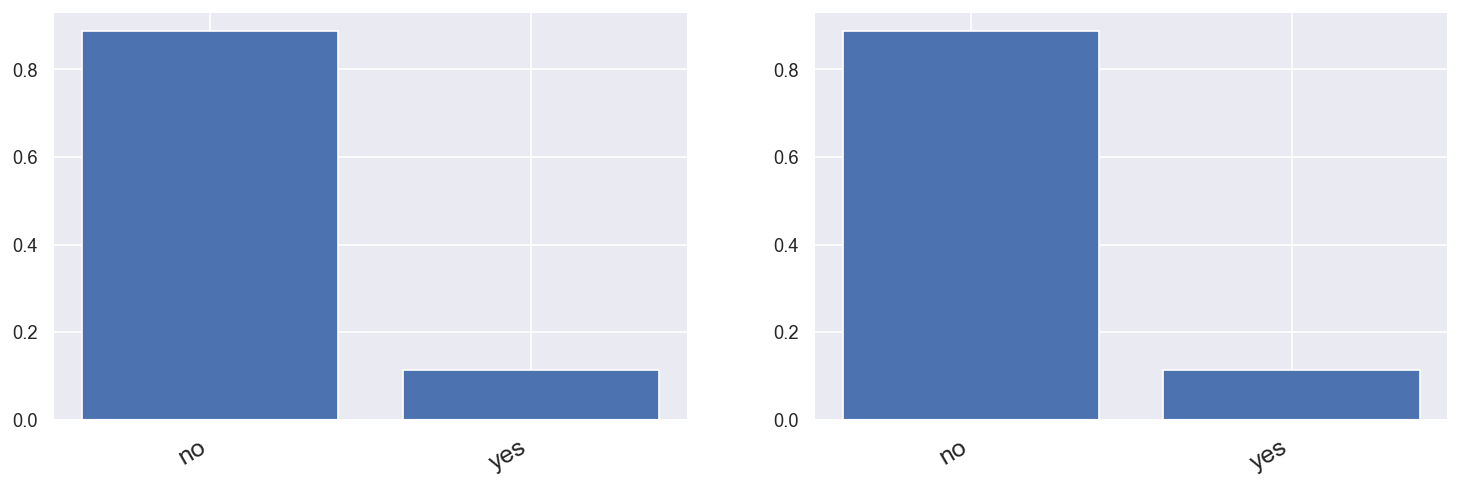

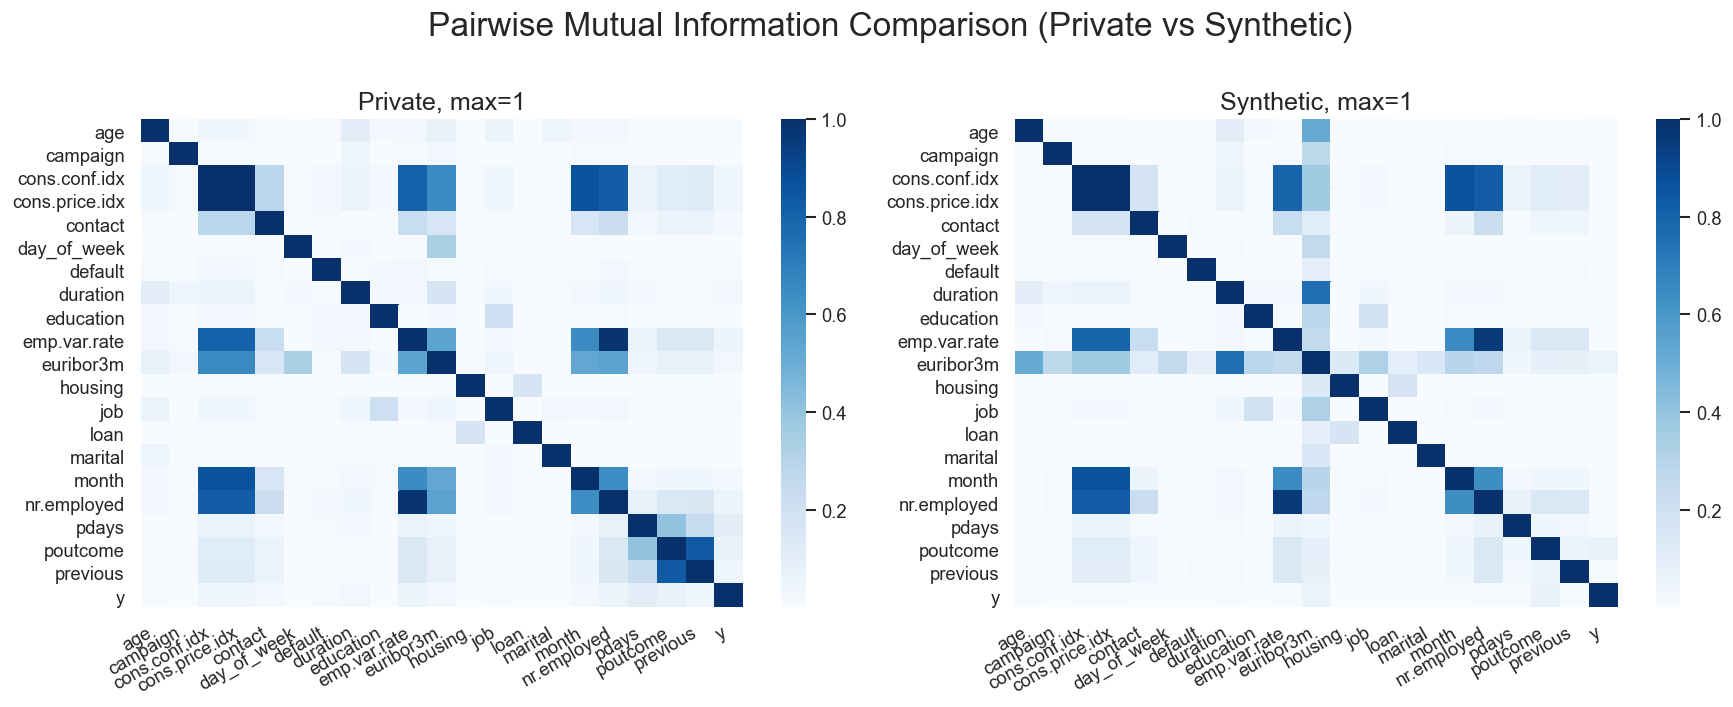

In [38]:
visualize(bank, 'bank', b_sd025, b_ds025)

In [107]:
german_orig = f'../german-data/german.data'
german = f'../german-data/german.train'


g_ds = f'../german-data/out/description-test.json'
g_sd = f'../german-data/out/sythetic_data-test.csv'


g_ds1 = f'../german-data/out/description1.json'
g_sd1 = f'../german-data/out/sythetic_data1.csv'
g_ds0 = f'../german-data/out/description0.json'
g_sd0 = f'../german-data/out/sythetic_data0.csv'
g_ds01 = f'../german-data/out/description01.json'
g_sd01 = f'../german-data/out/sythetic_data01.csv'
g_ds025 = f'../german-data/out/description025.json'
g_sd025 = f'../german-data/out/sythetic_data025.csv'

g_ds05 = f'../german-data/out/description05.json'
g_sd05 = f'../german-data/out/sythetic_data05.csv'

df = pd.read_csv(german_orig, sep=' ', names=german_cols)
msk = np.random.rand(len(df)) < 0.8

train = df[msk]
test = df[~msk]

train.to_csv('../german-data/german.train', sep=' ', header=None)
test.to_csv('../german-data/german.test', sep=' ', header=None)


  existing_checking  duration credit_history purpose  credit_amount savings  \
0               A11         6            A34     A43           1169     A65   
2               A14        12            A34     A46           2096     A61   
3               A11        42            A32     A42           7882     A61   
4               A11        24            A33     A40           4870     A61   
5               A14        36            A32     A46           9055     A65   

  employment_since  installment_rate status_sex other_debtors  ...  property  \
0              A75                 4        A93          A101  ...      A121   
2              A74                 2        A93          A101  ...      A121   
3              A74                 2        A93          A103  ...      A122   
4              A73                 3        A93          A101  ...      A124   
5              A73                 2        A93          A101  ...      A124   

  age  other_installment_plans housing exist

/Users/eunbeejang/miniconda3/envs/py38/lib/python3.8/site-packages/DataSynthesizer/ModelInspector.py:75: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(15, 5), dpi=120)


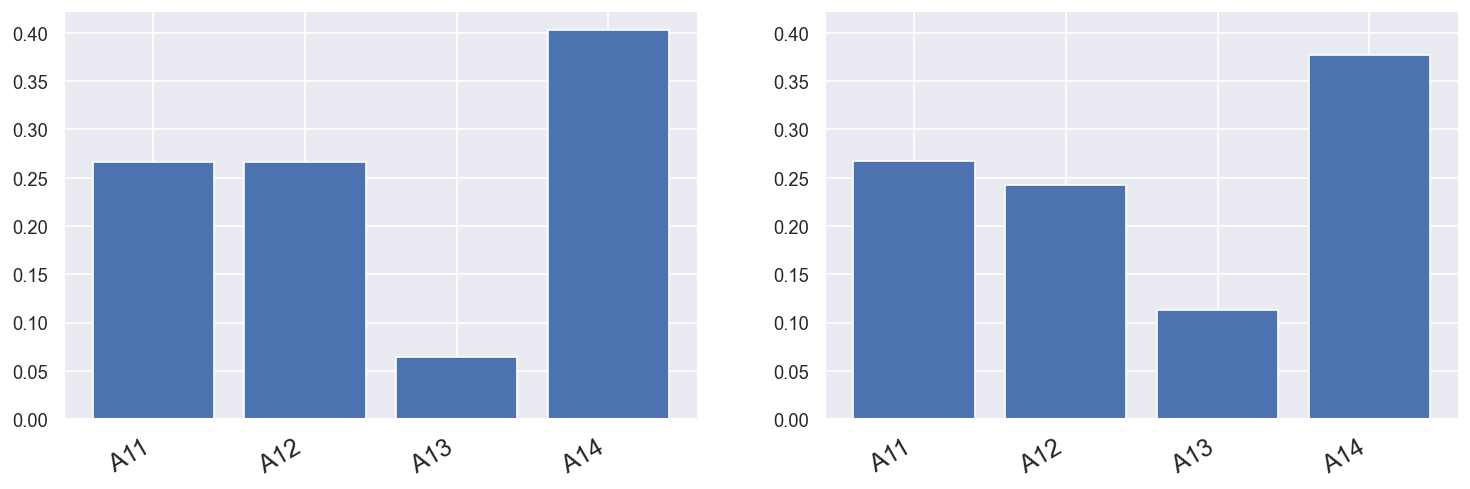

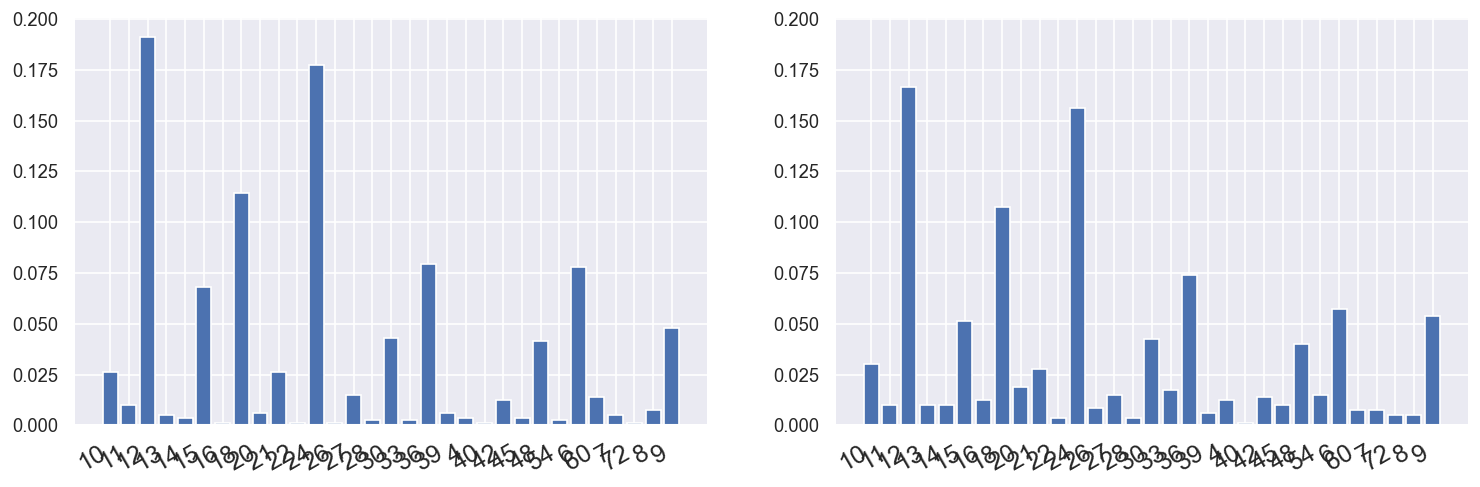

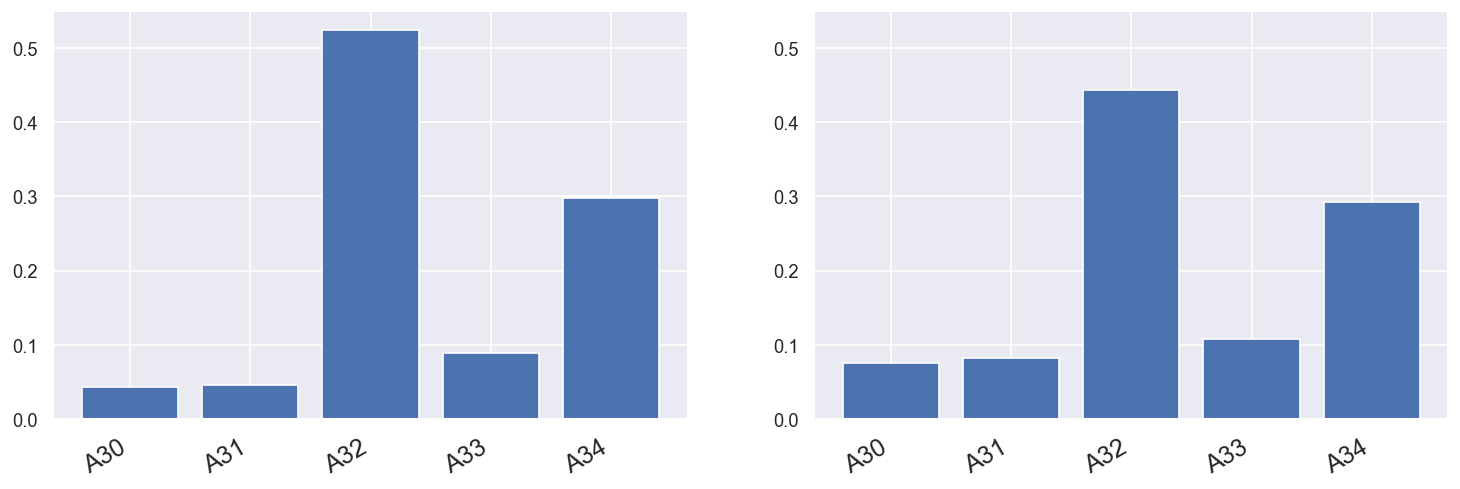

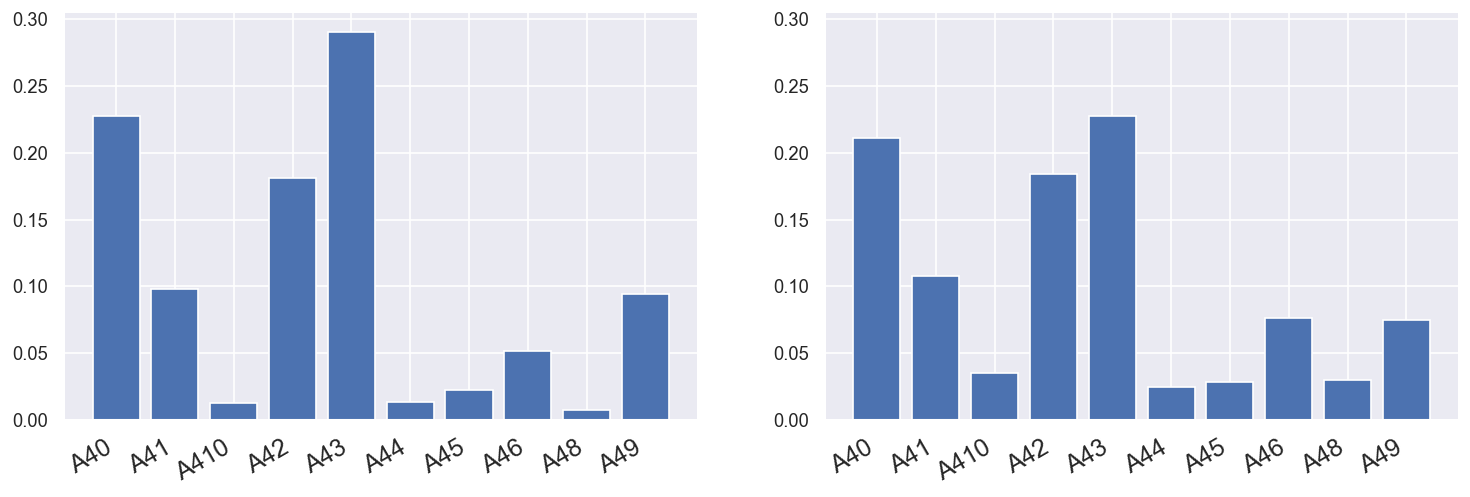

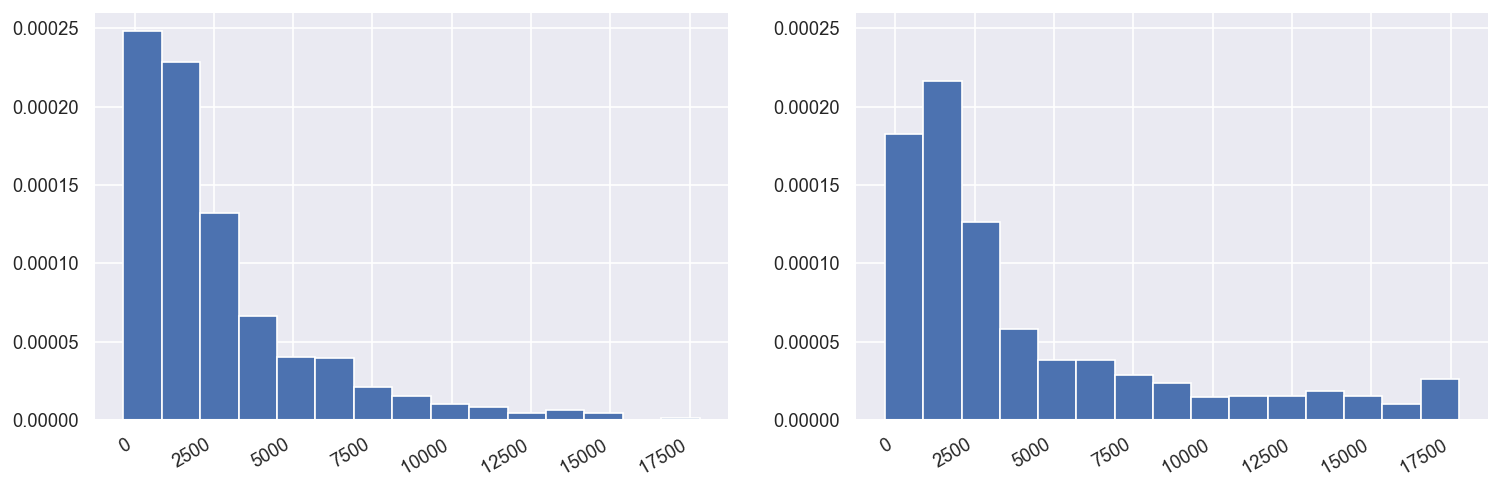

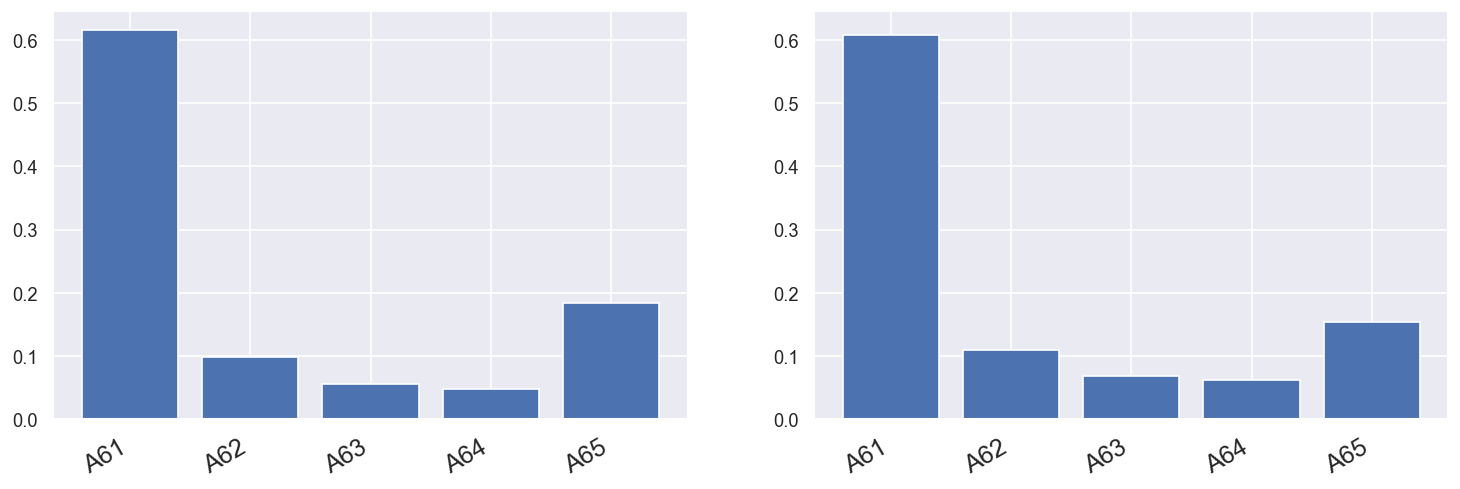

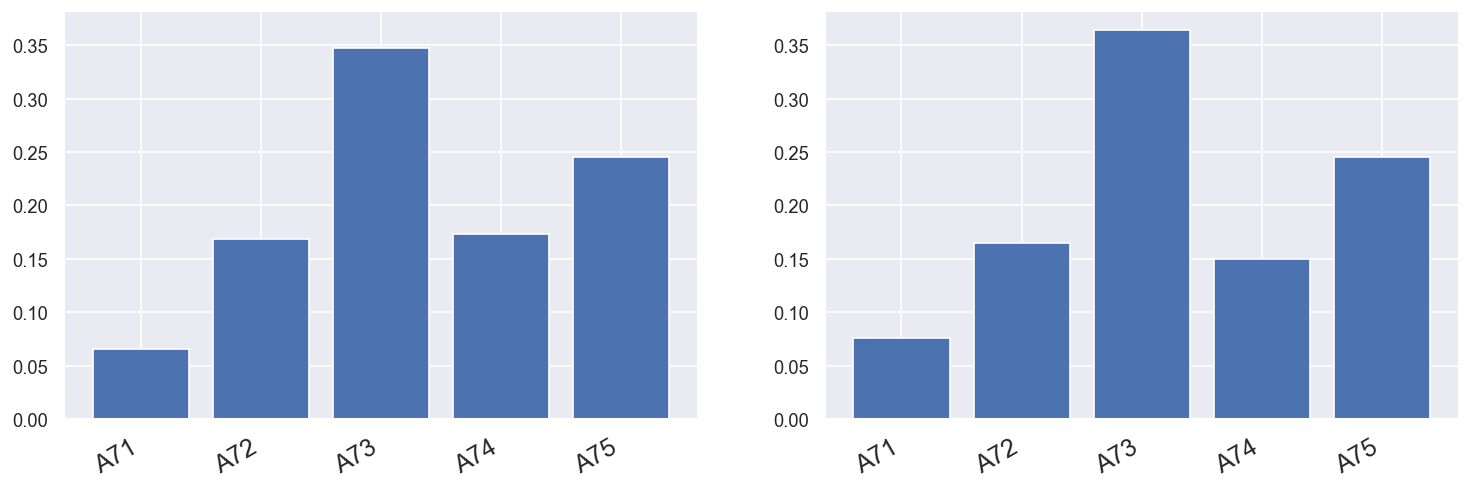

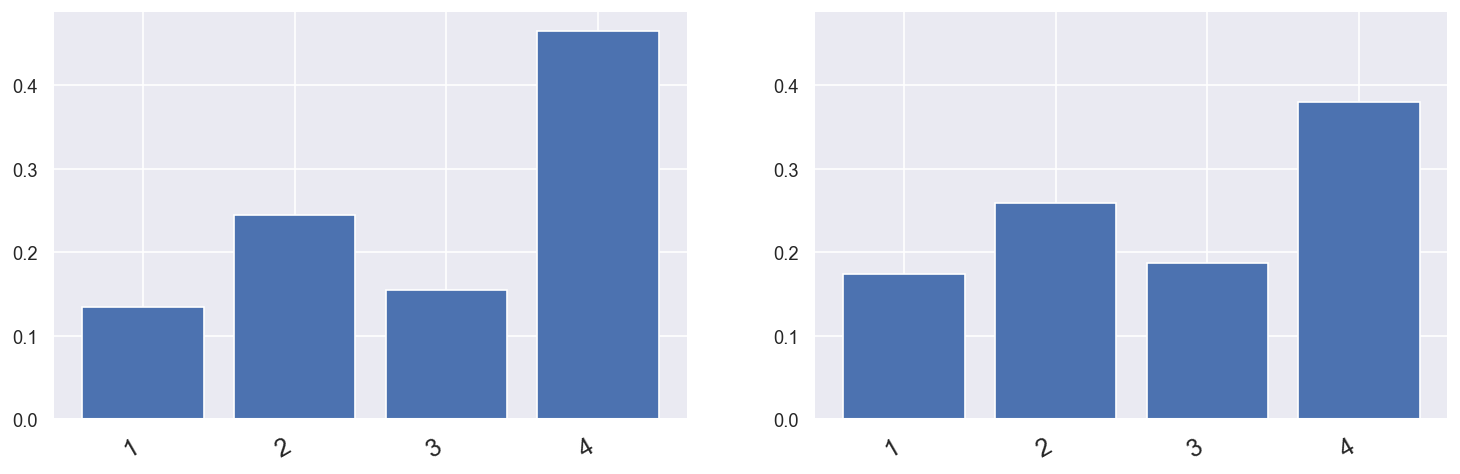

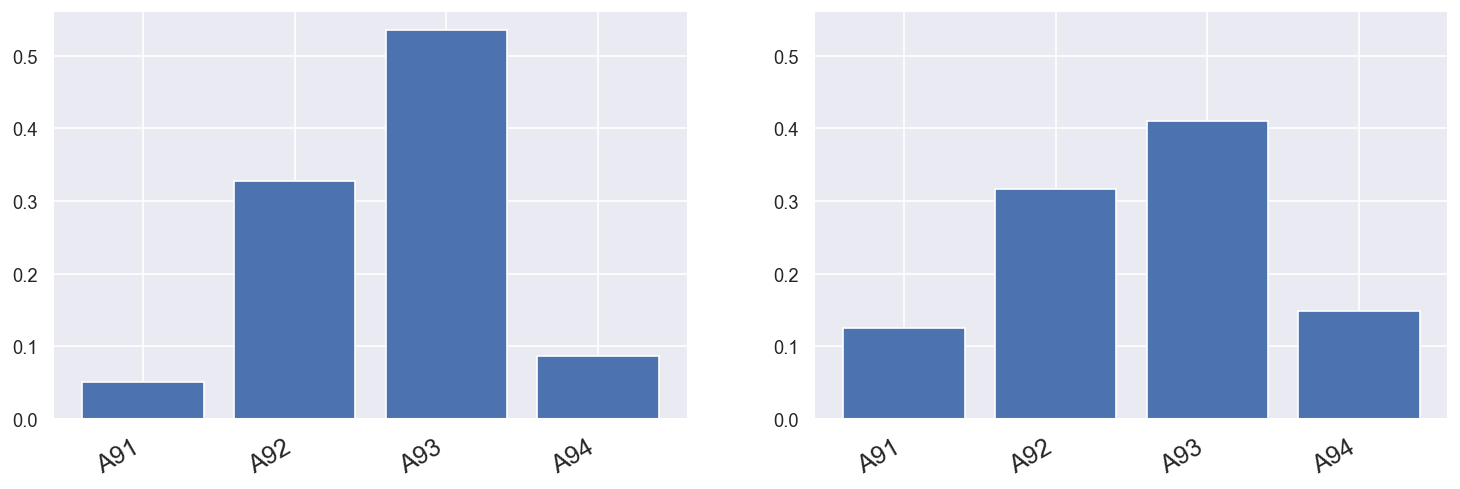

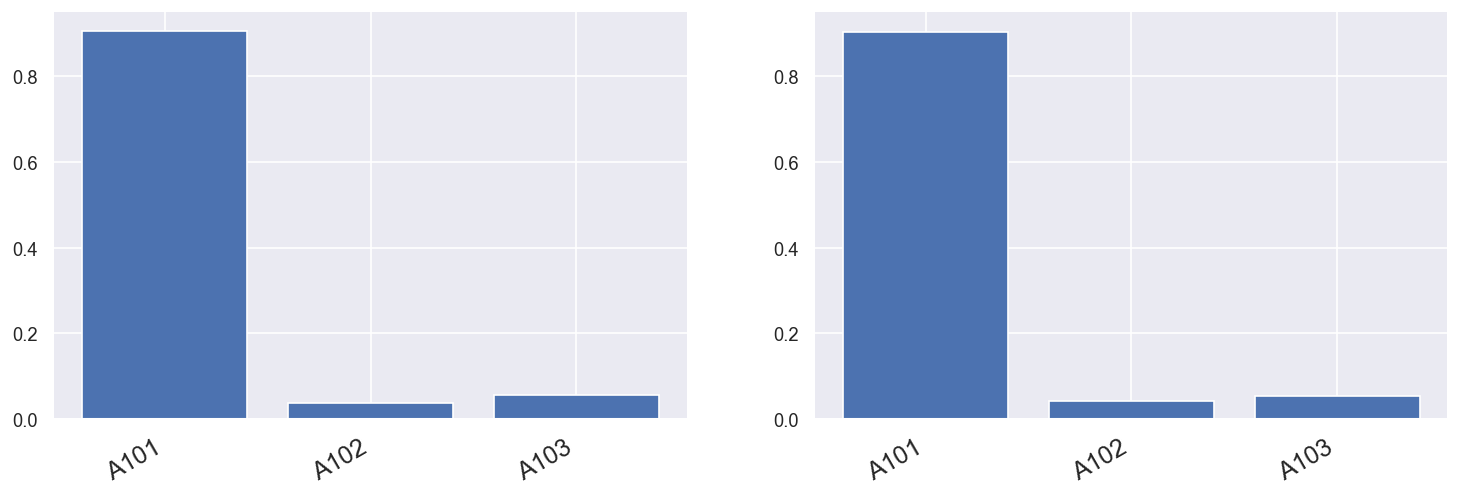

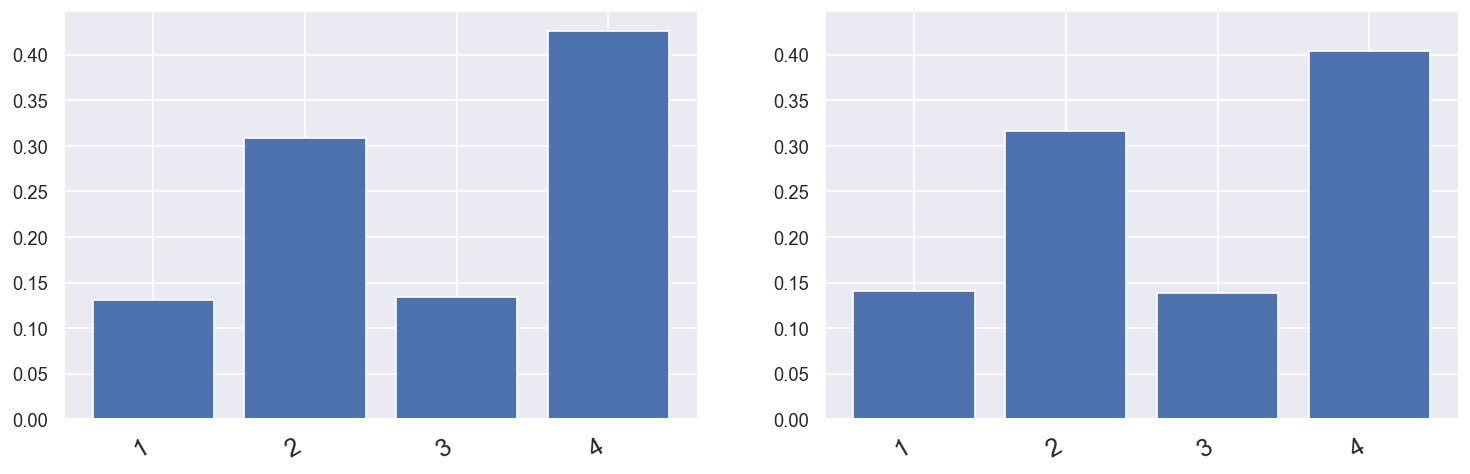

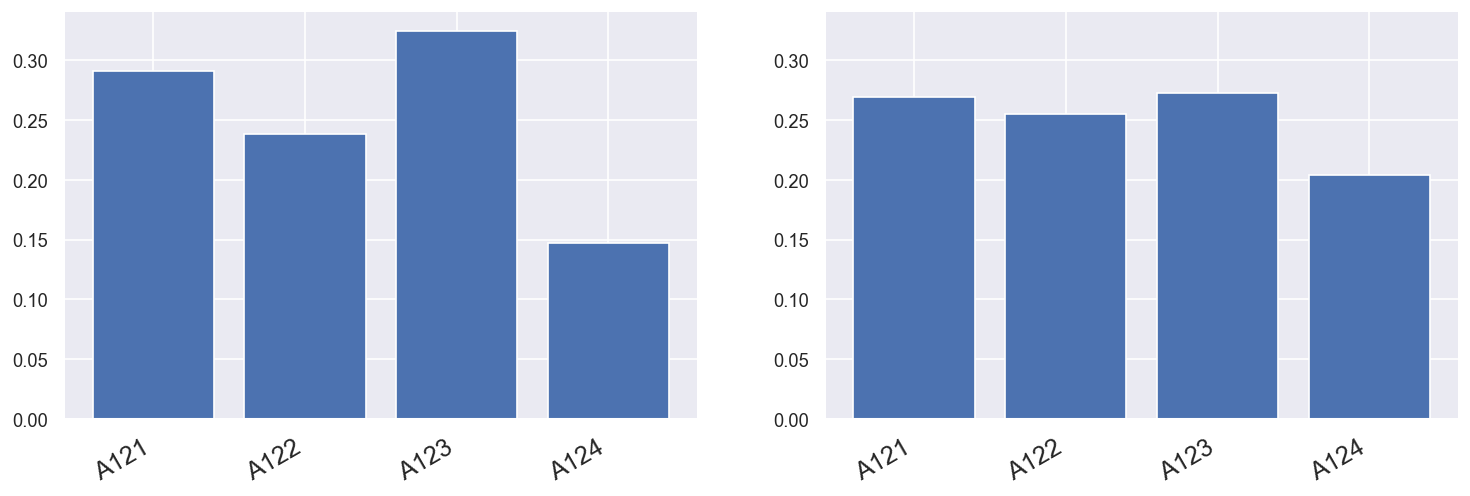

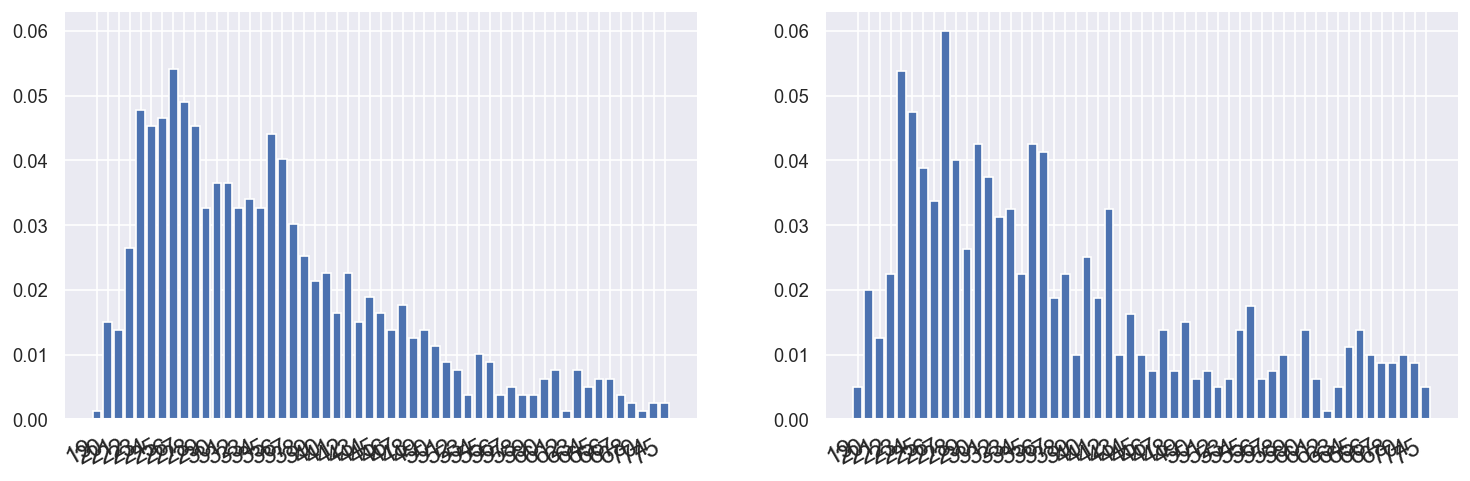

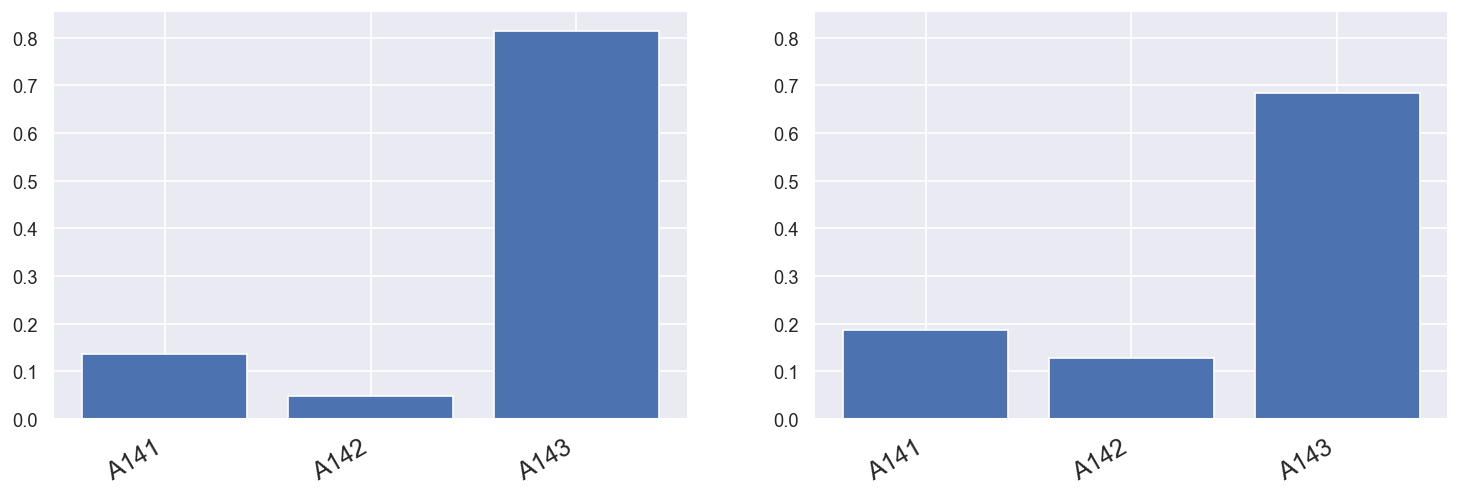

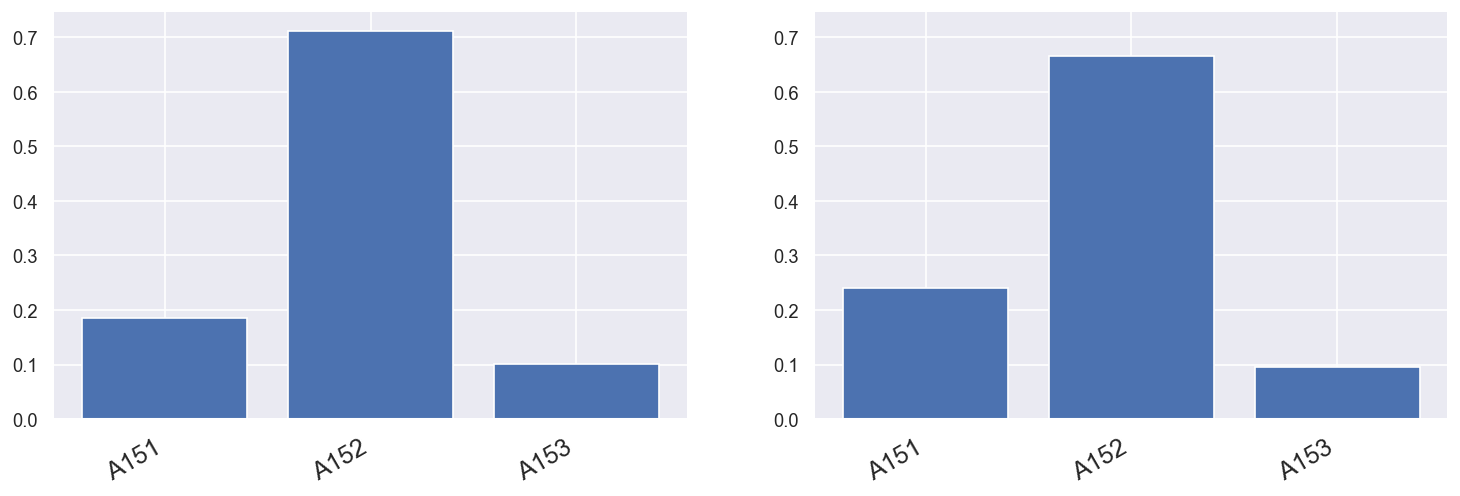

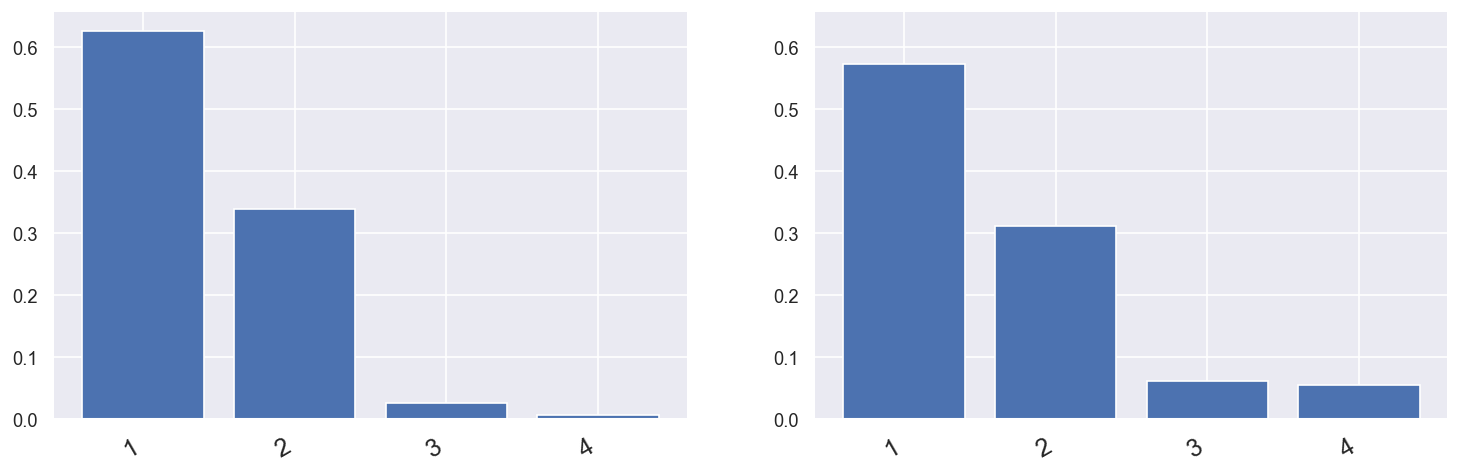

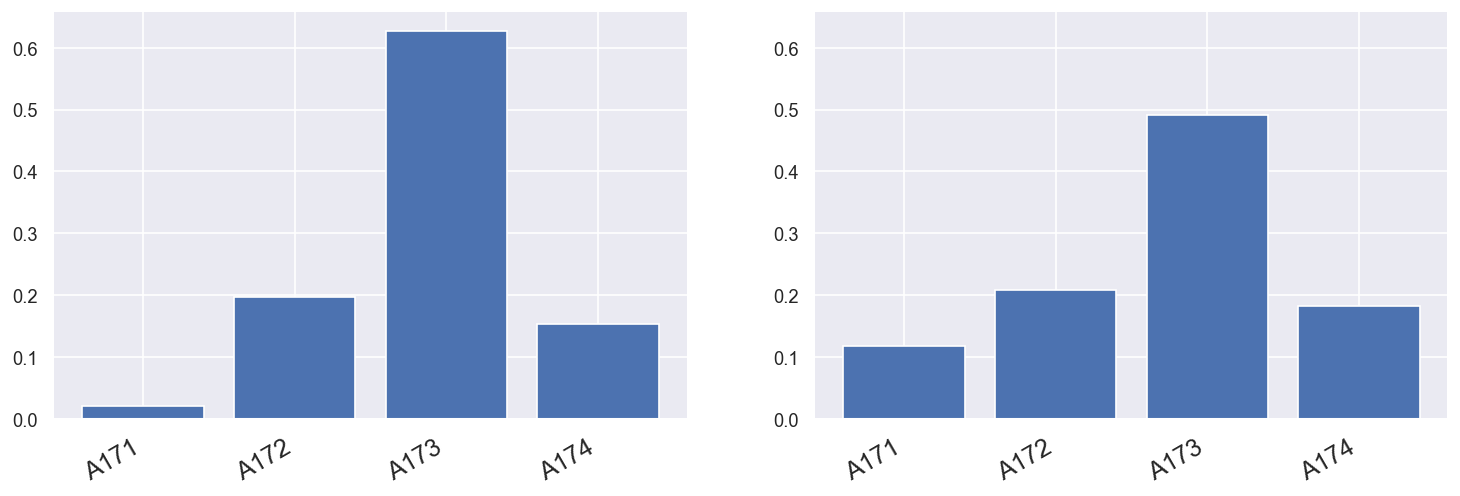

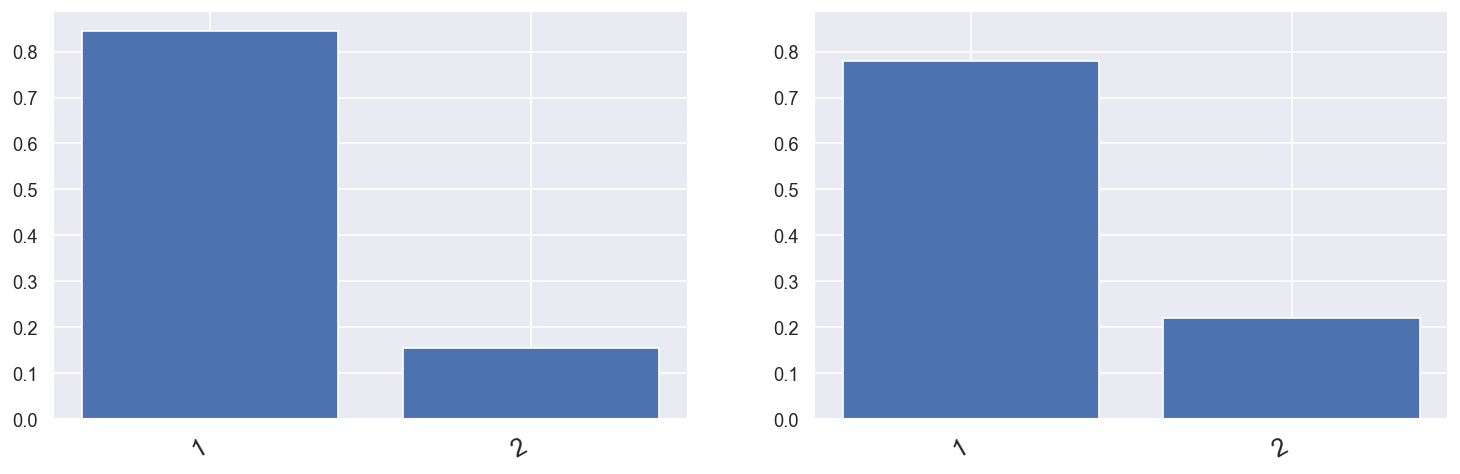

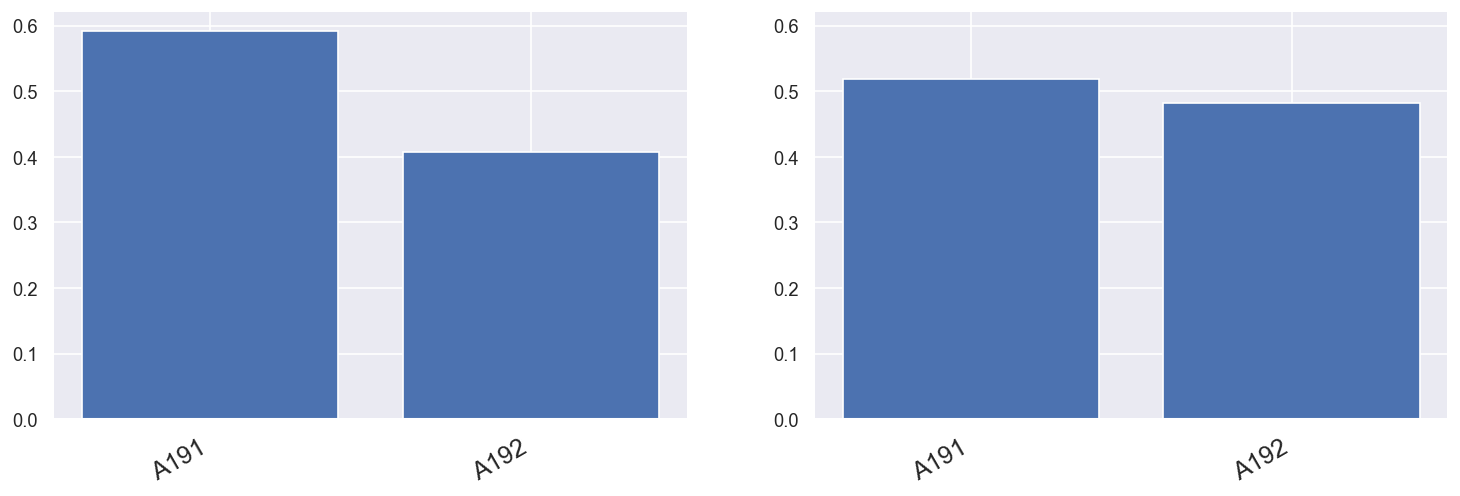

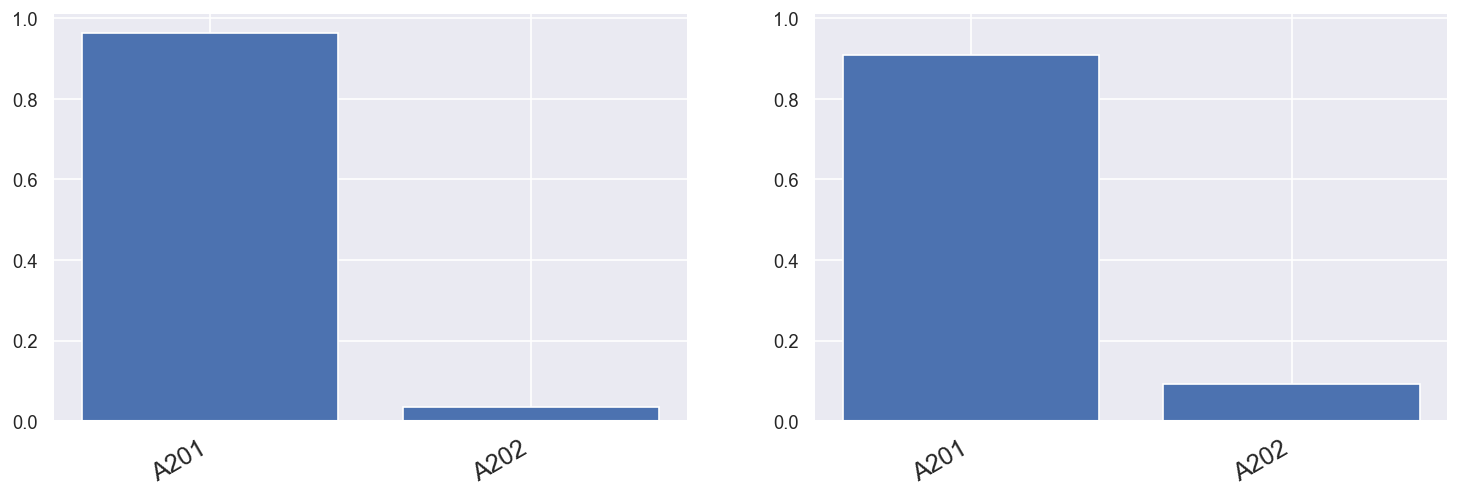

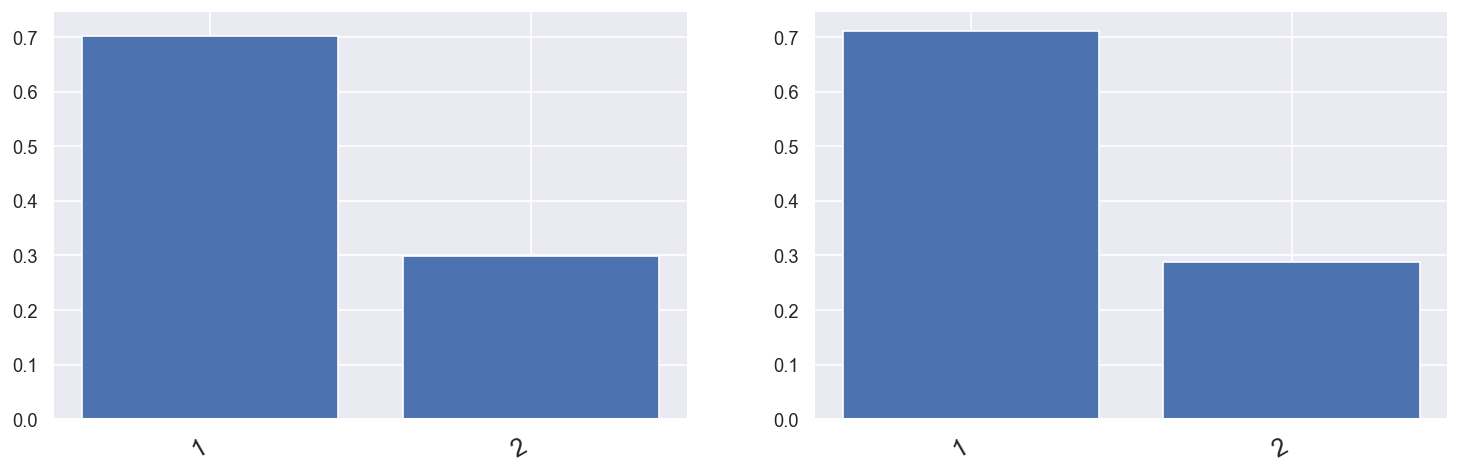

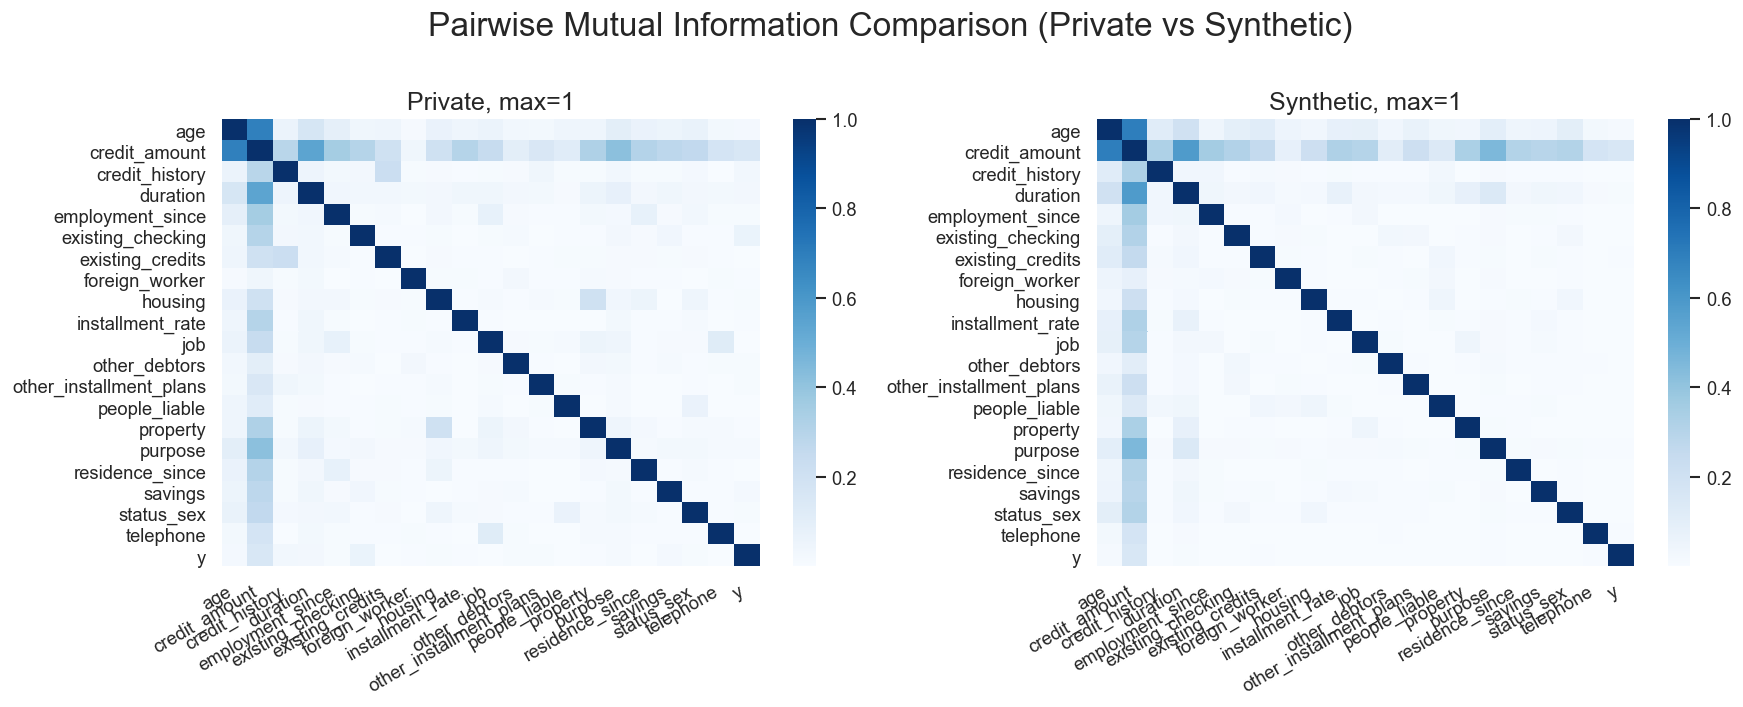

In [110]:
describe(german, 'german', 0.1, g_ds01, k=2)
generate('german', 800, g_ds01, g_sd01)
visualize(german, 'german', g_sd01, g_ds01)

In [115]:
input_df = pd.read_csv('./adult.test', skipinitialspace=True, sep=',')
synthetic_df = pd.read_csv('../bank-data/bank-additional.csv', sep=';')

In [118]:
len(synthetic_df)

4118